# Name: Rida Ahmed
**"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

# Business and Data Understanding:

# What makes the highest grossing movies?

**What genres have done best in Hollywood in the past decade or so?**

**What kind of a storyline gathers the greatest audience?**

## Data Identification and Collection

**Data will be collected using web-crawling, twitter and facebook APIs.**

**1. Data will be collected from IMDB, this will give us a list of the higehst grossing films that have been produced in the past decade. This list can then be sorted according to the desired category such as ratings, revenuew, etc.**

**2. The top movies from the lists created above will be noted and data will be collected from their facebook pages. More precisely, we will focus on the comments of the users of these pages to find out exactly what the selling points were.**

**3. Next, we will collect and analyze data from Twitter using the appropriate keywords that will retrieve tweets that talk about universally liked movies.**

**4. Finally, using Netvizz, the facebook pages can be crawled to develop a network. This network can then be analyzed using different parameters to identify the labels that occur the most frequently are therefore are meaningful.**


**IMDB: Top-US-Grossing Feature Films Released 2010-01-01 to 2017-12-31 ordered by their rank in the U.S BoxOffice**

In [1]:
# importing required packages

import requests
from lxml import html
import csv
import pandas as pd
import re
import operator
import csv
import pandas as pd

# import packages for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
#packages for Topic modelling
from gensim.corpora import Dictionary
from gensim.models import ldamodel

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

import matplotlib.pyplot as plt
%matplotlib inline

import numpy

C:\Users\Rida\Anaconda2\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#Web crawling
r = requests.get('https://www.imdb.com/search/title?at=0&start=1&title_type=feature&year=2010,2017&sort=boxoffice_gross_us,desc')
data = html.fromstring(r.text)

In [3]:
title = data.xpath("//h3/a/text()")  
url = data.xpath("//h3[@class='lister-item-header']/a/@href")        
year = data.xpath("//h3/span[2]/text()")  
pg = data.xpath("//p[1]/span[1]/text()")
duration = data.xpath("//p[1]/span[3]/text()")
genre = data.xpath("//p[1]/span[5]/text()")
votes = data.xpath("//p[4]/span[2]/text()")
gross = data.xpath("//p[4]/span[5]/text()")
rating = data.xpath("//div[@class='ratings-bar']/div[1]/strong/text()")
metascore = data.xpath("//div[@class='ratings-bar']/div[3]/span/text()")


genre = ' '.join(' '.join(genre).split())
duration = ' '.join(' '.join(duration).split())
pg = ' '.join(' '.join(pg).split())
votes = ' '.join(' '.join(votes).split())
gross = ' '.join(' '.join(gross).split())
metascore = ' '.join(' '.join(metascore).split())




In [4]:
finaldata = []

a = "https://www.imdb.com/search/title?at=0&start=1&title_type=feature&year=2010,2017&sort=boxoffice_gross_us,desc&page="
b = "&ref_=adv_prv"
count = 1

for i in range(1,10):
    url = '%s%s%s' %(a,count,b)
    count = count + 1 
    data = html.fromstring(requests.get(url).text)
    
    # Xpath
    title = data.xpath("//h3/a/text()")  
    url = data.xpath("//h3[@class='lister-item-header']/a/@href")        
    year = data.xpath("//h3/span[2]/text()")  
    pg = data.xpath("//p[1]/span[1]/text()")
    duration = data.xpath("//p[1]/span[3]/text()")
    genre = data.xpath("//p[1]/span[5]/text()")
    votes = data.xpath("//p[4]/span[2]/text()")
    gross = data.xpath("//p[4]/span[5]/text()")
    rating = data.xpath("//div[@class='ratings-bar']/div[1]/strong/text()")
    metascore = data.xpath("//div[@class='ratings-bar']/div[3]/span/text()")
    
    filter(operator.isNumberType, gross)
    crawleddata = zip(title, year, pg, duration, genre, votes, gross, rating, metascore)
    
    for row in crawleddata:
        finaldata.append(row)    

In [5]:
finaldata = pd.DataFrame(finaldata)       
finaldata.to_csv("imdb_crawled_final_Project.csv", encoding="utf-8")

In [6]:
# changing the data more like Excel format
imdb = pd.DataFrame(finaldata)
imdb.columns = ['Title', 'Year', 'PG rating', 'Duration', 'Genre', 'Votes', 'Gross US Income', 'Rating', 'Metascore']
imdb

Title        Year PG rating  \
0                    Star Wars: The Force Awakens      (2015)     PG-13   
1                                  Jurassic World      (2015)     PG-13   
2                                    The Avengers      (2012)     PG-13   
3         Star Wars: Episode VIII - The Last Jedi      (2017)     PG-13   
4                                       Rogue One      (2016)     PG-13   
5                            Beauty and the Beast      (2017)        PG   
6                                    Finding Dory      (2016)        PG   
7                         Avengers: Age of Ultron      (2015)     PG-13   
8                           The Dark Knight Rises      (2012)     PG-13   
9                 The Hunger Games: Catching Fire      (2013)     PG-13   
10                                    Toy Story 3      (2010)         G   
11                                   Wonder Woman      (2017)     PG-13   
12                                 Iron Man Three      (2013)     PG-13   
13                     Captain America: Civil War      (2016)     PG-13   
14                               The Hunger Games      (2012)     PG-13   
15                 Jumanji: Welcome to the Jungle      (2017)     PG-13   
16                                         Frozen  (I) (2013)        PG   
17                 Guardians of the Galaxy Vol. 2      (2017)     PG-13   
18   Harry Potter and the Deathly Hallows: Part 2      (2011)     PG-13   
19                        The Secret Life of Pets      (2016)        PG   
20                                Despicable Me 2      (2013)        PG   
21                                The Jungle Book      (2016)        PG   
22                                       Deadpool      (2016)         R   
23                                     Inside Out  (I) (2015)        PG   
24                                      Furious 7      (2015)     PG-13   
25                 Transformers: Dark of the Moon      (2011)     PG-13   
26                                American Sniper      (2014)         R   
27                                       Zootopia      (2016)        PG   
28          The Hunger Games: Mockingjay - Part 1      (2014)     PG-13   
29                                        Minions      (2015)        PG   
..                                            ...         ...       ...   
420                      Resident Evil: Afterlife      (2010)         R   
421                    Why Did I Get Married Too?      (2010)     PG-13   
422                                   Tooth Fairy  (I) (2010)        PG   
423                                   Secretariat      (2010)        PG   
424                                    Son of God      (2014)     PG-13   
425                                  The Dictator      (2012)         R   
426                    My Big Fat Greek Wedding 2      (2016)     PG-13   
427                        The Lego Ninjago Movie      (2017)        PG   
428                         Planes: Fire & Rescue      (2014)        PG   
429                      The Grand Budapest Hotel      (2014)         R   
430                                      Vacation  (I) (2015)         R   
431                                  Total Recall  (I) (2012)     PG-13   
432                           Water for Elephants      (2011)     PG-13   
433                   Jack Reacher: Never Go Back      (2016)     PG-13   
434                                       RoboCop      (2014)     PG-13   
435                                        Easy A      (2010)     PG-13   
436               The Secret Life of Walter Mitty      (2013)        PG   
437                                      Baywatch      (2017)         R   
438                            The Lincoln Lawyer      (2011)         R   
439                                        Takers      (2010)     PG-13   
440                                        Fences      (2016)     PG-13   
441                                     The Shack  (I) (2017)     PG-

**Sorting the dataframe above according to the gross US income yields the following list of movies with the highest: incomes**

**1. Star Wars: The Force Awakens($936.66M) which was an action, adventure fantasy movie| Rated: PG-13 | Duration: 136 minutes**

**2. Jurassic World($652.27M) which was a sci-fi action film| Rated: PG-13 | Duration: 124 minutes**

**3. The Avengers($623.36M), again sci-fi, adventure and action filled plot| Rated: PG-13 | Duration: 143 minutes**

**4. Star Wars: Episode VIII - The Last Jedi($620.18M) that is an action, adventure fantasy| Rated: PG-13 | Duration: 152 minutes**

**5. Rogue One($532.18M) which is an animated film based on a sci-fi adventure plot| Rated: PG-13 | Duration: 133 minutes**

In [7]:
imdb.sort_values(by='Rating', ascending=False)

Title        Year PG rating  \
42                                      Inception      (2010)     PG-13   
96                                   Interstellar      (2014)     PG-13   
80                                           Coco  (I) (2017)        PG   
127                              Django Unchained      (2012)         R   
8                           The Dark Knight Rises      (2012)     PG-13   
10                                    Toy Story 3      (2010)         G   
23                                     Inside Out  (I) (2015)        PG   
373                                 Hacksaw Ridge      (2016)         R   
199                       The Wolf of Wall Street      (2013)         R   
446                              12 Years a Slave      (2013)         R   
138                            Mad Max: Fury Road      (2015)         R   
140                                    La La Land  (I) (2016)     PG-13   
32                        Guardians of the Galaxy      (2014)     PG-13   
267                             Blade Runner 2049      (2017)         R   
18   Harry Potter and the Deathly Hallows: Part 2      (2011)     PG-13   
429                      The Grand Budapest Hotel      (2014)         R   
76                       How to Train Your Dragon      (2010)        PG   
117                                      The Help      (2011)     PG-13   
414                                     Prisoners      (2013)         R   
122                                     Gone Girl      (2014)         R   
177                                Shutter Island      (2010)         R   
2                                    The Avengers      (2012)     PG-13   
72                                          Logan      (2017)         R   
168                                        Wonder  (I) (2017)        PG   
271                            The Imitation Game      (2014)     PG-13   
67                     X-Men: Days of Future Past      (2014)     PG-13   
71                                    The Martian      (2015)     PG-13   
0                    Star Wars: The Force Awakens      (2015)     PG-13   
27                                       Zootopia      (2016)        PG   
158                             The King's Speech      (2010)         R   
..                                            ...         ...       ...   
165                                   Grown Ups 2      (2013)     PG-13   
361                                  The Smurfs 2      (2013)        PG   
300                                     Annabelle  (I) (2014)         R   
404                                      The Boss      (2016)         R   
290                                         Annie      (2014)        PG   
371                        A Good Day to Die Hard      (2013)         R   
175                                  Ghostbusters      (2016)     PG-13   
229                  Independence Day: Resurgence      (2016)     PG-13   
317                                     Zookeeper      (2011)        PG   
403                     A Nightmare on Elm Street      (2010)         R   
174                 Transformers: The Last Knight      (2017)     PG-13   
291        Alvin and the Chipmunks: The Road Chip      (2015)        PG   
40                     The Twilight Saga: Eclipse      (2010)     PG-13   
422                                   Tooth Fairy  (I) (2010)        PG   
381                    Madea's Witness Protection      (2012)     PG-13   
46      The Twilight Saga: Breaking Dawn - Part 1      (2011)     PG-13   
297                                         Tammy      (2014)         R   
417                                   After Earth      (2013)     PG-13   
416                                God's Not Dead      (2014)        PG   
204                           Fifty Shades Darker      (2017)         R   
245                                     Yogi Bear      (2010)        PG   
347                        Boo! A Madea Halloween      (2016)     PG-

**As can be seen here, when the data was sorted by ratings, it showed that**

**1.Inception(8.8) | Rated: PG-13 | Duration: 148 minutes**

**2.Interstellar(8.6) | Rated: PG-13 | Duration: 169 minutes**

**3.Coco(8.5)| Rated: PG | Duration: 105 minutes**

**4.Django Unchained(8.4)| Rated: R | Duration: 165 minutes sharing the rank with 5.The Dark Knight Rises(8.5) | Rated: PG-13 | Duration: 164 minutes**

**were the top 5 movies. The top 2 movies were adventure and sci-fi, the third movie is animated adventure while the last 2 movies shared an action, adventure and sci-fi storyline. The mean duration of the top 5 films was recorded to be 137.8 minutes which is a little over 2 hours and only one of them was rated R.**


In [8]:
imdb.sort_values('Metascore', inplace=True, ascending = False)
imdb

Title        Year PG rating  \
446                              12 Years a Slave      (2013)         R   
47                                        Gravity      (2013)     PG-13   
256                              Zero Dark Thirty      (2012)         R   
255                            The Social Network      (2010)     PG-13   
95                                        Dunkirk      (2017)     PG-13   
23                                     Inside Out  (I) (2015)        PG   
140                                    La La Land  (I) (2016)     PG-13   
10                                    Toy Story 3      (2010)         G   
145                               American Hustle      (2013)         R   
138                            Mad Max: Fury Road      (2015)         R   
158                             The King's Speech      (2010)         R   
429                      The Grand Budapest Hotel      (2014)         R   
18   Harry Potter and the Deathly Hallows: Part 2      (2011)     PG-13   
340                                     Moneyball      (2011)     PG-13   
399                            The Shape of Water      (2017)         R   
101                                       Lincoln      (2012)     PG-13   
162                                          Argo      (2012)         R   
216                                   Baby Driver      (2017)         R   
3         Star Wars: Episode VIII - The Last Jedi      (2017)     PG-13   
110                                       Get Out  (I) (2017)         R   
377                                        Looper      (2012)         R   
309                               The Descendants      (2011)         R   
219                              Captain Phillips      (2013)     PG-13   
54                                 The Lego Movie      (2014)        PG   
346                                          Hugo      (2011)        PG   
312                                      The Post      (2017)     PG-13   
214                                         Creed      (2015)     PG-13   
151                War for the Planet of the Apes      (2017)     PG-13   
58                                          Moana  (I) (2016)        PG   
0                    Star Wars: The Force Awakens      (2015)     PG-13   
..                                            ...         ...       ...   
379                                     Allegiant      (2016)     PG-13   
405                                 The Last Song      (2010)        PG   
59                Transformers: Age of Extinction      (2014)     PG-13   
441                                     The Shack  (I) (2017)     PG-13   
229                  Independence Day: Resurgence      (2016)     PG-13   
272                                  Ride Along 2      (2016)     PG-13   
93                   Teenage Mutant Ninja Turtles      (2014)     PG-13   
225                                Daddy's Home 2      (2017)     PG-13   
129                                     Grown Ups  (I) (2010)     PG-13   
347                        Boo! A Madea Halloween      (2016)     PG-13   
209                         The Hangover Part III      (2013)         R   
310                                 Let's Be Cops      (2014)         R   
156                                    The Smurfs      (2011)        PG   
317                                     Zookeeper      (2011)        PG   
407                             London Has Fallen      (2016)         R   
371                        A Good Day to Die Hard      (2013)         R   
149                                Little Fockers      (2010)     PG-13   
257                            Sex and the City 2      (2010)         R   
326                                        Pixels      (2015)     PG-13   
174                 Transformers: The Last Knight      (2017)     PG-13   
279                                       Taken 3      (2014)     PG-13   
368                                      War Room      (2015)        

**Metascore is the score of the movie on the metacritic website.It assigns scores almost in the same range as rotten tomatoes most of the time. Scores are given by movie critics and the weighted score(based on the fame of the critic) is finally assigned. Usually,"very good"(critical favorites) movies have scores above 70.**

**Now that the data has been sorted according to the metascore the movies made, we have different winners and runenr-ups. 
The list of movies with ratings is as follows:**

**1. 12 Years a Slave(96) which was a history drama| Rated R | Duration: 134 minutes**

**2. Gravity(96) which was a sci-fi thriller drama| Rated PG-13 | Duration: 91 minutes**

**3. The Social Network(95), a biography drama| Rated R| Duration: 157 minutes**

**4. Zero Dark Thrity(95) that had a plot filled with thriller drama| Rated PG-13| Duration: 120 minutes**

**5. Dunkirk(94) which is an animated film based on an action, history drama| Rated PG-13| Duration: 106 minutes**


In [9]:
imdb['Gross US Income'] = imdb['Gross US Income'].str.replace('$', '')
imdb['Gross US Income'] = imdb['Gross US Income'].str.replace('M', '')
imdb.sort_values('Gross US Income', inplace=True, ascending = False)
imdb

Title         Year PG rating  \
250                                    Gnomeo & Juliet       (2011)         G   
251                                 Olympus Has Fallen       (2013)         R   
252                                   The Green Hornet       (2011)     PG-13   
253                                         Date Night       (2010)     PG-13   
254                                      Sausage Party       (2016)         R   
255                                 The Social Network       (2010)     PG-13   
256                                   Zero Dark Thirty       (2012)         R   
257                                 Sex and the City 2       (2010)         R   
258                                                 42       (2013)     PG-13   
259                                    The Book of Eli       (2010)         R   
0                         Star Wars: The Force Awakens       (2015)     PG-13   
260                                             Flight   (I) (2012)         R   
261                                        The Fighter   (I) (2010)         R   
262                                       Tomorrowland       (2015)        PG   
263                              The Magnificent Seven       (2016)     PG-13   
264                                            Elysium   (I) (2013)         R   
265                                           The Town       (2010)         R   
266                                           Non-Stop       (2014)     PG-13   
267                                  Blade Runner 2049       (2017)         R   
268                               John Wick: Chapter 2       (2017)         R   
269                                   Think Like a Man       (2012)     PG-13   
270                                 Heaven Is for Real       (2014)        PG   
271                                 The Imitation Game       (2014)     PG-13   
272                                       Ride Along 2       (2016)     PG-13   
273                Prince of Persia: The Sands of Time       (2010)     PG-13   
274                                           Get Hard       (2015)         R   
275                                                RED       (2010)     PG-13   
276                                             Planes       (2013)        PG   
277                                 Terminator Genisys       (2015)     PG-13   
278                                    The Lone Ranger       (2013)     PG-13   
..                                                 ...          ...       ...   
220                                         Black Swan       (2010)         R   
221                             300: Rise of an Empire       (2014)         R   
222                                         Robin Hood       (2010)     PG-13   
223                                    Pitch Perfect 3       (2017)     PG-13   
224  The Chronicles of Narnia: The Voyage of the Da...       (2010)        PG   
225                                     Daddy's Home 2       (2017)     PG-13   
226                              Paranormal Activity 3       (2011)         R   
227                   Journey 2: The Mysterious Island       (2012)        PG   
228                              Rise of the Guardians       (2012)        PG   
229                       Independence Day: Resurgence       (2016)     PG-13   
230                                    The Expendables       (2010)         R   
231                                    Just Go with It       (2011)     PG-13   
232                       Murder on the Orient Express       (2017)     PG-13   
233                    The Girl with the Dragon Tattoo       (2011)         R   
234                                    The Conjuring 2       (2016)         R   
235                                    The Maze Runner       (2014)     PG-13   
236                                Annabelle: Creation       (2017)         R   
237                                        Bad Grandpa       (2013)         R   

## Now, we will collect data about the top movie according to each category and develop what ascpects they share using topic modelling, sentiment analysis and such techniques. This process will help us understand exactly what the audience liked in each of these movies.

**The best movies according to each category are as follows:**

**The Force Awakens(Gross US Income = $936.66M)**

**Inception(Rating = 8.8)**

**12 Years a Slave(Metascore = 96)**

## The dataset used is one that includes comments on the posts by this page. Since these comments are made by users, we can use topic modelling to categorize each comment and find the most attractive features of the movie.

## The Force Awakens:  

In [128]:
import urllib2
import json
import datetime
import csv
import time
import pandas as pd
import facebook
import json
import requests
import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities

In [129]:
access_token='EAACEdEose0cBAOwYW1QarrsTDIO2KZAHEPIH4sxptt24BNwRFRi6guYe8FXPkEETC75PS5wIKnquZCozN8lTgTXP2ZBv6b716CeebZB6WxZBC5zCG3djnLTsOODOLWW3oJPb2DT6SLVmO4WpnKRXcHiLDHxeUPIuMtXvvLrFgRC17Yz2voRyaqC9OtET3PVmU3Bs0mYzZALwZDZD'
              
graph = facebook.GraphAPI(access_token, version='2.7')

In [130]:
from csv import DictReader

with open("The_Force_Awakens_facebook_comments.csv") as f:
    texts = [row["comment_message"] for row in DictReader(f)]

In [131]:
texts[:10]

["Everything here is just a new trilogy! That's how it sucks! That's not how I care!",
 'Barrett McDowell\nKelly McDowell Christensen\nKelsey McDowelll',
 'Kelsey McDowell',
 ':3',
 'Peter Colligan give you something cool to see over there.',
 'Patty Girgenti Carl Rood',
 'Ivet Cepeda alg\xc3\xban d\xc3\xada....',
 'Chuck Winchenbach!!!!!!!!!',
 '[[ANIMATED_IMAGE_SHARE]]',
 'Andy, Heidi - we need to plan a trip!!']

# Data Cleaning & Text Preprocessing Processing:
### Text Analytics:

In [132]:
import re
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", text) for text in texts]
# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]
# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [199]:
# A list of extra stopwords specific to the debates transcripts (if you want to remove more stopwords)
extra_stopwords = ['will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way','president', 'want',
                'like','say','got','said','just','something','tell','put','now', 'bad','back','want','right','every','one','use','come','never', 
                'many','along','things','day','also','first','guy', 'great', 'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see', 'edu', 'bit', 'http','html', 'com',',', '.', 
                'www', 'new', 'post', 'full', 'wait', 'time', 'spoiler', 'lol', 'page', 'made', 'film', 'yes', 'no', 'sure', 'still'
                  , 'shit', 'please', 'ever', 'yeah', 'always', 'der', 'haha', 'ich', 'dont', 'actually', 'even', 'lmao', 'movie', 'someone', 'omg', 
                  'fuck','really','coming', 'man', 'cool', 'maybe', 'crap', 'rather', 'really', 'whatever', 'cause', 'hate', 'anything', 'nothing', 'part'
                   , 'mean', 'though', 'either', 'already', 'must', 'name', 'fam', 'han', 'hell', 'damn', 'share', 'another', 'garbage', 'scene', 'saw', 
                   'best', 'fan', 'last', 'son', 'better', 'around', 'hope', 'awakens', 'force', 'bring', 'ben', 'peter', 'jared', 'david', 'build', 'steve'
                  ,'awesome']

extra_stoplist = extra_stopwords
texts = [[word for word in text if word not in extra_stoplist] for text in texts]
#https://github.com/alexperrier/datatalks/blob/master/debates/R/stm.R

# Content Analytics:

In [200]:
# this is text processing required for topic modeling with Gensim

## Create a dictionary representation of the documents.
dictionary = Dictionary(texts)
dictionary.save('dictionary_StarWars.dict')  # store the dictionary, for future reference

len(dictionary)

2540

In [201]:
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) - an optional step
dictionary.filter_extremes(no_below=5, no_above=0.5) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

93

In [202]:
# convert words to vetors or integers
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('dictionary_StarWars.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

1268

In [203]:





print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 93
Number of documents: 1268


In [204]:
# later you can retrive the saved dict and corpus
# https://radimrehurek.com/gensim/tut1.html

saved_dict = dictionary.load('dictionary_StarWars.dict')

#for i in saved_dict.token2id.iteritems():
#    print i

In [205]:
# you can retrieve the saved corpus

corpus_saved = corpora.MmCorpus('dictionary_StarWars.mm')


In [206]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, passes=30, eval_every = 1)

In [207]:
model.save('lda_SW.model') # same for tfidf, lda, ...
#model = models.LdaModel.load('data/lda.model')

In [208]:
model.show_topics(num_topics=15)

[(0,
  u'0.194*"episode" + 0.162*"stephen" + 0.162*"est" + 0.162*"quiero" + 0.098*"loved" + 0.034*"que" + 0.002*"mark" + 0.002*"lucas" + 0.002*"jar" + 0.002*"james"'),
 (1,
  u'0.304*"old" + 0.164*"tlj" + 0.096*"emperor" + 0.096*"different" + 0.095*"prequels" + 0.077*"simon" + 0.039*"disney" + 0.023*"snoke" + 0.001*"star" + 0.001*"war"'),
 (2,
  u'0.250*"solo" + 0.110*"wrong" + 0.110*"michael" + 0.094*"vader" + 0.079*"lee" + 0.079*"anthony" + 0.048*"jon" + 0.032*"call" + 0.032*"big" + 0.032*"darth"'),
 (3,
  u'0.171*"george" + 0.149*"lucas" + 0.105*"amazing" + 0.073*"disney" + 0.066*"life" + 0.066*"trilogy" + 0.066*"real" + 0.053*"abrams" + 0.040*"call" + 0.039*"idea"'),
 (4,
  u'0.139*"character" + 0.121*"mary" + 0.121*"sue" + 0.104*"power" + 0.104*"doe" + 0.087*"rose" + 0.087*"dave" + 0.070*"big" + 0.039*"end" + 0.033*"snoke"'),
 (5,
  u'0.149*"van" + 0.130*"petition" + 0.112*"jay" + 0.112*"chewie" + 0.112*"amanda" + 0.112*"alex" + 0.075*"could" + 0.021*"canon" + 0.020*"idea" + 0.020

In [209]:
# Prints the topics.
for top in model.show_topics(num_topics=20):
  print top
print

(0, u'0.194*"episode" + 0.162*"stephen" + 0.162*"est" + 0.162*"quiero" + 0.098*"loved" + 0.034*"que" + 0.002*"mark" + 0.002*"lucas" + 0.002*"jar" + 0.002*"james"')
(1, u'0.304*"old" + 0.164*"tlj" + 0.096*"emperor" + 0.096*"different" + 0.095*"prequels" + 0.077*"simon" + 0.039*"disney" + 0.023*"snoke" + 0.001*"star" + 0.001*"war"')
(2, u'0.250*"solo" + 0.110*"wrong" + 0.110*"michael" + 0.094*"vader" + 0.079*"lee" + 0.079*"anthony" + 0.048*"jon" + 0.032*"call" + 0.032*"big" + 0.032*"darth"')
(3, u'0.171*"george" + 0.149*"lucas" + 0.105*"amazing" + 0.073*"disney" + 0.066*"life" + 0.066*"trilogy" + 0.066*"real" + 0.053*"abrams" + 0.040*"call" + 0.039*"idea"')
(4, u'0.139*"character" + 0.121*"mary" + 0.121*"sue" + 0.104*"power" + 0.104*"doe" + 0.087*"rose" + 0.087*"dave" + 0.070*"big" + 0.039*"end" + 0.033*"snoke"')
(5, u'0.149*"van" + 0.130*"petition" + 0.112*"jay" + 0.112*"chewie" + 0.112*"amanda" + 0.112*"alex" + 0.075*"could" + 0.021*"canon" + 0.020*"idea" + 0.020*"work"')
(6, u'0.162*"

In [210]:
# print words without probability
s=""
for i in range(0,15):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])
    s+=" ".join([str(word[0]) for word in topics])

episode, stephen, est, quiero, loved, que, mark, lucas, jar, james
old, tlj, emperor, different, prequels, simon, disney, snoke, star, war
solo, wrong, michael, vader, lee, anthony, jon, call, big, darth
george, lucas, amazing, disney, life, trilogy, real, abrams, call, idea
character, mary, sue, power, doe, rose, dave, big, end, snoke
van, petition, jay, chewie, amanda, alex, could, canon, idea, work
mark, daniel, james, snyder, forrest, ryan, matt, cute, simon, jon
jar, lord, sith, little, martin, obi, end, war, star, canon
luke, joshua, god, richard, snoke, jedi, obi, franchise, idea, martin
photo, sticker, jedi, greg, ozzy, falcon, trilogy, thought, daniel, rip
image, animated, que, prequels, jedi, work, idea, matt, petition, michael
lucas, story, wow, oscar, andrew, love, cute, abrams, could, animated
rip, thought, thomas, fun, guess, lee, die, jason, wow, alex
star, war, rey, kylo, disney, work, tlj, character, canon, love
die, jason, set, darth, franchise, jon, vader, different,

In [211]:
# print words without probability
s=""
for i in range(0,15):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])
    s+=" ".join([str(word[0]) for word in topics])
def unigrams_and_bigrams(s, stopwords=None):
    stopwords = [s.lower() for s in stopwords] if stopwords is not None else []
    words = re.findall(r"\w[\w']+", s)
    # remove stopwords
    words = [word for word in words if word.lower() not in stopwords]
    # remove 's
    words = [word[:-2] if word.lower().endswith("'s") else word for word in words]
    # fix for movie-script upper case names
    words = [word if not word.isupper() else word.title() for word in words]
    n_words = len(words)
    # make tuples of two words following each other
    bigrams = list(pairwise(words))
    counts_unigrams = defaultdict(int)
    counts_bigrams = defaultdict(int)
    for word in words:
        counts_unigrams[word] += 1
    for bigram in bigrams:
        # join tuples by a space
        counts_bigrams[bigram] += 1

    counts_all = {}
    counts_all.update(counts_unigrams)
    counts_all.update(counts_bigrams)

    # decount words inside bigrams
    for bigram in counts_bigrams.keys():
        # collocation detection (30 is arbitrary):
        if score(bigram, counts_all, n_words) > 30:
            counts_unigrams[bigram[0]] -= counts_bigrams[bigram]
            counts_unigrams[bigram[1]] -= counts_bigrams[bigram]
        # add joined bigram into unigrams
        counts_unigrams[' '.join(bigram)] = counts_bigrams[bigram]
    return counts_unigrams


episode, stephen, est, quiero, loved, que, mark, lucas, jar, james
old, tlj, emperor, different, prequels, simon, disney, snoke, star, war
solo, wrong, michael, vader, lee, anthony, jon, call, big, darth
george, lucas, amazing, disney, life, trilogy, real, abrams, call, idea
character, mary, sue, power, doe, rose, dave, big, end, snoke
van, petition, jay, chewie, amanda, alex, could, canon, idea, work
mark, daniel, james, snyder, forrest, ryan, matt, cute, simon, jon
jar, lord, sith, little, martin, obi, end, war, star, canon
luke, joshua, god, richard, snoke, jedi, obi, franchise, idea, martin
photo, sticker, jedi, greg, ozzy, falcon, trilogy, thought, daniel, rip
image, animated, que, prequels, jedi, work, idea, matt, petition, michael
lucas, story, wow, oscar, andrew, love, cute, abrams, could, animated
rip, thought, thomas, fun, guess, lee, die, jason, wow, alex
star, war, rey, kylo, disney, work, tlj, character, canon, love
die, jason, set, darth, franchise, jon, vader, different,

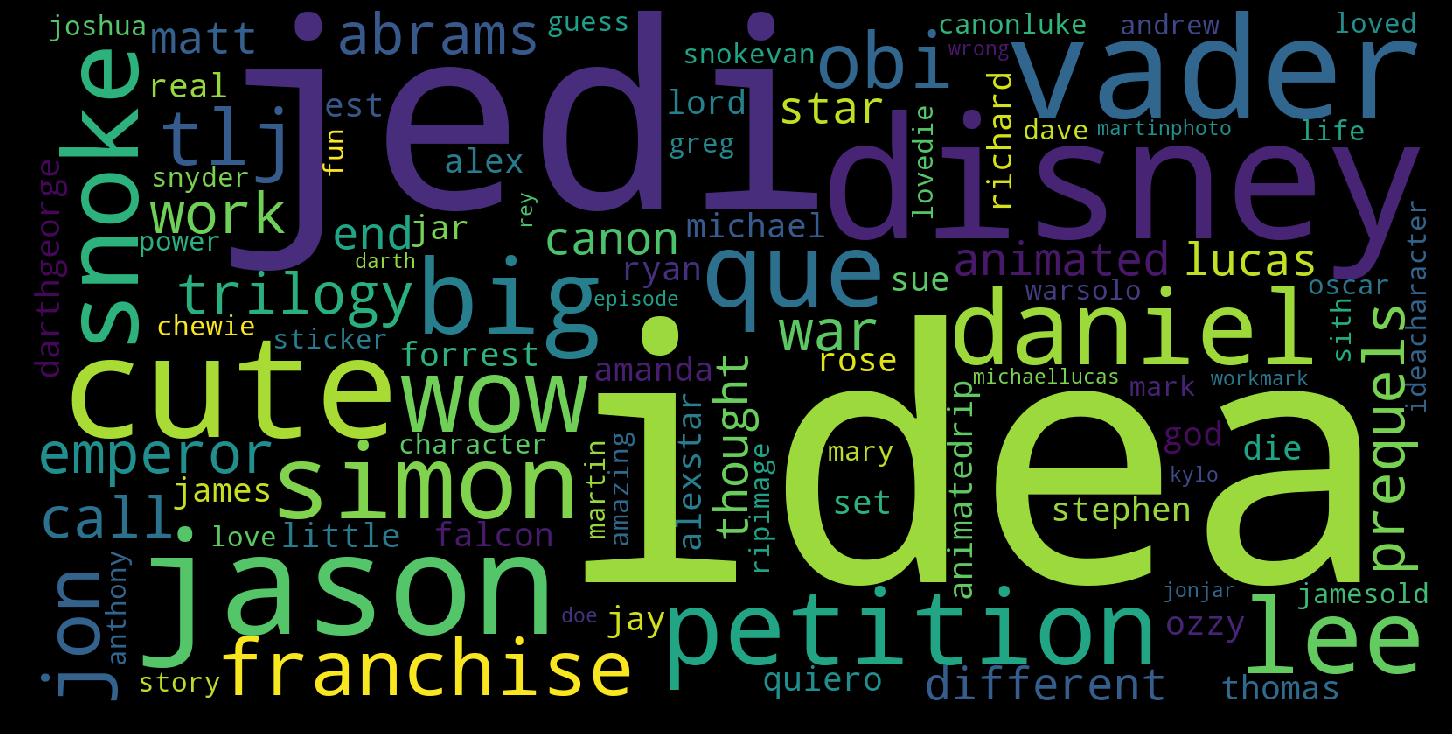

In [212]:
# print words without probability
s=""
for i in range(0,15):
    topics = model.show_topic(i, 10)
    s+=" ".join([str(word[0]) for word in topics])
def unigrams_and_bigrams(s, stopwords=None):
    stopwords = [s.lower() for s in stopwords] if stopwords is not None else []
    words = re.findall(r"\w[\w']+", s)
    # remove stopwords
    words = [word for word in words if word.lower() not in stopwords]
    # remove 's
    words = [word[:-2] if word.lower().endswith("'s") else word for word in words]
    # fix for movie-script upper case names
    words = [word if not word.isupper() else word.title() for word in words]
    n_words = len(words)
    # make tuples of two words following each other
    bigrams = list(pairwise(words))
    counts_unigrams = defaultdict(int)
    counts_bigrams = defaultdict(int)
    for word in words:
        counts_unigrams[word] += 1
    for bigram in bigrams:
        # join tuples by a space
        counts_bigrams[bigram] += 1

    counts_all = {}
    counts_all.update(counts_unigrams)
    counts_all.update(counts_bigrams)

    # decount words inside bigrams
    for bigram in counts_bigrams.keys():
        # collocation detection (30 is arbitrary):
        if score(bigram, counts_all, n_words) > 30:
            counts_unigrams[bigram[0]] -= counts_bigrams[bigram]
            counts_unigrams[bigram[1]] -= counts_bigrams[bigram]
        # add joined bigram into unigrams
        counts_unigrams[' '.join(bigram)] = counts_bigrams[bigram]
    return counts_unigrams
def pairwise(iterable):
    # from itertool recipies
    # is -> (s0,s1), (s1,s2), (s2, s3), ...
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)


from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random
from itertools import tee
from collections import defaultdict
import re
from math import log
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1600, height=800).generate(s)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

**According to the analysis above, the audience thought that the movie was fun to watch, they were excited to talk about each individual character which could mean that they can are interested in these characters and want to know their how they make decisions, interpret situations. One key element that the audience loved were the animations and the special effects added as frequently as they were. It looks like the facebook users enjoyed the storyline and appreciated the fact that there was a trilogy of movies. There were mentions of the words 'die', 'life' implying that the audience were thrilled by the emotional roller coaster that was presented in the movie. Furthermore, the set was emntioned by some users who called it unique. It also seemed like some users were deeply invested in the movie and were willing to sign petitions to change the storyline given to certain characters.**

### Inception

# Data Cleaning & Text Preprocessing Processing:

In [83]:
from csv import DictReader

with open("inception_facebook_comments.csv") as f:
    texts = [row["comment_message"] for row in DictReader(f)]

In [84]:
import re
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", text) for text in texts]
# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]
# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [85]:
# A list of extra stopwords specific to the debates transcripts (if you want to remove more stopwords)
extra_stopwords = ['will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way','president', 'want',
                'like','say','got','said','just','something','tell','put','now', 'bad','back','want','right','every','one','use','come','never', 
                'many','along','things','day','also','first','guy', 'great', 'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see', 'edu', 'bit', 'http','html', 'com',',', '.', 
                'www', 'new', 'post', 'full', 'wait', 'time', 'spoiler', 'lol', 'page', 'made', 'film', 'yes', 'no', 'sure', 'still'
                  , 'shit', 'please', 'ever', 'yeah', 'always', 'der', 'haha', 'ich', 'dont', 'actually', 'even', 'lmao', 'movie', 'someone', 'omg', 
                  'fuck','really','coming', 'man', 'cool', 'maybe', 'crap', 'rather', 'really', 'whatever', 'cause', 'hate', 'anything', 'nothing', 'part'
                   , 'mean', 'best', 'true', 'han', 'though', 'since', 'better', 'thought', 'though', 'ready','remember',
                  'already', 'yet', 'true', 'away', 'waiting', 'michael', 'amazing', 'happy', 'birthday', 'sir', 'definitely'
                  ,'another', 'everything', 'whithin', 'list', '']

extra_stoplist = extra_stopwords
texts = [[word for word in text if word not in extra_stoplist] for text in texts]
#https://github.com/alexperrier/datatalks/blob/master/debates/R/stm.R

# Content Analytics:

In [86]:
# this is text processing required for topic modeling with Gensim

## Create a dictionary representation of the documents.
dictionary = Dictionary(texts)
dictionary.save('dictionary_Inception.dict')  # store the dictionary, for future reference

len(dictionary)

4163

In [87]:
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) - an optional step
dictionary.filter_extremes(no_below=5, no_above=0.5) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

388

In [88]:
# convert words to vetors or integers
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('dictionary_Inception.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

1991

In [89]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 388
Number of documents: 1991


In [90]:
# later you can retrive the saved dict and corpus
# https://radimrehurek.com/gensim/tut1.html

saved_dict = dictionary.load('dictionary_Inception.dict')

#for i in saved_dict.token2id.iteritems():
#    print i

In [91]:
# you can retrieve the saved corpus

corpus_saved = corpora.MmCorpus('dictionary_Inception.mm')

In [92]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, passes=30, eval_every = 1)

In [93]:
model.save('lda_Inception.model') # same for tfidf, lda, ...
#model = models.LdaModel.load('data/lda.model')

In [94]:
model.show_topics(num_topics=15)

[(0,
  u'0.117*"interstellar" + 0.077*"youtube" + 0.061*"video" + 0.057*"watch" + 0.054*"inception" + 0.041*"share" + 0.040*"hand" + 0.037*"hollywood" + 0.026*"director" + 0.025*"david"'),
 (1,
  u'0.055*"original" + 0.048*"concept" + 0.047*"watched" + 0.044*"train" + 0.043*"must" + 0.036*"could" + 0.033*"murrrrph" + 0.030*"thanks" + 0.026*"life" + 0.026*"screenplay"'),
 (2,
  u'0.102*"top" + 0.101*"favorite" + 0.051*"real" + 0.051*"end" + 0.050*"cobb" + 0.048*"dreaming" + 0.033*"point" + 0.032*"masterpiece" + 0.030*"totem" + 0.027*"spinning"'),
 (3,
  u'0.136*"seen" + 0.125*"watch" + 0.086*"sticker" + 0.046*"scene" + 0.036*"favourite" + 0.031*"saw" + 0.029*"least" + 0.025*"night" + 0.025*"uhd" + 0.025*"wow"'),
 (4,
  u'0.075*"caine" + 0.057*"based" + 0.050*"find" + 0.038*"stop" + 0.037*"power" + 0.036*"watching" + 0.032*"ist" + 0.032*"incredible" + 0.032*"american" + 0.032*"behind"'),
 (5,
  u'0.075*"nice" + 0.069*"buy" + 0.061*"ray" + 0.053*"blu" + 0.051*"music" + 0.046*"came" + 0.04

In [95]:

# print words without probability
for i in range(0,15):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])

interstellar, youtube, video, watch, inception, share, hand, hollywood, director, david
original, concept, watched, train, must, could, murrrrph, thanks, life, screenplay
top, favorite, real, end, cobb, dreaming, point, masterpiece, totem, spinning
seen, watch, sticker, scene, favourite, saw, least, night, uhd, wow
caine, based, find, stop, power, watching, ist, incredible, american, behind
nice, buy, ray, blu, music, came, boy, keep, oled, hahaha
war, nolan, ryan, king, deep, speech, worst, quality, saving, private
share, image, animated, ending, nomination, oscar, story, agree, female, question
leo, actor, mind, dicaprio, understand, une, leonardo, chris, half, comme
love, wake, realize, second, term, asleep, classic, absolutely, wish, cant
dream, reality, within, dunkirk, dreaming, feel, real, awake, fall, middle
brain, government, technology, memory, control, neuron, soviet, secret, read, human
knight, dark, memento, greatest, nolan, zimmer, trilogy, batman, soundtrack, hdr
incepti

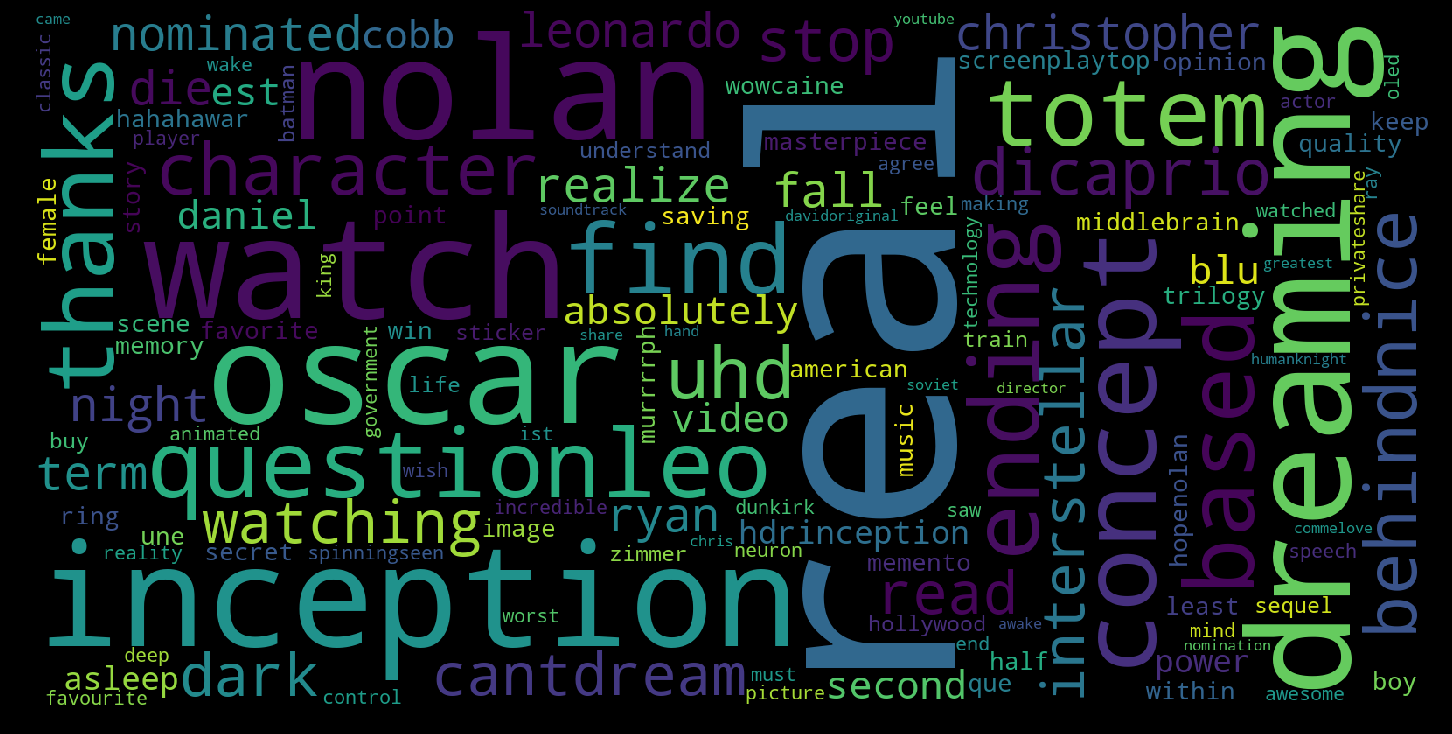

In [96]:
# print words without probability
s=""
for i in range(0,15):
    topics = model.show_topic(i, 10)
    s+=" ".join([str(word[0]) for word in topics])
def unigrams_and_bigrams(s, stopwords=None):
    stopwords = [s.lower() for s in stopwords] if stopwords is not None else []
    words = re.findall(r"\w[\w']+", s)
    # remove stopwords
    words = [word for word in words if word.lower() not in stopwords]
    # remove 's
    words = [word[:-2] if word.lower().endswith("'s") else word for word in words]
    # fix for movie-script upper case names
    words = [word if not word.isupper() else word.title() for word in words]
    n_words = len(words)
    # make tuples of two words following each other
    bigrams = list(pairwise(words))
    counts_unigrams = defaultdict(int)
    counts_bigrams = defaultdict(int)
    for word in words:
        counts_unigrams[word] += 1
    for bigram in bigrams:
        # join tuples by a space
        counts_bigrams[bigram] += 1

    counts_all = {}
    counts_all.update(counts_unigrams)
    counts_all.update(counts_bigrams)

    # decount words inside bigrams
    for bigram in counts_bigrams.keys():
        # collocation detection (30 is arbitrary):
        if score(bigram, counts_all, n_words) > 30:
            counts_unigrams[bigram[0]] -= counts_bigrams[bigram]
            counts_unigrams[bigram[1]] -= counts_bigrams[bigram]
        # add joined bigram into unigrams
        counts_unigrams[' '.join(bigram)] = counts_bigrams[bigram]
    return counts_unigrams
def pairwise(iterable):
    # from itertool recipies
    # is -> (s0,s1), (s1,s2), (s2, s3), ...
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)


from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random
from itertools import tee
from collections import defaultdict
import re
from math import log
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1600, height=800).generate(s)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

**Inception: This movie did particularly well in terms of ratings scoring an 8.8 out of 10. According to its Facebook fanpage, the concept of the movie was something that had not been explored by Hollywood in the recent past. It was deemed to have an original storyline and the screenplay was incredibly executed. The gist of the movie is as follows: a thief, who steals corporate secrets through the use of dream-sharing technology, is given the inverse task of planting an idea into the mind of a CEO. The film follows a a sci-fi theme in regards of human dreams which is a mysteriously interesting topic and has intrigued the audience so they are deeply invested in the movie. The music and animations used in the movie were other features that helped it stand out. There was an honourable mention of the lead female actress commending her performance in the movie. Leonardo DiCaprio's acting was absolutely loved by most of the users who commented on this fanpage. Additionally, the attention to detail that was provided by the director, be it the use of latest technology to imitate what the inside of a brain looks like or the process of dreaming, what a person dreams about or for how long they remember it after they're awake is what really helped the movie attract the large number of positive reviews that it did.**

## 12 Years a Slave

# Data Cleaning & Text Preprocessing Processing:

In [97]:
from csv import DictReader

with open("12YearsASlave_facebook_comments.csv") as f:
    texts = [row["comment_message"] for row in DictReader(f)]

In [98]:
import re
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", text) for text in texts]
# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]
# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [99]:

# A list of extra stopwords specific to the debates transcripts (if you want to remove more stopwords)
extra_stopwords = ['will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way','president', 'want',
                'like','say','got','said','just','something','tell','put','now', 'bad','back','want','right','every','one','use','come','never', 
                'many','along','things','day','also','first','guy', 'great', 'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see', 'edu', 'bit', 'http','html', 'com',',', '.', 
                'www', 'new', 'post', 'full', 'wait', 'time', 'spoiler', 'lol', 'page', 'made', 'film', 'yes', 'no', 'sure', 'still'
                  , 'shit', 'please', 'ever', 'yeah', 'always', 'der', 'haha', 'ich', 'dont', 'actually', 'even', 'lmao', 'movie', 'someone', 'omg', 
                  'fuck','really','coming', 'man', 'cool', 'maybe', 'crap', 'rather', 'really', 'whatever', 'cause', 'hate', 'anything', 'nothing', 'part'
                   , 'mean', 'best', 'true', 'han', 'though', 'since', 'better', 'thought', 'though', 'ready','remember',
                  'already', 'yet', 'true', 'away', 'waiting', 'michael', 'amazing', 'happy', 'birthday', 'sir', 'definitely'
                  ,'another', 'everything', 'whithin', 'list', '']

extra_stoplist = extra_stopwords
texts = [[word for word in text if word not in extra_stoplist] for text in texts]
#https://github.com/alexperrier/datatalks/blob/master/debates/R/stm.R

# Content Analytics:

In [100]:
# this is text processing required for topic modeling with Gensim

## Create a dictionary representation of the documents.
dictionary = Dictionary(texts)
dictionary.save('dictionary_12YS.dict')  # store the dictionary, for future reference

len(dictionary)

2193

In [101]:
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) - an optional step
dictionary.filter_extremes(no_below=5, no_above=0.5) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

147

In [102]:
# convert words to vetors or integers
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('dictionary_12YS.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

3786

In [103]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 147
Number of documents: 3786


In [104]:
# later you can retrive the saved dict and corpus
# https://radimrehurek.com/gensim/tut1.html

saved_dict = dictionary.load('dictionary_12YS.dict')

#for i in saved_dict.token2id.iteritems():
#    print i

In [105]:
# you can retrieve the saved corpus

corpus_saved = corpora.MmCorpus('dictionary_12YS.mm')

In [106]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, passes=30, eval_every = 1)

C:\Users\Rida\Anaconda2\lib\site-packages\gensim\models\ldamodel.py:579: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


In [107]:





model.save('lda_12YS.model') # same for tfidf, lda, ...
#model = models.LdaModel.load('data/lda.model')

In [108]:




model.show_topics(num_topics=15)

[(0,
  u'0.224*"excellent" + 0.123*"picture" + 0.123*"actress" + 0.103*"touching" + 0.083*"screenplay" + 0.042*"heart" + 0.040*"different" + 0.022*"fassbender" + 0.022*"play" + 0.002*"proud"'),
 (1,
  u'0.263*"beautiful" + 0.132*"woman" + 0.118*"lady" + 0.089*"strong" + 0.074*"queen" + 0.058*"hard" + 0.030*"powerful" + 0.018*"performance" + 0.016*"live" + 0.016*"book"'),
 (2,
  u'0.263*"slave" + 0.094*"god" + 0.063*"thanks" + 0.063*"den" + 0.054*"birth" + 0.054*"blessing" + 0.054*"live" + 0.046*"free" + 0.045*"making" + 0.033*"play"'),
 (3,
  u'0.147*"watch" + 0.123*"share" + 0.097*"book" + 0.082*"story" + 0.074*"seen" + 0.069*"youtube" + 0.039*"history" + 0.037*"tinyurl" + 0.037*"zejqtkl" + 0.037*"video"'),
 (4,
  u'0.174*"job" + 0.081*"internet" + 0.055*"work" + 0.051*"interested" + 0.051*"investment" + 0.051*"home" + 0.051*"daily" + 0.051*"earn" + 0.033*"loved" + 0.027*"wanted"'),
 (5,
  u'0.277*"sticker" + 0.109*"freedom" + 0.078*"soul" + 0.067*"tear" + 0.056*"facebook" + 0.056*"po

In [109]:
# print words without probability
for i in range(0,15):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])

excellent, picture, actress, touching, screenplay, heart, different, fassbender, play, proud
beautiful, woman, lady, strong, queen, hard, powerful, performance, live, book
slave, god, thanks, den, birth, blessing, live, free, making, play
watch, share, book, story, seen, youtube, history, tinyurl, zejqtkl, video
job, internet, work, interested, investment, home, daily, earn, loved, wanted
sticker, freedom, soul, tear, facebook, powerful, keep, watching, eye, watched
god, save, everyone, race, black, committed, seeing, others, bless, love
que, est, saw, beau, family, finally, home, race, scene, anniversaire
african, american, anyone, slave, hell, doe, human, watch, lord, slavery
lupita, chiwetel, slave, paul, oscar, ejiofor, nyong, hour, fassbender, took
life, white, could, mind, black, sad, human, slavery, beautiful, pain
scene, actor, director, favorite, done, slavery, human, child, white, slave
brad, solomon, steve, pitt, mcqueen, nice, slavery, fantastic, two, cry
hbd, black, role, 

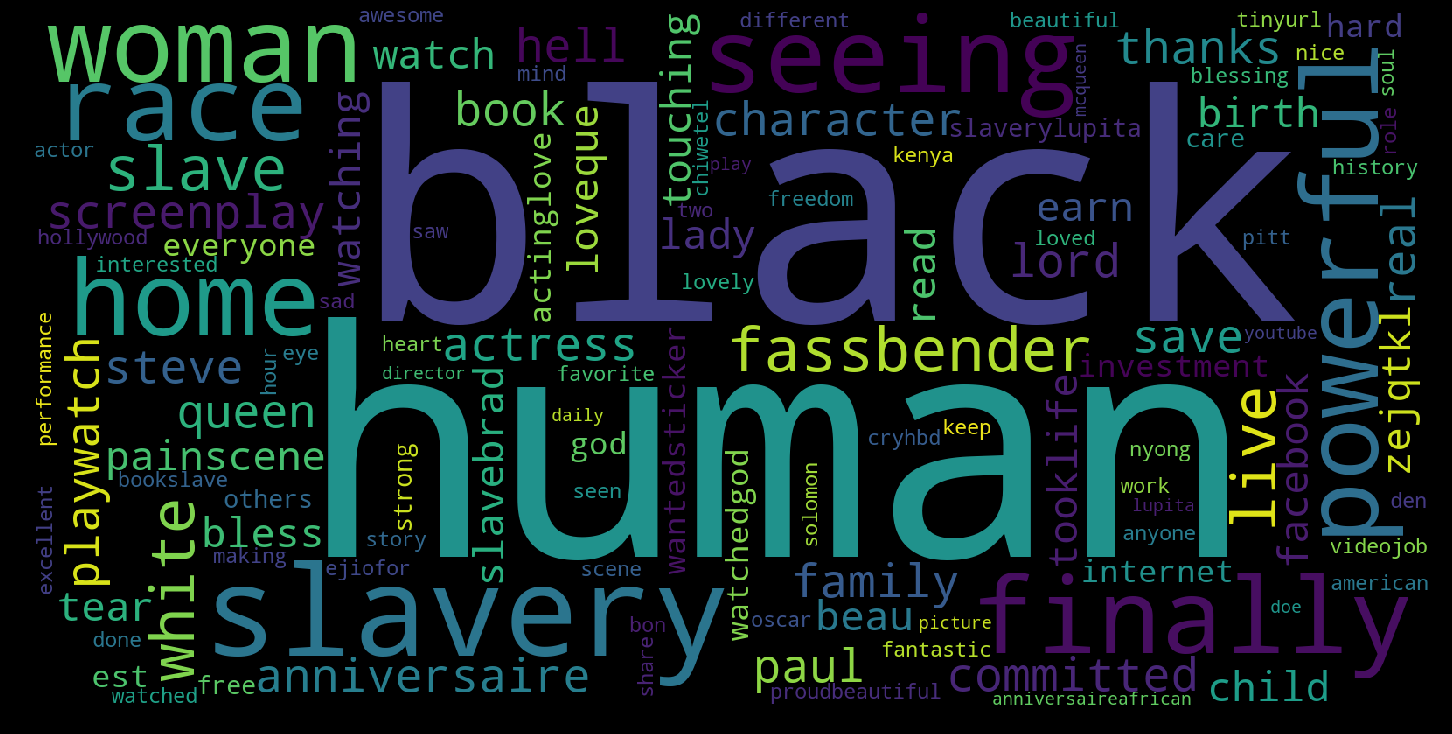

In [110]:
# print words without probability
s=""
for i in range(0,15):
    topics = model.show_topic(i, 10)
    s+=" ".join([str(word[0]) for word in topics])
def unigrams_and_bigrams(s, stopwords=None):
    stopwords = [s.lower() for s in stopwords] if stopwords is not None else []
    words = re.findall(r"\w[\w']+", s)
    # remove stopwords
    words = [word for word in words if word.lower() not in stopwords]
    # remove 's
    words = [word[:-2] if word.lower().endswith("'s") else word for word in words]
    # fix for movie-script upper case names
    words = [word if not word.isupper() else word.title() for word in words]
    n_words = len(words)
    # make tuples of two words following each other
    bigrams = list(pairwise(words))
    counts_unigrams = defaultdict(int)
    counts_bigrams = defaultdict(int)
    for word in words:
        counts_unigrams[word] += 1
    for bigram in bigrams:
        # join tuples by a space
        counts_bigrams[bigram] += 1

    counts_all = {}
    counts_all.update(counts_unigrams)
    counts_all.update(counts_bigrams)

    # decount words inside bigrams
    for bigram in counts_bigrams.keys():
        # collocation detection (30 is arbitrary):
        if score(bigram, counts_all, n_words) > 30:
            counts_unigrams[bigram[0]] -= counts_bigrams[bigram]
            counts_unigrams[bigram[1]] -= counts_bigrams[bigram]
        # add joined bigram into unigrams
        counts_unigrams[' '.join(bigram)] = counts_bigrams[bigram]
    return counts_unigrams
def pairwise(iterable):
    # from itertool recipies
    # is -> (s0,s1), (s1,s2), (s2, s3), ...
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)


from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random
from itertools import tee
from collections import defaultdict
import re
from math import log
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1600, height=800).generate(s)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

**12 Years A Slave: This movie was top ranked according to metascores. According to the comments on its Facebook fanpage, the movie's screenplay was one of its outstanding features. The audience were psyched about how 'heart-touching'  the plot was. The most popular topic discussed in the comment was the phenomenal acting of the lead actress of the film which could suggest that this particular actress was seen in this kind of a role and thus will do well in other roles of a similar sort. Moreover, some of the users commented that the plot was different from the all the others produced lately.  The next series of topics involved celebrating feminism and the powerful performance of the female actors. This movie represented an important part of Black History which is why its story demonstrated all sorts of painful moments in time. Depicting slavery with this level of detail was deeply appreciated by the audience.   **

## Data Collection: Twitter data

In [2]:
import json
 
with open('movies.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dictionary
    print(json.dumps(tweet, indent=4)) 
    
# the original data from Twitter looks like below.

{
    "quote_count": 0, 
    "contributors": null, 
    "truncated": false, 
    "text": "RT @imaginator1d: Not really because we aren\u2019t making a movie for critics, they will never publicly love it, we\u2019re making this for YOU \u2764\ufe0f\u2764\ufe0f\u2026", 
    "is_quote_status": true, 
    "in_reply_to_status_id": null, 
    "reply_count": 0, 
    "id": 987824848377450496, 
    "favorite_count": 0, 
    "entities": {
        "user_mentions": [
            {
                "id": 1478986855, 
                "indices": [
                    3, 
                    16
                ], 
                "id_str": "1478986855", 
                "screen_name": "imaginator1d", 
                "name": "Anna Todd"
            }
        ], 
        "symbols": [], 
        "hashtags": [], 
        "urls": []
    }, 
    "quoted_status_id": 987617515189751808, 
    "retweeted": false, 
    "coordinates": null, 
    "timestamp_ms": "1524350771408", 
    "quoted_status": {
        "qu

In [3]:
import json

# create an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('movies.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

# lets see how many we got
print len(data)

36715


In [4]:
# read the first five tweets and other meta data only
for i in data[:5]:
    print i

{u'quote_count': 0, u'contributors': None, u'truncated': False, u'text': u'RT @imaginator1d: Not really because we aren\u2019t making a movie for critics, they will never publicly love it, we\u2019re making this for YOU \u2764\ufe0f\u2764\ufe0f\u2026', u'is_quote_status': True, u'in_reply_to_status_id': None, u'reply_count': 0, u'id': 987824848377450496L, u'favorite_count': 0, u'entities': {u'user_mentions': [{u'id': 1478986855, u'indices': [3, 16], u'id_str': u'1478986855', u'screen_name': u'imaginator1d', u'name': u'Anna Todd'}], u'symbols': [], u'hashtags': [], u'urls': []}, u'quoted_status_id': 987617515189751808L, u'retweeted': False, u'coordinates': None, u'timestamp_ms': u'1524350771408', u'quoted_status': {u'quote_count': 1, u'contributors': None, u'truncated': True, u'text': u'@imaginator1d are you scared for the criticism about your movie once it comes out? So many people having opinions a\u2026 https://t.co/UqLvGMTS7f', u'is_quote_status': False, u'in_reply_to_status_id': No

In [5]:
# read first five tweets only 
for i in data[:5]:
    print i['text']

RT @imaginator1d: Not really because we aren’t making a movie for critics, they will never publicly love it, we’re making this for YOU ❤️❤️…
RT @zakpenn: you know hard it is to license millarverse stuff in the Oasis?  Kick Ass avatars cost more than the cataclyst. https://t.co/uh…
@ScripttoScreeen So the best line in the scene &amp; one of the funniest in the film was improvised? Damn!
RT @i_Home_Box: 2018
(آنَا) تقضي طفولتها بالكامل تحت رعاية رجل غامض، لا تعرف عنه سوى لقب (دادي) الذي تناديه به. يحتجزها الرجل في العلية طيل…
@Film4 Holy moly that was an amazing film


In [6]:
# savin the entire tweets (not other data) in a variable and print it

texts = [ T['text'] for T in data if 'text' in T ]#to prevent error messages
len(texts)

36713

In [7]:

for i in data[:5]:
    print i

{u'quote_count': 0, u'contributors': None, u'truncated': False, u'text': u'RT @imaginator1d: Not really because we aren\u2019t making a movie for critics, they will never publicly love it, we\u2019re making this for YOU \u2764\ufe0f\u2764\ufe0f\u2026', u'is_quote_status': True, u'in_reply_to_status_id': None, u'reply_count': 0, u'id': 987824848377450496L, u'favorite_count': 0, u'entities': {u'user_mentions': [{u'id': 1478986855, u'indices': [3, 16], u'id_str': u'1478986855', u'screen_name': u'imaginator1d', u'name': u'Anna Todd'}], u'symbols': [], u'hashtags': [], u'urls': []}, u'quoted_status_id': 987617515189751808L, u'retweeted': False, u'coordinates': None, u'timestamp_ms': u'1524350771408', u'quoted_status': {u'quote_count': 1, u'contributors': None, u'truncated': True, u'text': u'@imaginator1d are you scared for the criticism about your movie once it comes out? So many people having opinions a\u2026 https://t.co/UqLvGMTS7f', u'is_quote_status': False, u'in_reply_to_status_id': No

In [8]:
# removing those 22 error messages
tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets) 

36713

In [9]:
# save screen_names

screen_names = [T['user']['screen_name'] for T in tweets]
len(screen_names)

36713

In [10]:
# display screen_name, tweets

for i in tweets[:5]:
    print i['user']['screen_name'], i['text']

GabrielaHh92 RT @imaginator1d: Not really because we aren’t making a movie for critics, they will never publicly love it, we’re making this for YOU ❤️❤️…
Dave_DSG RT @zakpenn: you know hard it is to license millarverse stuff in the Oasis?  Kick Ass avatars cost more than the cataclyst. https://t.co/uh…
pigmi_warrior @ScripttoScreeen So the best line in the scene &amp; one of the funniest in the film was improvised? Damn!
me34sh RT @i_Home_Box: 2018
(آنَا) تقضي طفولتها بالكامل تحت رعاية رجل غامض، لا تعرف عنه سوى لقب (دادي) الذي تناديه به. يحتجزها الرجل في العلية طيل…
UmarDitta @Film4 Holy moly that was an amazing film


In [11]:
# import popular packages
import csv
import pandas as pd

**Analysis:**

In [12]:
from collections import Counter

c = Counter(screen_names)
print c

Counter({u'PaulPeterMF': 114, u'opprime_tv': 73, u'nasser_asmail': 47, u'dizifizy': 46, u'laurelantonia26': 46, u'hasanislam45': 38, u'mangumanes': 38, u'kidsislandanime': 31, u'manish_gupta__': 27, u'Irina92650727': 25, u'superheroes30': 25, u'movie__online': 23, u'kaylierosemry26': 23, u'skywest1515': 22, u'NverNotLoveYo': 20, u'ronniehowlett3': 19, u'CriterionCrowd': 18, u'VHSRevival': 18, u'VWellwishers': 17, u'QBHitList': 17, u'mwbuzz': 15, u'Jaswant90668083': 15, u'SZandvoort': 14, u'PiyushPawar307': 13, u'DeepshikaDhaka1': 13, u'RightOnTV': 13, u'Bhuyanmisil': 13, u'Kev_h80': 13, u'Corey_Feldman': 12, u'RahilMirchi': 12, u'saaho_143': 12, u'ultrasvarundvn': 12, u'_krishna_123': 12, u'markhtyler59': 12, u'Anuj_dvn': 12, u'BrayBarakat': 12, u'MOVIEFAN99_': 11, u'NextBestPicture': 11, u'sos_ukraine': 11, u'SkyTheBook15': 11, u'SergioPimwong': 11, u'AlexMimikosyaho': 10, u'dombatman100': 10, u'omarepps': 10, u'yeahmikeyshotme': 10, u'michael1471231': 10, u'ManaMahesh169': 10, u'rohi

In [13]:
# how many unique users in the data?
len(c)

31169

In [14]:
#how many tweets per user?

float(2657/2303)

1.0

**Most active users:**

In [15]:
from collections import Counter

c = Counter(screen_names)
print c

Counter({u'PaulPeterMF': 114, u'opprime_tv': 73, u'nasser_asmail': 47, u'dizifizy': 46, u'laurelantonia26': 46, u'hasanislam45': 38, u'mangumanes': 38, u'kidsislandanime': 31, u'manish_gupta__': 27, u'Irina92650727': 25, u'superheroes30': 25, u'movie__online': 23, u'kaylierosemry26': 23, u'skywest1515': 22, u'NverNotLoveYo': 20, u'ronniehowlett3': 19, u'CriterionCrowd': 18, u'VHSRevival': 18, u'VWellwishers': 17, u'QBHitList': 17, u'mwbuzz': 15, u'Jaswant90668083': 15, u'SZandvoort': 14, u'PiyushPawar307': 13, u'DeepshikaDhaka1': 13, u'RightOnTV': 13, u'Bhuyanmisil': 13, u'Kev_h80': 13, u'Corey_Feldman': 12, u'RahilMirchi': 12, u'saaho_143': 12, u'ultrasvarundvn': 12, u'_krishna_123': 12, u'markhtyler59': 12, u'Anuj_dvn': 12, u'BrayBarakat': 12, u'MOVIEFAN99_': 11, u'NextBestPicture': 11, u'sos_ukraine': 11, u'SkyTheBook15': 11, u'SergioPimwong': 11, u'AlexMimikosyaho': 10, u'dombatman100': 10, u'omarepps': 10, u'yeahmikeyshotme': 10, u'michael1471231': 10, u'ManaMahesh169': 10, u'rohi

In [16]:
# five most active tweeters
c.most_common(5)

[(u'PaulPeterMF', 114),
 (u'opprime_tv', 73),
 (u'nasser_asmail', 47),
 (u'dizifizy', 46),
 (u'laurelantonia26', 46)]

In [17]:
# make it pretty
activetweeters = c.most_common(5)
activetweeters_df = pd.DataFrame(activetweeters)
activetweeters_df

0    1
0      PaulPeterMF  114
1       opprime_tv   73
2    nasser_asmail   47
3         dizifizy   46
4  laurelantonia26   46

**Who is sharing their location:**

In [18]:
#how many tweets contain geocode

geo = [T['user']['geo_enabled'] for T in tweets if 'user' in T]

c = Counter(geo)
print c

Counter({False: 22079, True: 14634})


### Original tweets and retweeted tweets:

In [19]:
#remove retweets

originaltweets = []

for tweet in texts:
    if 'rt @' not in tweet.lower():
        originaltweets.append(tweet)
        
len(originaltweets)

16138

In [20]:
# get retweets only

#remove retweets

retweets_only = []

for tweet in texts:
    if 'rt @' in tweet.lower():
        retweets_only.append(tweet)
        
len(retweets_only)

20575

**Identifying the different URLs in the tweets collected:**

In [21]:
for T in tweets[:10]:
    print T['entities']['urls']

[]
[]
[]
[]
[]
[]
[{u'url': u'https://t.co/ylYHCXRtPl', u'indices': [76, 99], u'expanded_url': u'https://youtu.be/ON399ImvWb0', u'display_url': u'youtu.be/ON399ImvWb0'}]
[]
[]
[]


In [22]:
list_url=[]
for T in tweets:
    for i in T['entities']['urls']:
        list_url.append(i)

In [23]:
for T in tweets[:5]:
    for i in T['entities']['urls']:
        print i['url']

In [24]:
len(list_url)

14822

In [25]:
urls = []

for T in tweets:
    for i in T['entities']['urls']:
        urls.append(i['url'])
        
urls

[u'https://t.co/ylYHCXRtPl',
 u'https://t.co/XKJVXUZF0I',
 u'https://t.co/DBEp6gAiOT',
 u'https://t.co/oVBal98GMs',
 u'https://t.co/yEJZz2kVhE',
 u'https://t.co/1dsebvI8BU',
 u'https://t.co/X0zAyO2a3w',
 u'https://t.co/7mVaFpG4su',
 u'https://t.co/hWAhg0J2dG',
 u'https://t.co/cBZBkfPgFT',
 u'https://t.co/ylYHCXRtPl',
 u'https://t.co/xb5N2CmnpP',
 u'https://t.co/sgBXJOQ1xr',
 u'https://t.co/qVeeiyZLoN',
 u'https://t.co/4O61Zg2lPo',
 u'https://t.co/RNUcmGdUum',
 u'https://t.co/ylYHCXRtPl',
 u'https://t.co/VnhKGz8Pm7',
 u'https://t.co/HfmSqVVLqu',
 u'https://t.co/QRKFcdMDpY',
 u'https://t.co/9AiyZJMbHm',
 u'https://t.co/LXTOvyqZRQ',
 u'https://t.co/Zp5tIWBXtq',
 u'https://t.co/8IwCXcKYmQ',
 u'https://t.co/m7t873jCyW',
 u'https://t.co/uYkLEvc0SQ',
 u'https://t.co/HMaTadcXMO',
 u'https://t.co/ML8JpYtSCO',
 u'https://t.co/GOTLQXK2mA',
 u'https://t.co/05wcw9nyVf',
 u'https://t.co/ciDbSZpQ2P',
 u'https://t.co/DcMBnLBy8j',
 u'https://t.co/tqjBgH2ZGw',
 u'https://t.co/iml6a09M6O',
 u'https://t.c

In [26]:
#top 10 urls ... visit some of them and find out what the articles are about

c = Counter(urls)
c.most_common(10)

[(u'https://t.co/w09uHuBRYa', 455),
 (u'https://t.co/4u8bB7tlb9', 455),
 (u'https://t.co/Tz6c8atIDa', 455),
 (u'https://t.co/Bzb6YGg1rL', 350),
 (u'https://t.co/ylYHCXRtPl', 251),
 (u'https://t.co/BwzR055ria', 198),
 (u'https://t.co/eaTGsHWDrb', 157),
 (u'https://t.co/hFuqBs8la6', 56),
 (u'https://t.co/UNHygT6Qix', 42),
 (u'https://t.co/WbAyzuKSLK', 37)]

**More data processing**

In [27]:
texts[:5]

[u'RT @imaginator1d: Not really because we aren\u2019t making a movie for critics, they will never publicly love it, we\u2019re making this for YOU \u2764\ufe0f\u2764\ufe0f\u2026',
 u'RT @zakpenn: you know hard it is to license millarverse stuff in the Oasis?  Kick Ass avatars cost more than the cataclyst. https://t.co/uh\u2026',
 u'@ScripttoScreeen So the best line in the scene &amp; one of the funniest in the film was improvised? Damn!',
 u'RT @i_Home_Box: 2018\n(\u0622\u0646\u064e\u0627) \u062a\u0642\u0636\u064a \u0637\u0641\u0648\u0644\u062a\u0647\u0627 \u0628\u0627\u0644\u0643\u0627\u0645\u0644 \u062a\u062d\u062a \u0631\u0639\u0627\u064a\u0629 \u0631\u062c\u0644 \u063a\u0627\u0645\u0636\u060c \u0644\u0627 \u062a\u0639\u0631\u0641 \u0639\u0646\u0647 \u0633\u0648\u0649 \u0644\u0642\u0628 (\u062f\u0627\u062f\u064a) \u0627\u0644\u0630\u064a \u062a\u0646\u0627\u062f\u064a\u0647 \u0628\u0647. \u064a\u062d\u062a\u062c\u0632\u0647\u0627 \u0627\u0644\u0631\u062c\u0644 \u0641\u064a \u0627\u

In [28]:
# remove urls
import re
texts_wo_urls = []

for i in texts:
    result = re.sub(r"http\S+", "", i)
    texts_wo_urls.append(result)

texts_wo_urls[:5]

[u'RT @imaginator1d: Not really because we aren\u2019t making a movie for critics, they will never publicly love it, we\u2019re making this for YOU \u2764\ufe0f\u2764\ufe0f\u2026',
 u'RT @zakpenn: you know hard it is to license millarverse stuff in the Oasis?  Kick Ass avatars cost more than the cataclyst. ',
 u'@ScripttoScreeen So the best line in the scene &amp; one of the funniest in the film was improvised? Damn!',
 u'RT @i_Home_Box: 2018\n(\u0622\u0646\u064e\u0627) \u062a\u0642\u0636\u064a \u0637\u0641\u0648\u0644\u062a\u0647\u0627 \u0628\u0627\u0644\u0643\u0627\u0645\u0644 \u062a\u062d\u062a \u0631\u0639\u0627\u064a\u0629 \u0631\u062c\u0644 \u063a\u0627\u0645\u0636\u060c \u0644\u0627 \u062a\u0639\u0631\u0641 \u0639\u0646\u0647 \u0633\u0648\u0649 \u0644\u0642\u0628 (\u062f\u0627\u062f\u064a) \u0627\u0644\u0630\u064a \u062a\u0646\u0627\u062f\u064a\u0647 \u0628\u0647. \u064a\u062d\u062a\u062c\u0632\u0647\u0627 \u0627\u0644\u0631\u062c\u0644 \u0641\u064a \u0627\u0644\u0639\u0644\u064

In [29]:
# remove user names

texts_wo_urls_usernames = []

for i in texts_wo_urls:
    result = re.sub(r"(@[A-Za-z0-9]+)", "", i)
    texts_wo_urls_usernames.append(result)

texts_wo_urls_usernames[:5]

[u'RT : Not really because we aren\u2019t making a movie for critics, they will never publicly love it, we\u2019re making this for YOU \u2764\ufe0f\u2764\ufe0f\u2026',
 u'RT : you know hard it is to license millarverse stuff in the Oasis?  Kick Ass avatars cost more than the cataclyst. ',
 u' So the best line in the scene &amp; one of the funniest in the film was improvised? Damn!',
 u'RT _Home_Box: 2018\n(\u0622\u0646\u064e\u0627) \u062a\u0642\u0636\u064a \u0637\u0641\u0648\u0644\u062a\u0647\u0627 \u0628\u0627\u0644\u0643\u0627\u0645\u0644 \u062a\u062d\u062a \u0631\u0639\u0627\u064a\u0629 \u0631\u062c\u0644 \u063a\u0627\u0645\u0636\u060c \u0644\u0627 \u062a\u0639\u0631\u0641 \u0639\u0646\u0647 \u0633\u0648\u0649 \u0644\u0642\u0628 (\u062f\u0627\u062f\u064a) \u0627\u0644\u0630\u064a \u062a\u0646\u0627\u062f\u064a\u0647 \u0628\u0647. \u064a\u062d\u062a\u062c\u0632\u0647\u0627 \u0627\u0644\u0631\u062c\u0644 \u0641\u064a \u0627\u0644\u0639\u0644\u064a\u0629 \u0637\u064a\u0644\u2026',
 u' 

In [30]:
texts_clean_completely = []

for i in texts:
    result = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", i)
    texts_clean_completely.append(result)

texts_clean_completely[:5]

[u'RT  Not really because we arent making a movie for critics they will never publicly love it were making this for YOU ',
 u'RT  you know hard it is to license millarverse stuff in the Oasis  Kick Ass avatars cost more than the cataclyst ',
 u' So the best line in the scene amp one of the funniest in the film was improvised Damn',
 u'RT HomeBox 2018                     ',
 u' Holy moly that was an amazing film']

In [31]:
# this would be better ...
texts_clean_completely2 = []

for i in texts:
    result = ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", i).split())
    texts_clean_completely2.append(result)

texts_clean_completely2[:5]

[u'RT Not really because we arent making a movie for critics they will never publicly love it were making this for YOU',
 u'RT you know hard it is to license millarverse stuff in the Oasis Kick Ass avatars cost more than the cataclyst',
 u'So the best line in the scene amp one of the funniest in the film was improvised Damn',
 u'RT HomeBox 2018',
 u'Holy moly that was an amazing film']

In [32]:
texts[:10]

[u'RT @imaginator1d: Not really because we aren\u2019t making a movie for critics, they will never publicly love it, we\u2019re making this for YOU \u2764\ufe0f\u2764\ufe0f\u2026',
 u'RT @zakpenn: you know hard it is to license millarverse stuff in the Oasis?  Kick Ass avatars cost more than the cataclyst. https://t.co/uh\u2026',
 u'@ScripttoScreeen So the best line in the scene &amp; one of the funniest in the film was improvised? Damn!',
 u'RT @i_Home_Box: 2018\n(\u0622\u0646\u064e\u0627) \u062a\u0642\u0636\u064a \u0637\u0641\u0648\u0644\u062a\u0647\u0627 \u0628\u0627\u0644\u0643\u0627\u0645\u0644 \u062a\u062d\u062a \u0631\u0639\u0627\u064a\u0629 \u0631\u062c\u0644 \u063a\u0627\u0645\u0636\u060c \u0644\u0627 \u062a\u0639\u0631\u0641 \u0639\u0646\u0647 \u0633\u0648\u0649 \u0644\u0642\u0628 (\u062f\u0627\u062f\u064a) \u0627\u0644\u0630\u064a \u062a\u0646\u0627\u062f\u064a\u0647 \u0628\u0647. \u064a\u062d\u062a\u062c\u0632\u0647\u0627 \u0627\u0644\u0631\u062c\u0644 \u0641\u064a \u0627\u

In [33]:
# extract urls from texts (rather than the original JSON data)

only_urls = []

for i in texts:
    result = re.findall(r'(https?://\S+)', i)
    for url in result: 
        only_urls.append(url)

only_urls[:10]

[u'https://t.co/uh\u2026',
 u'https://t.co/ylYHCXRtPl',
 u'https://t.co/NK43xcHEVt',
 u'https://t.co/XKJVXUZF0I',
 u'https://t.co/DBEp6gAiOT',
 u'https://t.co/oVBal98GMs',
 u'https://t.co/yEJZz2kVhE',
 u'https://t.co/1dsebvI8BU',
 u'https://t.co/aVhvLUqdfZ',
 u'https://t.co/X0zAyO2a3w']

In [34]:
c = Counter(only_urls)
c.most_common(10)

[(u'https://t.co/4u8bB7tlb9', 455),
 (u'https://t.co/w09uHuBRYa\u2026', 455),
 (u'https://t.co/Tz6c8atIDa', 455),
 (u'https://t.co/Bzb6YGg1rL', 350),
 (u'https://t.co/ylYHCXRtPl', 251),
 (u'https://t.co/BwzR055ria', 198),
 (u'https://t.co/eaTGsHWDrb', 157),
 (u'https://t.co/NK43xcHEVt', 139),
 (u'https://t.co/um68C8a7Qu', 112),
 (u'https://t.co/hv5qD3aOfn', 107)]

In [35]:
# the total number of urls in the tweets
len(only_urls)

18032

In [36]:
# the number of unique urls in the tweets
len(c.most_common())

12707

### Data for more descriptive analytics

In [37]:
screen_names = [T['user']['screen_name'] for T in tweets if 'user' in T]
screen_names_description = [status['user']['description'] for status in tweets if 'user' in status]
followers_count = [status['user']['followers_count'] for status in tweets if 'user' in status]
friends_count = [status['user']['friends_count'] for status in tweets if 'user' in status]
screen_names_created = [status['user']['created_at'] for status in tweets if 'user' in status]
location = [status['user']['location'] for status in tweets if 'user' in status]

In [38]:
followers_friends = zip(screen_names, followers_count, friends_count)
for i in followers_friends:
    print i

(u'GabrielaHh92', 75, 226)
(u'Dave_DSG', 1508, 852)
(u'pigmi_warrior', 212, 78)
(u'me34sh', 168, 651)
(u'UmarDitta', 669, 288)
(u'TheArtetaM0ney', 263, 451)
(u'kagikko_onihime', 150, 908)
(u'BryonyEilish', 233, 187)
(u'TamaraVineberg', 5790, 2532)
(u'HannaDANT321', 373, 975)
(u'TheMentalGame', 1717, 2481)
(u'SaifQuadri', 3749, 2464)
(u'TBlackwe85', 445, 4994)
(u'johnrieber', 2238, 1420)
(u'geophf', 3029, 1993)
(u'pearljamdave', 562, 2204)
(u'AngelStage1', 0, 4)
(u'EileenGrubba', 4274, 3159)
(u'DrWAVeSportCd1', 1824, 441)
(u'hGMV7mxCIjSANnp', 139, 879)
(u'spactra', 2786, 4131)
(u'caffeinenights', 2768, 2717)
(u'mucka1s1k', 45, 20)
(u'impeshia007', 18, 133)
(u'RealBMaxwell', 2997, 4512)
(u'chaslovesyou', 1627, 1549)
(u'john_siracusa', 15635, 11421)
(u'IndiaWilloughby', 48358, 2445)
(u'EdsFilmicForays', 188, 341)
(u'JennieJ30669152', 2480, 4980)
(u'ladydisings', 1143, 1045)
(u'VisionOfScarlet', 1067, 605)
(u'6Voyage', 405, 487)
(u'lordan83', 29, 96)
(u'Sallyrgriffith', 292, 553)
(u'Ripper

(u'Taym_98', 276, 410)
(u'WoodshedNation', 1331, 185)
(u'flexgirl21', 1027, 1142)
(u'day_walker777', 691, 720)
(u'Talen_Lee', 2054, 52)
(u'Kartemquin', 19287, 1085)
(u'lanamiesk', 73, 72)
(u'Leafy_Greens', 175, 229)
(u'yeah1027', 13, 1)
(u'westen30', 1028, 295)
(u'spacegoths', 275, 175)
(u'adellejustine_', 498, 417)
(u'ChathuryaaR', 1407, 355)
(u'Your__Princess', 1008, 623)
(u'BecksSpace', 143, 224)
(u'Mrtblt975', 240, 267)
(u'ctblckgymaxiecr', 18, 104)
(u'getridofcablet2', 28, 576)
(u'FrFintan_Stack', 791, 990)
(u'deathingwish', 36, 98)
(u'THKEdifier', 1502, 581)
(u'lara_666666', 4436, 4479)
(u'_krishna_123', 764, 501)
(u'WallStForsale', 1777, 1791)
(u'Nor_Ashimaa', 461, 274)
(u'RedusRaiderus', 59, 184)
(u'fedemando', 29, 315)
(u'impactjeane', 14, 44)
(u'notti517', 5, 102)
(u'Styl_oh', 427, 499)
(u'ikkegoemikke', 22697, 24338)
(u'Grande_STAN_93', 2033, 1065)
(u'Deysi_Avila18', 344, 224)
(u'waderockett', 2558, 1109)
(u'SamuelCP', 80, 589)
(u'Jaydubb29', 240, 154)
(u'igetexcited', 425, 

(u'Jesushuh', 575, 284)
(u'LaFamiliaFilm', 61634, 9197)
(u'Rallory', 518, 390)
(u'lauren_gx0', 483, 1147)
(u'89JW439fdXlDBJ7', 0, 95)
(u'Al_Arios', 2029, 2066)
(u'DeathVessell', 16, 74)
(u'blairlablg', 207, 141)
(u'LMBryski', 2640, 1244)
(u'infiniterain', 481, 938)
(u'camillelevine13', 2, 36)
(u'Show_Off_DZ', 3867, 1853)
(u'K_ThRyce', 252, 340)
(u'shadowinkpress', 8651, 6525)
(u'JoseAlvarez2nd', 559, 402)
(u'baby_got_bakula', 31, 188)
(u'SweetSuubi', 45, 60)
(u'kurvahs', 56, 391)
(u'KodyJBW', 207, 1546)
(u'Gazooki666', 56, 48)
(u'stevengriffin68', 104, 125)
(u'VINNYSCAGNETTI', 208, 28)
(u'OnlyBloodyDavid', 302, 272)
(u'ConfusedSecular', 318, 1253)
(u'gtwarrior47', 2506, 1994)
(u'mengxemo', 13, 9)
(u'IoannisPapaioan', 838, 2270)
(u'bornfacekzimba', 47, 69)
(u'Barry4076', 66, 154)
(u'cypherptyoongii', 1314, 2008)
(u'Lizzs_Lockeroom', 35233, 3807)
(u'frankjazz80', 273, 920)
(u'qkenihan', 10344, 1625)
(u'Larkin_Britt', 1325, 1039)
(u'naddictsNE', 6928, 165)
(u'factotum2468', 1009, 2075)
(u

(u'thegoooodboy', 166, 4)
(u'johnandsamjapan', 251, 569)
(u'hplbot', 570, 31)
(u'imHsiksogood', 1, 72)
(u'KlaineyBear1', 706, 1791)
(u'bombocean', 42, 106)
(u'Senza_Nom', 26, 53)
(u'Manu20162016', 418, 108)
(u'Sairamblue', 56, 223)
(u'mtnbke', 24607, 26520)
(u'EpicToySeries02', 62, 87)
(u'shaerint', 51, 149)
(u'WesleyEure', 147, 128)
(u'VRSvinoth15', 1509, 559)
(u'TeAmo_Kayla', 368, 288)
(u'gabster978', 68, 285)
(u'Kyrode94', 152, 281)
(u'martyalyy', 27, 71)
(u'jeremy_troia', 356, 724)
(u'sarimarie1019', 691, 529)
(u'3eyedmonster', 497, 153)
(u'A_J_Hood', 1131, 566)
(u'johnfiege', 733, 1998)
(u'born_to_6', 11, 154)
(u'nunchpello', 94, 98)
(u'THEArtistT', 497, 258)
(u'sumoholic', 452, 664)
(u'roboemjay', 1086, 419)
(u'terrijo70', 31, 51)
(u'Andrwsup', 553, 673)
(u'NickPerson30', 22, 38)
(u'2006Giuliana', 1018, 885)
(u'kwert', 195, 524)
(u't3medias', 80, 108)
(u'TheSlay', 3293, 342)
(u'jjnacchann', 1413, 1460)
(u'RealMLGMexican', 3, 41)
(u'Planet__Saiyan', 5, 93)
(u'urstrulysai1223', 25,

(u'mail4misha', 778, 359)
(u'Lisa77442606', 29, 120)
(u'kaligonza25', 24, 29)
(u'skywest1515', 24351, 22151)
(u'Lnee_luv', 176, 111)
(u'Swathi140793', 3, 92)
(u'gagasarah1324', 1172, 3743)
(u'abenavidez562', 12, 46)
(u'champagnx_', 706, 435)
(u'vielavie', 797, 510)
(u'Dinesh40245224', 5, 78)
(u'MangiPrudvi', 16, 46)
(u'CammarotaJoanne', 50, 163)
(u'AlexPeterson01', 651, 2891)
(u'bluetoiletduck', 683, 1165)
(u'RANDYBEULSH', 50, 185)
(u'SanthuuTweetz', 519, 210)
(u'bobbyrazak', 6480, 967)
(u'Arielrocks5', 1153, 465)
(u'joao_carmelo', 130, 108)
(u'CaptainBacon61', 365, 1777)
(u'distretto12HG', 22, 11)
(u'Corey_Feldman', 158969, 42)
(u'amccausland22', 626, 1042)
(u'folkpants', 74, 242)
(u'fakegrunge', 410, 1106)
(u'skywest1515', 24351, 22151)
(u'BroMark57', 207, 180)
(u'in4_jm', 9, 60)
(u'MKICCHANAYAK1', 3, 34)
(u'VTWooden', 74, 197)
(u'KiranSSMBfan', 359, 471)
(u'hRXQN5J3VNfer5Q', 128, 147)
(u'geethahaswanth', 47, 255)
(u'daniel_swensen', 3305, 1575)
(u'TriciaMcKenley', 384, 293)
(u'TheRS

(u'arrqwinmyleg', 110, 94)
(u'boltoht', 44, 157)
(u'xhobdo', 2417, 613)
(u'iamehale', 158, 387)
(u'CitizenBomber', 6176, 2264)
(u'jhoffman', 19380, 1855)
(u'D_Robert_Kelly', 2909, 450)
(u'RiskyBusiness31', 685, 640)
(u'boremleo', 14, 65)
(u'ShahidKaaFan', 8450, 359)
(u'ehartonline', 461, 872)
(u'Kevy_Rihn', 424, 529)
(u'seiyesha', 184, 553)
(u'Itz_Punith7999', 541, 496)
(u'TheBrckPhnBandt', 32, 155)
(u'Artyrka1994', 3628, 3675)
(u'ReelReviews31', 140, 193)
(u'TheCrosspig', 473, 399)
(u'tearsIeftariana', 1387, 3556)
(u'lee4hmz', 389, 75)
(u'iamjulka', 522, 425)
(u'D_glorioso', 2002, 816)
(u'GandiDinesh', 0, 51)
(u'AlyCartiglia', 150, 389)
(u'jforn11', 106, 233)
(u'Seiya19981', 366, 398)
(u'Mouryanadh', 11, 176)
(u'PEAHEEJIN00', 874, 278)
(u'Seiya19981', 366, 398)
(u'nickweiner12', 241, 345)
(u'ManUnited0710', 427, 257)
(u'VIDEOBLIVION', 535, 986)
(u'MaybeFoff', 20, 30)
(u'JerryD70', 3381, 5000)
(u'HeKI_LiSA1925', 4, 12)
(u'prissha16', 2170, 480)
(u'HeKI_LiSA1925', 4, 12)
(u'mariaemma16'

(u'Dayana_2oo2', 69, 101)
(u'Dota2TI5', 233, 165)
(u'lakki_Dhfm_', 70, 135)
(u'Miss_Baughn', 550, 2062)
(u'cont3mpo', 367, 337)
(u'allenMarples', 140, 400)
(u'Wolverin81', 1654, 4982)
(u'putrileenaz', 10414, 156)
(u'Nostalgianna', 1062, 839)
(u'JNarasimhaSai1', 2, 27)
(u'urstruly_kundan', 19, 49)
(u'Carolyn63020090', 2, 47)
(u'TweetIn_YoMouth', 9599, 5652)
(u'MAHESH96929629', 0, 44)
(u'Y_CS_910226', 57, 161)
(u'RohithVijay7', 16, 90)
(u'JacklynnMinton', 716, 250)
(u'jaanu_adithi', 149, 294)
(u'fractal74', 455, 362)
(u'JNair80', 138, 2470)
(u'Iovdroughts', 1899, 124)
(u'matteylenberg', 140, 535)
(u'RyGuy1496', 372, 356)
(u'bebbermaniac', 303, 552)
(u'ItsSimplyKayla', 3025, 1839)
(u'The_Engineer31', 23, 68)
(u'Rithik1Kumar', 34, 5)
(u'klaus_kinske', 8730, 6220)
(u'GujjuDhokli', 1144, 626)
(u'ChannelSurfPod', 517, 1845)
(u'ssbDuck', 24954, 213)
(u'Patrickseanphil', 510, 385)
(u'queenofplants', 1035, 660)
(u'xalekevy', 1192, 1801)
(u'missbushwick', 1000, 525)
(u'kingpriyom', 3841, 575)
(u'

(u'PrincefanKumar', 172, 332)
(u'iraidastanyer5', 0, 0)
(u'NekomataMaid', 157, 150)
(u'sunarko271', 913, 2500)
(u'robinsonjazz21', 99, 140)
(u'bharadwaja12b5', 98, 835)
(u'duenas_eron', 7, 50)
(u'rathlabharath', 45, 744)
(u'San_India', 33, 719)
(u'_ASAP_ANDY_', 422, 307)
(u'skyedakotaraine', 651, 499)
(u'spicychalamet', 73, 132)
(u'BBUKDiaryRoom', 2819, 4987)
(u'fbhsegehte1', 1555, 3133)
(u'shorr', 828, 1146)
(u'Saima34253955', 21, 138)
(u'GatorOverlords', 1992, 2079)
(u'Jaeatyet2', 42, 147)
(u'ajakkumama9', 1705, 1963)
(u'herman_maureen', 595, 867)
(u'6FDlHce3U2vQxhW', 75, 94)
(u'_krishna_123', 764, 502)
(u'msmithobx', 3176, 3758)
(u'Mrscoco11', 145, 381)
(u'MakwanaKiran17', 434, 722)
(u'KyleeAnnS', 69, 145)
(u'UshaGupta1', 372, 568)
(u'ZSkeebs', 416, 124)
(u'arayasandis', 569, 2170)
(u'jason_pop', 517, 2219)
(u'dark_tyler', 5887, 1282)
(u'pinkfloydster45', 603, 2657)
(u'TimmoWarner', 348, 227)
(u'ohek4te', 33, 126)
(u'MaraVaudreuil26', 319, 751)
(u'jskielb3', 3464, 1928)
(u'swain9272

(u'Wavesx_', 501, 230)
(u'ReAnimateHer_', 2912, 739)
(u'pm34BgL6uVefI5a', 23, 48)
(u'Nerdy_Snake', 116, 192)
(u'madysonpaige35', 4, 103)
(u'Sayu35043497', 80, 493)
(u'strangerwith2rs', 119, 405)
(u'jojo4545', 96, 756)
(u'imPeterPerez', 602, 585)
(u'_colegarrison', 268, 286)
(u'babygia__', 228, 268)
(u'Anyaped', 208, 501)
(u'Mahesh_machos', 31, 240)
(u'chantalhoffman8', 0, 22)
(u'JoseCapiello', 158, 214)
(u'CordovaAlann', 55, 207)
(u'paranoiaballoon', 617, 473)
(u'mealinesam', 302, 336)
(u'theReal_Rebel', 2447, 929)
(u'Notzirt', 517, 332)
(u'andreiacpr', 278, 201)
(u'Stranger6day', 135, 421)
(u'unlvbrat', 293, 687)
(u'ElysciaKnowwwws', 527, 368)
(u'saturationera', 1070, 134)
(u'travelsworld1', 532, 1)
(u'migs0793', 58, 53)
(u'blitzcloud87', 336, 1409)
(u'PeterFletcher27', 22, 124)
(u'dathu_gendhe', 135, 145)
(u'GabbarSanghi', 19894, 460)
(u'NelevieMahusay3', 4, 91)
(u'Javierlopezfer2', 80, 13)
(u'yearning4d_sky', 8795, 1393)
(u'juancabarron', 1050, 414)
(u'SkywalkerCranes', 81, 310)
(u'

(u'IamprEEti177', 12, 14)
(u'BrandonZitch', 267, 351)
(u'aguilarwalterd', 444, 1100)
(u'dspFanNandeep', 619, 422)
(u'chapusopu_S2S2', 5, 134)
(u'Ankurkaul7', 0, 12)
(u'yungkeithers', 402, 445)
(u'SerenaRoseJH_', 102, 50)
(u'chramapal', 47, 169)
(u'_SoccerLifee', 484, 368)
(u'_SlLVERSPRlNGS_', 946, 589)
(u'MaveriksRegime', 467, 1999)
(u'vintagexpast', 7431, 679)
(u'mamimusuperstar', 91, 8)
(u'KCHerbel', 4487, 3388)
(u'narendraalur', 58, 65)
(u'MH5FCBi', 913, 389)
(u'yoloprincess69', 532, 338)
(u'whee9000', 62, 37)
(u'WildBoarFarms', 2167, 1078)
(u'airwalk0222', 50, 67)
(u'ChiffonDior', 2419, 1478)
(u'micahiswright', 5, 100)
(u'LurdangUrdang', 232, 104)
(u'bethanyIenz', 210, 84)
(u'FrancoPerin', 33, 9)
(u'princekjain888', 11, 35)
(u'princevgr', 202, 993)
(u'ZadeJT', 229, 55)
(u'lousywithghosts', 323, 470)
(u'happyhippyoils', 24, 56)
(u'_saibharat', 97, 414)
(u'julylady2010', 1699, 4994)
(u'SeemaAneja', 14, 3)
(u'Sharie82', 137, 14)
(u'sak0saku', 61, 563)
(u'Dev_the_gabbar', 208, 386)
(u'

(u'janedoze31', 238, 520)
(u'laneshiloh', 422, 163)
(u'Rascal_210', 232, 117)
(u'DdubCooperpratt', 860, 3263)
(u'CastleMacRaven', 120, 141)
(u'BenABickle', 123, 204)
(u'king_bhagath', 1633, 99)
(u'CULT_DHFM', 85, 36)
(u'Ta2ne3', 2113, 2573)
(u'spencerisdumb', 22, 93)
(u'MrSpider336', 112, 55)
(u'kailey_vanstee', 156, 207)
(u'Ranger5Publish', 249, 62)
(u'antivisual_', 337, 476)
(u'prairie_oysters', 1399, 487)
(u'hotsourmilkk', 1835, 915)
(u'sooraj2000', 800, 4709)
(u'GoneTooSoonPod', 372, 709)
(u'KumarrPrasanna', 3375, 211)
(u'Tapankb', 25, 25)
(u'vlonelilo', 99, 78)
(u'trinityfox9', 341, 939)
(u'jj_meredith23', 2934, 4397)
(u'EspinozaMarie18', 30, 225)
(u'smadhusr', 1104, 1597)
(u'Queen48509914', 154, 479)
(u'ohperfectnaddie', 4593, 2588)
(u'Adhafera_Black', 194, 550)
(u'yungjollyboy', 1012, 689)
(u'ChthonicHydra', 679, 2117)
(u'nickymalik', 1003, 2653)
(u'seethefullmovie', 584, 0)
(u'samuels_sloanie', 44, 717)
(u'dollaryo', 468, 2089)
(u'TBroomey', 2173, 2612)
(u'my_space_Cs', 185, 36

(u'oh_mariaah', 2606, 924)
(u'LuciousMrs', 37790, 1742)
(u'ChandranNews', 180, 67)
(u'xceez_wanders', 134, 148)
(u'dustinichi', 207, 902)
(u'azusa_amatou', 477, 524)
(u'MBCreativeWorks', 19, 26)
(u'PanwinkBabies', 345, 179)
(u'Sahil_RG', 1639, 281)
(u'EricJMoore425', 173, 59)
(u'flodapendlaren', 46, 214)
(u'thegoooodboy', 169, 4)
(u'srixrhyu', 2, 10)
(u'CCUKKAAA', 1075, 2407)
(u'vvvijaynike', 110, 436)
(u'ShaulaEvans', 3682, 495)
(u'Swright66S', 233, 3)
(u'xsenntric', 85, 442)
(u'cox6694wj', 0, 0)
(u'bladrcntrl101', 233, 2268)
(u'konstruktivizm', 12086, 398)
(u'Mousefox13', 82, 176)
(u'Nanbanda8', 0, 11)
(u'audy_77', 421, 498)
(u'Chandranfanclub', 916, 69)
(u'jpmerli', 19, 145)
(u'silkin_igor', 9829, 10805)
(u'madeinmcdonalds', 1965, 524)
(u'yjs12331', 33, 209)
(u'ErikStolhanske', 29266, 1325)
(u'OhSnapItsMiguel', 326, 255)
(u'OliveGrant0', 719, 779)
(u'Kamalactor2009', 2, 69)
(u'AboutPlanB', 983, 10)
(u'MacAkkiLover', 451, 284)
(u'manizhesk', 1402, 60)
(u'ScottHastings', 17593, 1347)


(u'SurajRaviFan', 6683, 1962)
(u'Harrison_Melgar', 352, 399)
(u'Justin_Sparago_', 44, 227)
(u'tittyfuckinhoe', 45, 218)
(u'httpz97_', 16, 197)
(u'Adityav54778538', 62, 201)
(u'cjrueff', 287, 1024)
(u'YuyaEyqa', 495, 313)
(u'DanPootisBird', 118, 172)
(u'ryangelatin', 30, 84)
(u'IGOSODAMNHAM', 2746, 39)
(u'MdEmon67631652', 1982, 4841)
(u'callhadae', 1671, 1389)
(u'spongejay1', 367, 2605)
(u'CHAITAN08340421', 18, 163)
(u'natbtch', 46, 61)
(u'Sagar4Mahesh', 426, 289)
(u'i_essilevi03', 88, 2)
(u'Katya81494515', 11095, 11521)
(u'mj_moli_78', 532, 2032)
(u'Seroke9', 2, 51)
(u'TheLostGirl25', 574, 63)
(u'JayG0tJuice', 745, 507)
(u'offical_dehinde', 170, 304)
(u'jazzyninja13', 344, 537)
(u'cutcarter', 424, 144)
(u'fecioara9', 404, 259)
(u'michelle11502', 96, 345)
(u'r_jose13', 36, 84)
(u'ctrlrevival', 215, 230)
(u'spartacushobbs', 41, 97)
(u'SahirKh52732815', 0, 1)
(u'rani031092', 37, 105)
(u'AddisonWylie', 1596, 3195)
(u'Pokezard', 1332, 574)
(u'ryan_2316', 270, 267)
(u'AMedina_16', 366, 512)


(u'CarlRayaLopez', 940, 373)
(u'ZOUZOU16400', 5685, 2727)
(u'joleysiobe', 179, 170)
(u'thebidbod', 1719, 2595)
(u'leptopterygius', 285, 671)
(u'jsphclgnr', 186, 591)
(u'cgray129', 31368, 21778)
(u'xrichhomieryanx', 947, 992)
(u'BBPlimited', 427, 81)
(u'akpmegastar', 339, 315)
(u'Gibboanxious', 7348, 198)
(u'akpmegastar', 339, 315)
(u'karenm987', 411, 538)
(u'wessstwood_', 604, 405)
(u'SedqueIsran', 0, 5)
(u'kungfupussy', 3435, 1601)
(u'Nay9403', 24, 7)
(u'dorayanty', 138, 642)
(u'nirvana_amelie', 322, 964)
(u'albertik198431', 1160, 4871)
(u'MozzleStead', 1024, 1769)
(u'hazelbrigg', 62, 167)
(u'Wassup_Dock', 1838, 1404)
(u'Rachel_NoelW', 589, 1476)
(u'incognito_prem', 545, 198)
(u'mai_crypto', 9692, 260)
(u'rainaroo', 305, 153)
(u'Katerinka_Veber', 26, 1780)
(u'PrernaTrehan12', 0, 2)
(u'MSandersDP', 503, 693)
(u'SolankiNirvish', 16, 165)
(u'goe6D3fWFr5xeDH', 2, 77)
(u'filmfare', 4250916, 275)
(u'roilipardo', 1924, 529)
(u'Filmyhuts', 39, 1002)
(u'McKinleyFriesen', 717, 282)
(u'Debjeet2K

(u'n8tional', 39, 107)
(u'soooftie', 1302, 469)
(u'dldnarayana411', 19, 110)
(u'madctarroza', 421, 391)
(u'srtptn', 237, 56)
(u'DebRajnandini', 2, 55)
(u'PrincefanKumar', 172, 335)
(u'Miznas2TRay0', 2297, 5002)
(u'JETHURAO', 96, 273)
(u'too_Hazardous10', 510, 111)
(u'Anupama_MB', 17, 397)
(u'sudhee0317', 22, 406)
(u'StAmbroseSci', 440, 296)
(u'_justjoh', 670, 1016)
(u'Sameer60373866', 47, 273)
(u'GuttaVijay', 62, 370)
(u'bubblegumwall18', 167, 333)
(u'RaviNavi9', 4, 19)
(u'Ahmadhasanoe', 1106, 3952)
(u'jemin_p', 40497, 427)
(u'MMohideen', 1298, 795)
(u'Ladymendoza721', 107, 71)
(u'jullsflores', 1005, 1515)
(u'YeyElPueblo', 1170, 1378)
(u'DattuNilim__O7', 780, 703)
(u'atif_cool2005', 21, 3)
(u'Arun2475', 13, 134)
(u'LionessDeWinter', 3158, 2973)
(u'Cherryanil6', 1, 97)
(u'R51BAL', 6, 18)
(u'BhakthLokesh', 393, 860)
(u'travelsworld1', 532, 1)
(u'DebRajnandini', 2, 55)
(u'AbhishekOfficl', 2563, 48)
(u'ursshahid', 20, 169)
(u'weirdollsade', 52, 138)
(u'KrishnaVamsiDe1', 9, 144)
(u'ashc82',

(u'paatsx93', 1151, 423)
(u'Bartholomew10P', 66, 21)
(u'Carlosownsnoobs', 1307, 280)
(u'princeriyaz18', 14, 62)
(u'iSaiRamReddy', 15, 68)
(u'Petwill1', 1015, 364)
(u'SUNDERWww', 139, 490)
(u'Pavithra_6', 194, 202)
(u'Mansoorisalman4', 85, 263)
(u'bitcoinbrofer', 1209, 1491)
(u'RHEAFORD90', 164, 520)
(u'AshleyM40467233', 73, 408)
(u'Sra1Tweetz', 240, 207)
(u'megavational', 1680, 2429)
(u'Uncle_Luch', 2452, 1733)
(u'dtsselan', 125, 649)
(u'LaithZayadine', 93, 88)
(u'Kypdz', 1561, 309)
(u'thesongwu', 14153, 12157)
(u'AlexMimikosyaho', 1762, 2875)
(u'keshda', 2193, 720)
(u'beastnardokath', 2060, 269)
(u'marge0059', 144, 542)
(u'ArtemisPics', 8661, 4704)
(u'zationista', 482, 162)
(u'its_apst', 120, 209)
(u'aAYfu2QkFON0W1b', 9290, 6844)
(u'heraandreaaa', 602, 610)
(u'TudorTweep', 47243, 49929)
(u'Well89168182', 28, 70)
(u'festeuro', 22, 1)
(u'john_Durrant98', 1730, 1449)
(u'duhyani', 688, 64)
(u'cuterikerr5', 971, 658)
(u'sexualcabinetry', 585, 773)
(u'MeganHubbell', 2294, 998)
(u'rxseshadow

(u'MieshaBronson', 2569, 4966)
(u'KNSpikersBcolod', 2089, 431)
(u'emmascuute', 1218, 1155)
(u'indresh7prince', 111, 197)
(u'ArianeGrace4', 30, 373)
(u'ZafkielAldrich', 420, 424)
(u'Prashan09163411', 97, 549)
(u'pixie_blonde', 3085, 587)
(u'bestbuybot', 14, 0)
(u'bestbuybot', 14, 0)
(u'mbch331', 1978, 1801)
(u'CaraNerdJoy', 221, 108)
(u'khalildanyel', 114, 449)
(u'SalfordTUC', 495, 708)
(u'rajs0225', 353, 384)
(u'BellaMcgovern', 148, 196)
(u'SHEEP5_5', 550, 581)
(u'nick_mesa', 378, 306)
(u'kellserskr', 187, 373)
(u'Jegathis_Mind', 6916, 250)
(u'80sMoretz', 999, 309)
(u'myjyoung', 13, 9)
(u'sHaaaBABE', 160, 550)
(u'nawazks9', 128, 133)
(u'professor_dave', 9641, 1076)
(u'Saki_saikrishna', 47, 112)
(u'GroovestoneNZ', 95, 299)
(u'DowdChrista', 45, 40)
(u'Eeresh_Prince', 120, 171)
(u'syookee10', 131, 105)
(u'LoganKenny1', 1413, 2993)
(u'BlamPicturesUK', 81, 148)
(u'ArjunMahale2', 23, 41)
(u'PrinceV53968339', 11, 217)
(u'harshaspeakz', 464, 244)
(u'urstrulydileep1', 999, 929)
(u'sindhu4mahesh

(u'dimpy1998', 1013, 1985)
(u'Iryo120121', 336, 262)
(u'KommulaMani', 6, 53)
(u'ultfenhui', 175, 113)
(u'kaur8422g', 40, 40)
(u'alishaqureshi0', 319, 297)
(u'mahesh20731111', 116, 792)
(u'v_jeff1', 145, 716)
(u'TiagoSantosUME', 583, 472)
(u'terrijo70', 32, 51)
(u'Christina_H4ll', 222, 442)
(u'GlobalNet_News', 2, 0)
(u'lovehinak', 123, 27)
(u'Albie_369', 445, 215)
(u'ggotky1221', 170, 250)
(u'palexcaro', 244, 753)
(u'Keshav210301', 42, 70)
(u'anne_shaira', 38, 320)
(u'Nolongerinmybox', 1088, 1232)
(u'vaipours', 1432, 449)
(u'WirralRecovery', 4348, 2913)
(u'krista7571xv', 0, 0)
(u'StePembridge', 287, 397)
(u'MartimFodilhao', 178, 140)
(u'CWUnews', 14907, 600)
(u'Manc_Labour', 1554, 124)
(u'itsabazain', 116, 31)
(u'KingKhanMyLife_', 281, 103)
(u'DanielRegidor89', 134, 242)
(u'westmitc', 3328, 3146)
(u'loriegirlsakura', 713, 246)
(u'sophia_berg', 1289, 1642)
(u'Glendzkie29', 2120, 3700)
(u'ArunHere5', 73, 625)
(u'adnansarwar_1', 1160, 21)
(u'KaiStevenson42', 32, 133)
(u'RakeshV08816992', 3

(u'CatchHindi', 17360, 30)
(u'Bowman_Ent', 47, 157)
(u'joy_lamayo', 5, 105)
(u'ThirdEyeMalawi', 10229, 1002)
(u'nurse_tin', 53, 193)
(u'out7out', 3928, 4420)
(u'rogersphilip101', 3082, 3244)
(u'killahkay8', 710, 760)
(u'GbmBFxduWEmoOjU', 0, 111)
(u'rita_sousa12', 339, 493)
(u'anafrdomingues', 2307, 303)
(u'JoeyMaglaughlin', 17, 112)
(u'zoeph911', 351788, 208)
(u'CallieThorpe', 21966, 1356)
(u'_tMF', 3586, 863)
(u'ArafDev___', 11017, 52)
(u'GodFanute', 192, 579)
(u'CallMeJegs', 259, 187)
(u'GangaAneNenu', 8194, 291)
(u'nimspatel1410', 118, 71)
(u'veralim09', 729, 814)
(u'MzJadaP', 554, 295)
(u'ArafDev___', 11017, 52)
(u'IAmCoachMitch', 567, 269)
(u'MissSatta', 356, 715)
(u'TaylorLaurrenn', 3253, 1946)
(u'Hookfoundme', 3745, 447)
(u'GangaAneNenu', 8194, 291)
(u'relax_energised', 67, 120)
(u'SophieKendrick', 601, 969)
(u'STARKlSMS', 177, 180)
(u'GangaAneNenu', 8194, 291)
(u'dungareesdonuts', 19199, 2685)
(u'CutItOutAdrian', 164, 411)
(u'foreverisjd', 43, 183)
(u'Nikhilkumarre14', 349, 78)

(u'Kazu23241', 21, 53)
(u'IdBeJamned', 238, 176)
(u'beeks_gregory', 16, 108)
(u'_prayuu', 2359, 156)
(u'dish_man', 453, 1429)
(u'MKNagavarapu', 18, 79)
(u'bhuviiofficial', 534, 411)
(u'ShopSinsLifeGuy', 59, 24)
(u'HuriyeSuba1', 44, 39)
(u'Bondhu_Bongo', 135333, 16549)
(u'esha1990', 510, 284)
(u'slifante', 16834, 587)
(u'XxFreyFoxX', 250, 56)
(u'ChandrDutta', 2, 25)
(u'K_Schertz', 47, 73)
(u'weirdstann', 76, 236)
(u'CinemaLover16', 931, 158)
(u'ByDe81994', 29, 147)
(u'TrinbagoTolkien', 172, 236)
(u'prime_vs_prime', 43, 87)
(u'aguyuno', 882, 622)
(u'EpicFilmGuys', 14771, 10651)
(u'Huugghheess', 59, 203)
(u'flrsmrygrce', 279, 289)
(u'cyndddy_mrcs', 96, 472)
(u'kchtford', 1888, 214)
(u'syss13', 127, 216)
(u'kpjaeuxzrvx', 149, 387)
(u'queenel67985463', 2063, 633)
(u'UmulGaye', 2130, 1987)
(u'colinalewis', 1689, 541)
(u'TodfromPa', 2079, 1791)
(u'aujaama516', 139, 282)
(u'AkyurekEdition', 119, 81)
(u'Nate94Z28', 99, 400)
(u'kiddiebeatz', 33747, 19100)
(u'CrowdfundB0t', 543, 68)
(u'ChaosDown'

(u'TheToyInsider', 26239, 2782)
(u'bbsfilmfest', 70, 220)
(u'aaron_liddle', 1454, 1678)
(u'KimmyQueen09', 1327, 1838)
(u'JiveJohn', 184, 433)
(u'm1ssm4stur4', 82, 104)
(u'shnclbqb', 195, 1691)
(u'tmix155', 560, 1304)
(u'yalynnchen', 8, 177)
(u'Tom_Bhaiyya', 58, 49)
(u'mhxdigitalmedia', 15, 58)
(u'adrianbnd', 256, 263)
(u'shellsenseless', 904, 1509)
(u'GothGranola', 144, 104)
(u'jeedeyyyy', 458, 1449)
(u'Hannahsmiles1D', 1808, 2343)
(u'omith61', 10, 9)
(u'kinghalizzzle', 334, 248)
(u'doraemon_kootam', 221, 1258)
(u'IreneDetera', 42, 46)
(u'HayleyJones15', 902, 788)
(u'imsteffrdz', 1091, 941)
(u'browngravy_93', 4386, 3837)
(u'gillyhoneybee', 302, 1069)
(u'Bhuyanmisil', 87, 23)
(u'luv_btob_love', 15, 98)
(u'deetsjag', 394, 1434)
(u'ItsMaroh', 2158, 994)
(u'Eray_Toys', 204, 360)
(u'KubaZkm', 127, 8)
(u'Bhuyanmisil', 87, 23)
(u'Lotaharius', 6, 23)
(u'_YoooINDY', 1738, 1571)
(u'Tyttas', 26, 114)
(u'clarisarandal11', 0, 0)
(u'olkiswerve', 87, 430)
(u'iskaziz', 176, 99)
(u'MVSJ_', 458, 399)
(u

(u'inreasonitrust', 293, 625)
(u'LoulabelleAmy', 11018, 12343)
(u'boobhickey', 100, 155)
(u'GrahamPBarker', 20, 67)
(u'Catharz', 506, 2724)
(u'VenkatPspk22', 1118, 445)
(u'jnmille_', 338, 298)
(u'BinhNgPhuc', 7, 205)
(u'rongekko', 87, 240)
(u'chris1harris', 2050, 3046)
(u'_hlomla', 422, 281)
(u'arunrajawat11', 361, 228)
(u'Mal_Carter1', 962, 188)
(u'LightAndTimeArt', 1269, 17)
(u'JosephReyes7_', 127, 208)
(u'jayxantana', 2236, 1250)
(u'nradilahh', 241, 161)
(u'hearwhalien', 166, 159)
(u'stefxii', 159, 78)
(u'anovspogba', 430, 588)
(u'SalazarFred56', 265, 324)
(u'GoldDiamondzz_', 466, 501)
(u'itzVillain_', 14, 12)
(u'sarahnoraz', 904, 351)
(u'HH98_', 542, 282)
(u'SuperMickyChow', 1380, 2495)
(u'Wayne_Hodges', 280, 464)
(u'CondomNoHuggies', 17005, 9610)
(u'iamsarahlover', 383, 419)
(u'melly9197', 396, 1046)
(u'king_hac', 760, 682)
(u'bernaboras', 146, 251)
(u'Sra1Tweetz', 240, 206)
(u'SharrelWright', 1808, 530)
(u'usm_choi', 10, 1)
(u'SwellsFargo', 1210, 529)
(u'rjalokarmy', 67, 40)
(u'r

(u'PaulPeterMF', 771, 339)
(u'omarepps', 1782481, 512)
(u'pickles_17', 324, 305)
(u'dharmatejaek', 26, 99)
(u'andrewfpierce', 14, 79)
(u'manish_gupta__', 3271, 2002)
(u'Mogalie805', 245, 421)
(u'mzhafeez', 350, 192)
(u'cindyfischer151', 0, 28)
(u'ASP3rdStreet', 26, 126)
(u'SirBazkins78', 394, 933)
(u'manish_gupta__', 3271, 2002)
(u'pinkers222', 23, 24)
(u'JeffreysToys', 128, 178)
(u'TaylorGaul_', 579, 577)
(u'BardweLL7779311', 326, 615)
(u'JFJohnson737', 3673, 3645)
(u'PaulSingletary', 41, 55)
(u'Nostroscythe', 410, 359)
(u'Scriptease_HQ', 1075, 849)
(u'GreenGrassJenny', 3239, 4373)
(u'pvksmaheet', 167, 455)
(u'lumin8', 2309, 2860)
(u'fmbrapdis4534us', 0, 0)
(u'FanGirl_Hanna2', 572, 189)
(u'The_NHaynes', 2529, 607)
(u'manish_gupta__', 3271, 2002)
(u'siegepangs', 287, 278)
(u'felixokiku', 82, 240)
(u'AFizgig', 1134, 569)
(u'pvksmaheet', 167, 455)
(u'Tawny2222', 1335, 1991)
(u'r_yurten', 29, 26)
(u'AlmighDee_', 689, 865)
(u'BillBunce', 634, 1021)
(u'HolyKellyDivine', 21186, 4157)
(u'Paul

(u'mekanatrix', 66, 149)
(u'Imdimplecruz', 75, 575)
(u'ProfJuneAndrews', 6258, 93)
(u'ramrabbit12', 173, 406)
(u'griffin_jon', 496, 1497)
(u'jbfc_ny', 6043, 3047)
(u'Itsprincessemm', 29, 145)
(u'mangumanes', 495, 4888)
(u'NverNotLoveYo', 66, 62)
(u'VenkateshBolla7', 88, 199)
(u'Stephan04999557', 0, 13)
(u'opprime_tv', 10324, 10356)
(u'JM_Finn', 610, 942)
(u'jjdoja', 321, 283)
(u'PrinceKarthik77', 57, 163)
(u'opprime_tv', 10324, 10356)
(u'mpPerry91', 151, 170)
(u'PaulPeterMF', 771, 344)
(u'Jenni_James', 56061, 55125)
(u'adorejjong', 882, 304)
(u'defbrownie', 230, 160)
(u'pwleys', 865, 1421)
(u'nahyunhoonie', 207, 1745)
(u'clochaitte', 17, 37)
(u'AkhilDhfp', 179, 28)
(u'TooDamnCreative', 552, 1128)
(u'BitMee4star', 106, 62)
(u'lovedbydonna', 432, 3124)
(u'thegoldenscr', 436, 22)
(u'graycecoudeyra7', 0, 21)
(u'_REIDXJAMES', 20, 25)
(u'disclaimermag', 14812, 4853)
(u'mariodmgonzalez', 591, 887)
(u'mm_daquiado', 320, 962)
(u'EmleyOmethe', 66, 0)
(u'immigrantgranny', 16, 236)
(u'wanlogy', 26

(u'moovbuff', 10, 373)
(u'PVS2788', 228, 705)
(u'GarryShepherd', 7, 11)
(u'aesthetic_god18', 17, 78)
(u'LASTEXITshirts', 31030, 19724)
(u'TariqqnasheedJr', 784, 700)
(u'chandruyuvanian', 94, 1401)
(u'MyBonnieRotten', 20042, 2155)
(u'TheKirkShady', 4, 18)
(u'YumesakiYukio1', 1052, 1147)
(u'ItsLinaYay', 124, 223)
(u'saruswednesday', 623, 547)
(u'Dean_Min_Travel', 149, 276)
(u'vrb1955', 581, 445)
(u'heshavingurbaby', 737, 1236)
(u'Kutti220Thiru', 117, 900)
(u'VibenOnFilms', 4639, 4694)
(u'steveinsider26', 58, 296)
(u'thebeautyninjaa', 1410, 770)
(u'arianaaa829', 224, 388)
(u'nathanmcclev', 106, 111)
(u'Renu_258', 1496, 123)
(u'CorChaney', 984, 698)
(u'Thamizhmaran19', 183, 217)
(u'thankakrishna_d', 67, 228)
(u'nathan64950754', 202, 1068)
(u'__luk3', 395, 419)
(u'themovieisgod', 37, 51)
(u'GrampsEli', 378, 542)
(u'siwanwoo', 280, 620)
(u'PurnaGhani', 90, 51)
(u'RJShankar3', 0, 12)
(u'Yuvaraj25878084', 153, 812)
(u'greenscreen613', 23, 141)
(u'premchandu04', 93, 335)
(u'twitvimalg', 372, 28

(u'dvd1277', 5611, 6173)
(u'Varma_hyd', 181, 418)
(u'ness_qu11k', 570, 826)
(u'yes_iconcur', 515, 1674)
(u'rahman_muhsin', 559, 397)
(u'KishoreMBabu', 26, 127)
(u'RajathRaj19', 124, 633)
(u'supersolnova131', 154, 246)
(u'gladwethoughtof', 9974, 10368)
(u'montanamodi', 97, 126)
(u'Forhad719', 6176, 6475)
(u'zaroonmalik6', 400, 380)
(u'marin_yazmin', 438, 2119)
(u'__JayHefner', 1246, 519)
(u'petermelancon', 734, 3680)
(u'frhlee', 1851, 1349)
(u'findingadrian', 159, 4)
(u'cvrlsandtxttoos', 580, 367)
(u'jeffoates4', 276, 381)
(u'alpine1290', 227, 308)
(u'Forhad719', 6176, 6475)
(u'chifilmfest', 22944, 1388)
(u'InceptedDream', 355, 512)
(u'Rosaruizagu', 10, 95)
(u'sincerelyessie', 3090, 102)
(u'jemilovesalia', 945, 592)
(u'PoojaPabsu', 46, 123)
(u'luisaamral', 877, 478)
(u'arruda40', 177, 889)
(u'sriramnaveen1', 76, 455)
(u'sanjayk097', 263, 702)
(u'jabeen_77', 11, 10)
(u'TyeChristopher7', 1236, 815)
(u'VinoTheGreat_', 391, 516)
(u'Don__Justin', 380, 355)
(u'hexican', 685, 1174)
(u'iamgoudh

(u'justicejordin', 435, 69)
(u'Indybinds', 62, 249)
(u'videogamerkids', 427, 70)
(u'starbharath', 293, 136)
(u'thamarai2311', 404, 335)
(u'serenitybpress', 106982, 109036)
(u'Sourav16_09', 181, 150)
(u'witHugsmohan', 228, 52)
(u'nctislit', 96, 121)
(u'MovieEmperor', 293, 818)
(u'zianclrh', 439, 855)
(u'erinxnoel', 172, 165)
(u'petchi_m', 346, 481)
(u'SAAHOrohith143', 41, 634)
(u'BabuSenthil', 3416, 680)
(u'RajiniAjith_FC', 818, 708)
(u'AttackSm', 253, 103)
(u'mark_curriemmc', 730, 1946)
(u'kalaivanan471', 633, 987)
(u'impinkestgirl', 5658, 5990)
(u'SteveHullfish', 1568, 442)
(u'Naa_peru_kumar', 181, 720)
(u'RobbieWestCrump', 666, 1002)
(u'Jayanth_Varma_', 8, 237)
(u'15_johnson_', 1516, 3000)
(u'etanastea', 422, 177)
(u'SAAHOrohith143', 41, 634)
(u'movie__online', 332, 32)
(u'erineclair', 548, 1224)
(u'Sandria505', 1095, 1862)
(u'thepodcouple', 6583, 3709)
(u'httpjxxn', 1427, 4309)
(u'trojanpnb01', 11, 624)
(u'pkenn27', 1035, 881)
(u'TylerKreal', 378, 175)
(u'HVHPodcast', 1832, 2699)
(u

(u'RayDillon10', 26, 133)
(u'austinheeres13', 419, 337)
(u'1iroller', 1025, 1298)
(u'Pos5p2', 9, 32)
(u'WorldOfVarunDvn', 70, 5)
(u'glitterfic', 3006, 152)
(u'mangumanes', 495, 4888)
(u'PaulPeterMF', 770, 344)
(u'GiovannaDrpic', 2258, 2088)
(u'mangumanes', 495, 4888)
(u'roshan6464', 475, 284)
(u'DawnLofink', 63, 84)
(u'dianlcrn', 307, 395)
(u'resulp', 162037, 392)
(u'AditiRao_FC', 1283, 5)
(u'DumitritaP', 566, 965)
(u'DarienRoberts', 524, 222)
(u'vishalshivah', 610, 234)
(u'Nuts_dvn', 572, 198)
(u'RntVllgrnMll', 169, 1973)
(u'Faizaahsan99', 27, 2)
(u'bobbynadimpalli', 57, 36)
(u'innocent13MrS', 384, 976)
(u'Hiddanas', 409, 446)
(u'sterkinekor', 93125, 106)
(u'berksboy92', 4041, 4580)
(u'Flicks4KicksPod', 476, 1412)
(u'bullettamilan', 24, 202)
(u'jjmonroe19', 1378, 929)
(u'tarafiedx', 958, 719)
(u'impkprabhu', 17, 205)
(u'Faizaahsan99', 27, 2)
(u'regbit1', 84, 280)
(u'Ivimey', 1578, 503)
(u'VarunDvnSlays', 104, 25)
(u'KhiladiRulez', 722, 297)
(u'PaulPeterMF', 770, 344)
(u'CriterionCrowd

(u'M98825357', 11, 1)
(u'bpDkfLAXWjtBpHd', 0, 40)
(u'MadShelleyFilms', 3010, 4051)
(u'keerthi_telugu', 58, 56)
(u'dylan_anthony01', 237, 423)
(u'ktdk7sfVs3iOkyL', 1, 47)
(u'cuthnieI', 4454, 356)
(u'Vinaykajal6', 1199, 101)
(u'TiffanyHopewell', 2976, 3907)
(u'mangumanes', 495, 4888)
(u'khafeeon', 1452, 472)
(u'saira_vd', 115, 109)
(u'jessew2000', 294, 544)
(u'LilFatee_23', 1207, 1062)
(u'ManiRajinikanth', 468, 489)
(u'hyraju', 9, 40)
(u'YolandaAnninsky', 0, 21)
(u'stephaniejuhnay', 373, 301)
(u'ivaniacruzz_', 237, 206)
(u'tracywave11', 269, 3613)
(u'Igbtblackery', 768, 316)
(u'erixontasu', 460, 729)
(u'pakchari', 328, 120)
(u'Kid_canon', 2636, 1948)
(u'MakeuphafsaKhan', 24, 40)
(u'carlyharper1', 759, 3955)
(u'kennysadancer', 2973, 3089)
(u'thebushey', 565, 619)
(u'RohithR78180893', 9, 97)
(u'shmagney', 149, 137)
(u'iH8Nate', 851, 670)
(u'SoulOnJourney11', 176, 278)
(u'remo_kanna', 108, 368)
(u'iMvson', 344, 256)
(u'Jim_Eichenhofer', 16644, 95)
(u'urstrulySudirr', 80, 99)
(u'hima3453888'

(u'davidf00000', 658, 368)
(u'Jaswant90668083', 1, 17)
(u'tobe2b', 1060, 2574)
(u'Juanmatross', 221, 414)
(u'ksadasivareddy1', 213, 94)
(u'PariVallal99', 1423, 594)
(u'RyanBurdecki', 433, 279)
(u'iamsdrRk', 346, 980)
(u'wavesweeper1', 248, 415)
(u'MagdaRadioNL', 649, 456)
(u'saintwalker98', 672, 523)
(u'NoahPasternak', 598, 858)
(u'lolstabbyface', 698, 538)
(u'toronto_jadine', 77, 128)
(u'ReadingDiva3', 5451, 5113)
(u'BiboEnVivo', 344, 234)
(u'ohaaayes', 162, 498)
(u'HaughtsHeart', 2900, 4291)
(u'glccmboy', 153, 217)
(u'CloneHat', 84, 301)
(u'jr_jeffb', 26, 100)
(u'Ahmedsa99838743', 21, 676)
(u'michellstefano1', 6, 272)
(u'am_ruddy', 446, 687)
(u'GauriBarua', 518, 524)
(u'jacob_headrick', 84, 140)
(u'YourManHydra', 410, 933)
(u'BarnhillDerek', 670, 190)
(u'Angel62316866', 64, 49)
(u'roisboyd', 482, 1850)
(u'CONWAYIII', 2043, 1088)
(u'azrulazwarsam', 2297, 1101)
(u'Jaswant90668083', 1, 17)
(u'modFizzy', 234, 316)
(u'Claire_McCray', 176, 342)
(u'Glenn__Kenny', 13274, 3619)
(u'vd_fangirl1

(u'ankneyla', 218, 673)
(u'RuanHTMX', 58, 90)
(u'CalibamaUSA', 407, 1356)
(u'bherrell12', 35, 211)
(u'SAAHOrohith143', 41, 634)
(u'stooooonbbbagg', 821, 945)
(u'macho_steel', 56, 168)
(u'annstasia009', 2641, 2744)
(u'Hypness247', 47, 145)
(u'timposada', 171, 93)
(u'manibharathig24', 149, 880)
(u'nyonyakeren', 43, 73)
(u'Tapajos_', 824, 2308)
(u'SAAHOrohith143', 41, 634)
(u'Yogeshk24592653', 3, 69)
(u'gobriphi', 33, 132)
(u'ClassicalCretin', 10, 23)
(u'magdyal04467523', 0, 63)
(u'zickeli7', 43, 70)
(u'Brittonaveen', 214, 518)
(u'erickstorey62', 665, 462)
(u'jk_SRkian', 70, 319)
(u'DornerCrew', 238, 237)
(u'markseverett', 126, 601)
(u'MPierce1337', 344, 293)
(u'bit802346', 6957, 4684)
(u'entitledstan', 232, 52)
(u'Oxfordsonly', 52, 216)
(u'spittin_fire', 2261, 713)
(u'Parvezs39120395', 5, 56)
(u'Mikey_RunsItAll', 249, 213)
(u'TheLaw1251', 349, 302)
(u'AJBrooks465', 1215, 1591)
(u'Weazilla', 1260, 1237)
(u'Firehouselight', 821, 152)
(u'leaala1', 31, 16)
(u'mrikyln', 64, 54)
(u'raaamreddy'

(u'TommyTommytee18', 6144, 3780)
(u'PiyushPawar307', 194, 55)
(u'sammie_i_ammie1', 204, 327)
(u'Xxsharingan_23', 1267, 1935)
(u'daddimonae', 2697, 973)
(u'Illmatic_earl', 242, 153)
(u'Studio_POW', 304, 311)
(u'ctnurhidaya', 803, 372)
(u'hasanislam45', 481, 4140)
(u'charlie_film', 1356, 1248)
(u'SONIYALUVSU', 14441, 46)
(u'JohnnyLaFuria', 787, 2882)
(u'RobertLusetich', 15582, 996)
(u'ASDMumaComps', 179, 2518)
(u'JohannesRgnvld', 5, 96)
(u'AlmaJay06', 741, 513)
(u'RajniSembu', 1721, 1093)
(u'glkalimba', 2127, 1787)
(u'slateist', 1221, 137)
(u'JodyHow43100691', 14, 104)
(u'DrewSportsYT', 153, 55)
(u'HN6D8HoJ6hJNXkw', 78, 86)
(u'Brome111', 12, 211)
(u'EnjoliaM', 4, 76)
(u'griffydawg', 35, 143)
(u'StrangeCinema65', 784, 541)
(u'ruthhill74', 56789, 60315)
(u'kaylierosemry26', 0, 0)
(u'kaylierosemry26', 0, 0)
(u'kaylierosemry26', 0, 0)
(u'Fnilxy', 102, 92)
(u'ArthriticJester', 11, 57)
(u'vickkkaatorrr', 326, 398)
(u'TheDon2174', 77, 146)
(u'KingaHasTheWifi', 65, 80)
(u'tomasduda', 1653, 1910)

(u'RyanSound', 1481, 1109)
(u'starkkookie', 2134, 4579)
(u'pranav1490', 5389, 632)
(u'ElijahUjciche', 752, 547)
(u'william62103506', 0, 0)
(u'allonsy_eleven', 229, 2527)
(u'LA_Overnight', 2250, 4998)
(u'Act4Health', 702, 332)
(u'Den_Fabrizi', 1009, 578)
(u'its_trumanyoung', 141, 160)
(u'Thomasismyuncle', 24542, 782)
(u'JewishCoffeeH', 238, 644)
(u'benmakestalkies', 7, 77)
(u'thetruestanley', 338, 388)
(u'nycphotog', 3080, 735)
(u'SirLittleOfDave', 119, 262)
(u'idkwhothatis', 134, 97)
(u'nanalulle', 363, 404)
(u'Rebels_TK421', 6964, 810)
(u'WarriorOfDemiXx', 7010, 4740)
(u'Zaruian', 112, 84)
(u'crownanchorfilm', 507, 307)
(u'_scottelder', 172, 92)
(u'Waldo_Parra', 1840, 681)
(u'visualfog_', 926, 679)
(u'stlappas', 4687, 137)
(u'newberlin', 908, 5002)
(u'wujtqosfu', 0, 63)
(u'b100darrowz', 676, 2325)
(u'Arivunithi', 245, 759)
(u'MasonMorgan_13', 998, 378)
(u'bholliday', 1264, 1021)
(u'amoakendralust', 1986, 564)
(u'Dave_Kelly__', 61, 177)
(u'LA_Overnight', 2250, 4998)
(u'hollasteve1', 23

(u'3Luz_p', 125, 719)
(u'RadioSwapnil', 7888, 155)
(u'Keebeworld', 123, 112)
(u'hellhorror', 27299, 3035)
(u'BVP_23', 11, 49)
(u'oSVGEo', 1228, 925)
(u'RedemptionJokez', 20, 75)
(u'woonliqht', 1884, 329)
(u'BlessinggK', 1283, 763)
(u'dombatman100', 156, 2597)
(u'MARVELOLOGY', 21284, 5843)
(u'ferrariphorce', 850, 202)
(u'ChariMadupu', 3, 102)
(u'briannaguillen_', 431, 209)
(u'iAmChaitany', 44, 218)
(u'iamjeraaaaald', 50, 45)
(u'danee_phantom', 467, 258)
(u'NAMOWAONE', 236, 2421)
(u'superuItralove', 2093, 183)
(u'ByronKStokes', 711, 514)
(u'opprime_tv', 10322, 10363)
(u'peyt_the_great', 220, 81)
(u'dizifizy', 15, 0)
(u'iamjeraaaaald', 50, 45)
(u'dizifizy', 15, 0)
(u'dizifizy', 15, 0)
(u'dizifizy', 15, 0)
(u'dizifizy', 15, 0)
(u'dizifizy', 15, 0)
(u'si_akshay', 51, 264)
(u'dizifizy', 15, 0)
(u'dizifizy', 15, 0)
(u'NahianBh', 310, 298)
(u'dizifizy', 15, 0)
(u'LIVLikeABoss', 739, 364)
(u'dizifizy', 15, 0)
(u'dizifizy', 15, 0)
(u'dizifizy', 15, 0)
(u'dizifizy', 15, 0)
(u'dizifizy', 15, 0)
(u

(u'clochaitte', 18, 37)
(u'1982_jasmin', 17, 4)
(u'Patryk20001000', 83, 410)
(u'SandilyaSandy2', 64, 232)
(u'dkfkdi1004', 21, 1)
(u'Tedda1570', 757, 684)
(u'prama_pal', 302, 249)
(u'KillenRod', 17, 11)
(u'dombatman100', 156, 2598)
(u'WoahhhAlexx', 126, 724)
(u'PolyHap', 4937, 5374)
(u'Blacksite738', 1234, 1695)
(u'SWpolls247', 1804, 73)
(u'bethanysmiff', 184, 258)
(u'asianmendes', 399, 181)
(u'SamEverett4', 375, 413)
(u'girIwholived', 1849, 323)
(u'cea_kaching', 260, 135)
(u'vvengamamba', 5, 109)
(u'effy_elizabeth_', 47444, 580)
(u'VEGALLIANCE', 799, 847)
(u'Darkcoco14', 1027, 467)
(u'amer_ghazzawi', 90, 141)
(u'czogmaister', 276, 392)
(u'Cloud_Quis', 3493, 2953)
(u'blueyedguy86', 751, 962)
(u'SeanGor67395556', 50, 252)
(u'purplehatfilms', 265, 554)
(u'dharlei_unarse', 799, 409)
(u'Praveen81688310', 192, 976)
(u'lill2017', 563, 159)
(u'vJaysandeep', 38, 122)
(u'SanthoshJothi_', 36, 385)
(u'naniwatto_45', 83, 361)
(u'RajiniFansTeam', 7572, 488)
(u'TheCinegogue', 43547, 11923)
(u'megancl

(u'WqELHiCbzQeMVg8', 49, 25)
(u'Chandra85892783', 30, 601)
(u'Tasnim29343784', 374, 7)
(u'mivy74', 2896, 4878)
(u'MichaelScire', 134, 324)
(u'VidorDave', 10292, 11341)
(u'padylland', 537, 630)
(u'tjaxzi', 2477, 3476)
(u'GutStrings', 146, 315)
(u'saltcityimprov', 354, 189)
(u'SergioPimwong', 93, 145)
(u'woods5874zx', 0, 0)
(u'ThisIsJooo', 1675, 282)
(u'Jonnyedmunds', 314, 632)
(u'dazman007', 153, 277)
(u'ttsternenzi', 627, 572)
(u'_swooop', 1078, 1889)
(u'burke_crewe', 173, 221)
(u'diamantdiouche', 243, 255)
(u'jackswarburton', 24, 272)
(u'teja_kondepudi', 27, 130)
(u'human995525', 21, 49)
(u'sandycassels', 185, 640)
(u'musezoo_studios', 189, 230)
(u'_hash_ir', 33, 48)
(u'JoeKsterMAGA', 0, 0)
(u'Tagard_McStone', 181, 364)
(u'kamil2451', 36, 222)
(u'rose221_b', 14, 179)
(u'62six_', 1475, 118)
(u'kcbro_', 1645, 1240)
(u'stiofandafyyd', 1400, 836)
(u'aarvi_comma', 149, 470)
(u'BerenginL', 103, 123)
(u'chicka_sella', 232, 159)
(u'JesseJamesX3', 514, 944)
(u'oz_femi', 17, 73)
(u'jewel_isleta

(u'dkuhl0904', 8, 46)
(u'ajepyx', 652, 2522)
(u'howardmclainjr', 15523, 15795)
(u'urstrulijayanth', 139, 502)
(u'analvura', 231, 130)
(u'kamshafiq', 72, 152)
(u'jaelyndashiell', 138, 532)
(u'sdakota22', 269, 920)
(u'ChrisKritik', 35, 46)
(u'ArekZasowski', 3267, 4392)
(u'Tonywhite320', 66, 65)
(u'liamdaly', 932, 1020)
(u'abby9818', 1649, 5001)
(u'Kayla_F1234', 389, 149)
(u'Elara_1982', 12639, 10460)
(u'jaathara_dude', 56, 31)
(u'oldD1958', 498, 1309)
(u'marcodegad531', 837, 1944)
(u'erikagceja', 995, 215)
(u'just_jesshere', 272, 668)
(u'chrisy_cousins', 28, 125)
(u'BlessedByHell', 2735, 1831)
(u'anjalithenut', 1223, 516)
(u'Zamambo_okuhle', 112, 118)
(u'Jsisjsj10', 90, 623)
(u'noctiifer', 157, 257)
(u'Boifromnowhere', 134, 445)
(u'TarunStml', 498, 1543)
(u'LohasTopStories', 9547, 500)
(u'EfRakesh', 1507, 880)
(u'5prophet', 163, 113)
(u'jack_leach301', 23, 84)
(u'EarthxFilm', 649, 982)
(u'sterkinekor', 93141, 106)
(u'1overCosine', 37, 218)
(u'styIesbroadway', 14948, 499)
(u'ashh_laurell'

(u'KayraSherry', 36, 103)
(u'parnika_18', 797, 178)
(u'Nomnso_94', 630, 634)
(u'oneweekfilmcast', 895, 1763)
(u'parnika_18', 797, 178)
(u'hanizekan', 504, 148)
(u'marco_issa', 1127, 1812)
(u'holt344', 75, 131)
(u'AmerSNizami1', 6, 203)
(u'SnarkasticCat', 51, 875)
(u'loollool88', 45, 80)
(u'vineeth170995', 822, 585)
(u'jacksonfilip13', 383, 184)
(u'LiamFlann', 4658, 4333)
(u'Mishti5252', 423, 410)
(u'90slesbian', 3112, 85)
(u'Junaidm26265383', 0, 63)
(u'r_PSVR', 144, 1)
(u'Shlhaag', 67, 4)
(u'mattdoctorwho74', 44, 77)
(u'leyaatcha', 152, 308)
(u'wrightatmovies', 221, 137)
(u'Swaggy_P_38', 92, 407)
(u'php_lea', 495, 58)
(u'j__z45', 83, 369)
(u'modgil_kanishk', 1, 71)
(u'MatthewGaylor', 624, 431)
(u'ElJefe__', 4138, 1796)
(u'BusyMumy', 1241, 2114)
(u'guyhrob', 302, 908)
(u'DamnDaiya', 622, 727)
(u'OrangeGrove55', 855, 1677)
(u'zepphhhh', 270, 424)
(u'CHRlS_OW', 375, 127)
(u'sonia_stankova', 79, 45)
(u'colonelnemo', 733, 1080)
(u'nonideefixe', 2200, 485)
(u'AngryNacho9000', 21, 123)
(u'Sab

In [39]:
# this is another way to find out screen name, follower count, and friends count

for tweet in tweets:
    print tweet['user']['screen_name'], tweet['user']['followers_count'], tweet['user']['friends_count']

GabrielaHh92 75 226
Dave_DSG 1508 852
pigmi_warrior 212 78
me34sh 168 651
UmarDitta 669 288
TheArtetaM0ney 263 451
kagikko_onihime 150 908
BryonyEilish 233 187
TamaraVineberg 5790 2532
HannaDANT321 373 975
TheMentalGame 1717 2481
SaifQuadri 3749 2464
TBlackwe85 445 4994
johnrieber 2238 1420
geophf 3029 1993
pearljamdave 562 2204
AngelStage1 0 4
EileenGrubba 4274 3159
DrWAVeSportCd1 1824 441
hGMV7mxCIjSANnp 139 879
spactra 2786 4131
caffeinenights 2768 2717
mucka1s1k 45 20
impeshia007 18 133
RealBMaxwell 2997 4512
chaslovesyou 1627 1549
john_siracusa 15635 11421
IndiaWilloughby 48358 2445
EdsFilmicForays 188 341
JennieJ30669152 2480 4980
ladydisings 1143 1045
VisionOfScarlet 1067 605
6Voyage 405 487
lordan83 29 96
Sallyrgriffith 292 553
Rippersspot 4877 4821
PaulMalignaggi 194156 982
cconleywhite 1 15
e2_incr 208 360
juleslasaslvia 126 426
LilDelenaLove 5027 2567
roshux 2098 286
etherealtb 35 205
supercos7 11107 10583
JowanRichie 482 1023
Subarashii4Zero 240 231
R3od_3 148 904
Grande_ST

brentmukai 856 608
WeeNeiller 1726 4001
XafiaFransour 5 73
packersgbp 168 1053
ridgkzqqiuzu 2 66
PamelaMarrache 7713 1727
carlosxlazo 116 163
doctorneilsmith 331 1415
turtlelugo 18 149
chloedancer 1022 834
wombatt55 320 420
annedarling23 1 36
birdsaplenty 2617 0
_Lene10 1114 988
Bukkakeface1 8 16
ZirraZirra 2807 1687
AdamAddict 2099 618
anndaramola 1639 1240
meiliap 372 347
ArielStarrProd 441 2245
topMelbourneNow 413 8
QBHitList 15497 10348
ReyesScully 672 1747
GhantaSoma 14 500
C_S_Johnson13 1849 559
Oldlady12345 5060 258
Allie_Edler_15 948 844
TheLindaMarlowe 1912 758
exxcelmodel 1044 1771
kvngk_52 678 687
hyuk_saeng 81 138
laberenjena 843 2065
otherpoldarkmen 806 282
LV4tuna 140 666
cleocatmom 499 429
terriseagirl 5 20
designer211282 624 765
idoIprods 3858 206
SaTisHMBF 58 133
SalvatoreTrubie 626 1066
BlackThoughts91 35264 3962
RobertM56489744 0 18
tanthonyhowell 137 349
michalll000 12 251
_krishna_123 764 501
DeadPrairies 752 730
MarvelNewsCast 2548 385
roririro0032 80 143
Jenklens

jenugray 292 181
rafael80986806 183 543
Nv2187 1787 1965
anthony_w69 38 45
Brodeyy_51 947 1366
ROCKmode_KuRo 10 62
vigalass 17 3
meeplanguage 18 139
JrConstancio 222 601
DotCfc1888 3030 2170
zony_chan 906 373
curiousgeorgeee 123 161
seanhub_ 11 88
xjadine 4359 687
mdr0_0v 565 278
ANGELAWHITE 515087 1098
pretredean 178 112
dawnpoole27 0 40
ForwardTheater 996 593
Light_oj 1562 1103
MaxGsakura 368 544
Hayyi30652770 1282 4974
howatdk 1337 847
Fei3939 849 976
selenyum98 33644 35694
paulsanchezIII 212 24
devil_boc_lisa 637 570
devil_boc_lisa 637 570
JeremyGillam6 16 56
sophiyugh 217 610
realanthony23 434 1809
TheHyenaHagen 301 1244
RonTuriello 122 679
emmahollyc 225 287
OTT_DealFinder 4424 2240
jdandelions 35 104
tadawestman 2089 2815
joeloseiga 3220 1979
JoseIbravo 62 167
ChicagoScene 34302 2264
WooolsBbb 7 263
QBHitList 15498 10348
Citrusman19 226 569
sexidance 602 180
zony_chan 906 373
maheshsrini 39 42
arielsmalik 1915 92
jasonmleclair 53 92
ChristysBooks 941 585
Prabhas_Fan_Evr 1615 124

OmaghDeery 258 301
coyoteeuglee 855 545
west__allen 110 46
ShilohFoxRoslin 1283 1810
stacey4hope 74 113
babys_xO 969 2359
Judy4SC 552 2272
whitneytheory 517 242
tonythtark 427 101
guruuuuu2324 1326 1425
MoMoBased 1436 1025
LaFamiliaFilm 61633 9197
mlefty0721 625 363
ncartmuseum 48765 1417
Garrett95360720 79 722
JonieSmock 719 2740
hafizzoul98 53 139
takeshi6101 237 458
CulturessFS 1789 1153
StonedPhillyFan 4268 2735
aoibali 14 122
bharatiyaAku 70 13
shawnxmadden 3397 694
TruckMMA_UFC 52845 51830
_valleygirl07 477 494
MaryLeishman 340 454
grantthethief 1442 838
ANerdNamedNaomi 58 621
riikabob 381 976
SkyTheBook15 41574 39408
PatriciaShearo1 303 3477
splungekik 1584 614
kasper_collin 539 213
spiceforlife2 25 106
HollHox 899 2403
Kayli_Monte 203 172
pantera4091 346 397
YaszmiE 370 690
Dehler45 7566 7140
ChaddyDaddy_19 371 392
halidRK 3 4
taylorrrrdelong 535 364
beckysphone1981 269 126
FilmTVRants 423 259
the_ethan_b 18 242
moonxnessa 1001 345
reyloknight 5 25
ZulfikarWahyu 43 79
ilianaaVa

MarcoSantopadre 87 1
health_e_bits 1553 2922
deadbeefa 202 909
Btobsweety 13 132
monndaizi131 142 125
Kitokun117 238 861
vanetti 1069 877
lizzieee_geee 474 569
sparksedit 434 894
MaheshGiri09 5 4
Music_Gnome 45 194
realhellrazah 2639 3970
MusicalFool2468 136 397
QssujiQ 6 183
IFeelPretty 2919 11
erickhkd1 3556 3625
cs_tobbluv 0 124
BTOBdabes 141 246
MrBGS101 126 2356
CPKlassen 282 983
officialbjt 1673 1420
edSOSmasterson 1912 4367
NoChilPhill 39 63
JarrettCreative 1051 429
WhiteMeatPride 857 667
WJumani 3683 4885
heide4968ky 0 0
THEJohnMcNee 1652 2523
ldsanty 77 639
jim_proctor4 65 88
757LiveMovies 810 345
ktguru 232 1563
raumunz 2034 2596
Razah_Rubiez 4947 5452
cang_77 32 74
aadiet_aditya 147 152
cupcakeowl10 60 78
JuMosq 14281 813
maiascurls 293 1060
pepo0912 704 2356
jeni8712 91 234
ILL_WAVE_ 4 115
unseenfilms 1331 1628
sherry_treece 27 83
ZachWeiner 103684 2853
Mellyssa57 26980 27204
ashleyyme_ 74 82
AlamoCorpus 660 357
SA_Drafthouse 8353 835
SamBFarkas 573 726
maryyymick 170 460
e

lily_lila_ 5 217
RogerrrGarcia 548 366
danicacamillo 361 250
Ncmannw 286 751
thegingerjudas 727 1010
Michaila_barren 148 103
isquiesque 986 660
TrustinWayte 38 170
Batesyk7 190 432
ouatlover468 511 1408
CoachJoshHadden 538 398
grinninglarrie 20 88
rohitgannavara4 41 133
johncusack 1699477 428
pardhu5_ 17 337
AlexEbron 129 2
MiaEmyllia 171 1326
Emmie12750 1348 2066
pqtweetsmovies 37 65
schawla13 204 370
colebrax 29082 16039
marcos_munoz12 470 336
arashi00586904 1624 1785
Humanstein 1623 798
CumonpicsDara 59 950
modernalmight 5028 850
jongink 678 317
TheSmashToons 2954 1154
jftpw 360 490
allisonshoe 3377 981
carlosa81834774 145 2894
LombardLoyLand 942 343
Xx__alharbi__xX 1 7
crypt3k 61 291
GREGNOTUNIVERSE 50 74
Habs4Stanley 576 505
PMPRacing7 1965 2323
gmpecher 40 123
burningright 97 160
Kaitglenn 395 291
frontastic 537 1267
LivvyKicks 307 1297
wulffisthename 870 2378
urstruly_Soumya 2050 433
scottEweinberg 68410 3320
detzagada 90 69
umiridwan8 2362 4250
fissionsurplus 424 852
jahvanvero

ianngbuhaymo 169 306
hinshaw_steven 58 93
achalajalla2 172 322
OceaniaSharks 1113 266
minkglove 92 480
nourrezkxv 509 309
rien689 56 5
LuisinaLizzi 368 268
nabellaafsap 521 418
reelniceguy 21 66
Courtne47664219 29 94
the_valerie 1136 608
Luke_Ten_U 152 121
SrLeyton 183 738
mightyrandle 23 110
jacobdeveza 656 383
WeltonPhish 27 368
fervorjeon 2563 728
ennyoktaliaa 175 104
W1DanielKang 86 106
FistofGod18 266 491
arfhkimi 1811 1201
ErickSiaaa 515 311
chuyanez 286 336
vmchick 260 638
jozsgu 88 1
prangkoistasyo 777 638
NaijaMonkeys 72 162
DifangAko 662 422
OzanGntan 364 507
killer6370 92 543
alterblk 278 2195
ZnTLFj4mFg6aAQu 8 71
Barbie_Ri 267 300
itsbambinax 1481 1268
MaayMaz 122 643
belongstolucy 3351 337
huluyzx 912 608
GvGissela 307 174
davedodgers 80 176
IwaninaSaleh 315 303
Rae_Ntvdd7 38 30
AlexandreRighi 373 808
tarun_kukrejja 2 83
fakhrezaas 499 208
shailynacosta 34 14
Sports_Serum 165 193
__kateri__ 321 371
radu_gurau 4 0
nikrobertsphoto 937 906
alyrosevi 120 81
cotienvuonhanh 99 3

videofest 4249 5003
themandaa_kayy 29 56
JLosos 3397 771
ImTheMetalLord 2213 2044
saaho_143 268 230
mickjam11 298 266
WilliamsDiane22 1 9
Jaclynnevins10 230 917
adrianrey07 5716 111
Nekoniklonoa2 369 351
SarahMt22 25 24
Nicalodeoon 461 287
GameDesignDan 7894 939
saaho_143 268 230
vijaympct03 32 826
_REIDXJAMES 21 25
meeturprince 69 840
skywest1515 24353 22153
jforn11 106 233
CChinita1 838 40
8OEWLZR58FbKYLY 6 56
mindbodythought 26695 25140
anewbietweets 3 67
01greenen 1737 878
Rakesh86791060 21 141
Abigail_Renee18 810 364
kalyan14c 73 402
CrowHawk 1738 2019
edmah_ruh 10 66
ShanaticRazzak 910 693
ZadeJT 228 54
klhood123 153 388
premaramdhundhw 550 393
BastianGund28 274 591
Dpuccini_5 247 305
bigteecee 1482 647
SergioPimwong 91 145
NahJoey 316 834
skywest1515 24353 22153
wantsrou_015 33 122
artfoethetrendy 144 352
PumpyTweets 41 200
HudaNoorsrk 16792 71
EBKristi 95 333
_REIDXJAMES 21 25
agentsiri1 35 88
Author_Pendrago 2180 2390
jere7my 558 121
AdamBecker81 68 480
angkorwattoday 705 2093

91sub226 55 181
annithansky 838 283
themoviepasspod 1109 1221
MargaretHaraga 346 651
lamelanebrain 36 131
Prajwala1521 6 47
LoveVkookBts 1097 4293
utsav_prince 142 713
ToriOgawa 192 431
BostonTotoro 14 47
XULQIMOON 294 377
emerriiee 950 658
AiLoveToTweet 1179 314
cont3mpo 367 337
_Nurylz 39 44
1121_grace 201 286
MUFilmClub2017 133 691
daniel14davison 281 580
2G1Reviews 1659 4464
lakki_Dhfm_ 70 135
Darkdonnie 26 145
speckkkk 183 289
90sGoldHoesssss 3209 3038
neohiosportsguy 167 454
randyreynolds 150 555
jitendrapatil05 169 429
ausindefest 127 167
Eswarlesnardhfm 69 157
BoMiles 143 214
RainbowMykala 114 65
Ept27 52 468
Leslie_Mtz00 296 143
berthasparks82 1 51
MUFilmClub2017 133 691
DoktorPaulie 2197 3235
perazzo_gennaro 153 24
shlbhdsn 376 752
I_M_B_Arasmith 158 30
Keh_Squared 178 768
SpfxartistEric 1108 3780
Dayana_2oo2 69 101
Dota2TI5 233 165
lakki_Dhfm_ 70 135
Miss_Baughn 550 2062
cont3mpo 367 337
allenMarples 140 400
Wolverin81 1654 4982
putrileenaz 10414 156
Nostalgianna 1062 839
JN

AntonianoChloe 14 122
Ready1M 1476 1748
Mattguitarman 863 1836
Kara_Byrne_ 159 229
biswajeetdash 3969 426
snr_svr 626 97
DivineOrigin 1757 2777
freepalestin7 183 124
PopUnr 0 20
Great_Uniter 1326 38
Amrutha__sivan 273 235
arjunnujra15 66 174
Mahesh759 349 874
Smiling_David 26 18
RaziSforza 242 197
kristinskovacs 1629 94
khatesgeckos 364 566
espinaDuran 191 212
cwynar 759 742
5thStranger 80 19
SexyGirls2121 2286 1168
anu_pinipe 109 218
adikulk 2209 1028
MrWinterco 32237 510
ittybittyrealpr 694 415
enneyehc_xo 6 176
chirrutimvvve 293 617
petemrogers 1149 780
gwyddbwyl 589 350
lexies_anatomy 642 493
GoGoGadgetDawn 131 318
beverlyNOTMYPRE 2001 1565
TheTjTerror 54 178
as7b23m 9 23
Olicity4Life 1204 2636
TheJonathanSim 240 752
Dynasty86 273 701
TalhaBeboholic 483 100
DylanDoesLife 258 269
Smiling_David 26 18
changemeslut 264 389
dldusgh6441 25 136
iamjrjamadar 196 40
ashhhllee 812 430
YoungTinaD 53 430
musicislove127 1780 4991
Keertha43763373 0 21
raadrebekah 934 137
EveryDayBella89 429 799


hamma526 161 1374
LynneHarvey72 145 42
freddy_double 119 47
comicbookfilms 919 631
RNjeriWainaina 559 967
rosado_lecy 159 195
TomuchNalaE 1945 87
FrancoisdOttawa 61 215
Rockstar12345R 159 47
LynneHarvey72 145 42
CMbharathRam 82 174
ItsPraneethRao 23 147
nblhamin 1533 2156
bermejo_dorine 0 21
rajaperam1 128 702
MissLolAlot 135 64
vdsidlovergmai1 108 37
shrav_2369 171 84
jawss41198 198 797
LynneHarvey72 145 42
tamlor1 148 231
Eh_azlan 117 317
AWDubreuil 1298 98
WMassLiberty 8716 7063
Shivadam 51 174
Justjayofficial 13 186
gurski6522om 0 0
michael1471231 84 177
shantays94 435 1168
shirleekirk2 0 0
sudheerpavad 27 359
RNjeriWainaina 559 967
SUNDERWww 139 490
LynneHarvey72 145 42
Ponyexpress2 5405 5517
subtobtob 30 324
fernandomunioz7 3207 3296
CarolCiaccia 35 75
ray890311 4 39
real_msala 85 188
LynneHarvey72 145 42
WaryOfHorses 6 21
lindsayT_4 68 244
moniza_hossain 728 825
KateCO79 214 521
ratna_prince 98 144
Naman_1345 518 189
Lik6_ 939 913
needsmorelance 827 89
BettyLuv18 1374 286
raphae

Thrillho22 36 159
chaneIorange 403 469
Soiboieddy 498 447
rodayner 729 548
QBHitList 15501 10348
mishuba 748 440
wendyscott73 241 498
jmoler98 460 414
scnm14 113 579
DanielMarkh 103 120
nevercoldBUTICY 816 351
incuraro1979 7 100
hero__utkarsh 3116 1272
stephcarp86 134 277
itsnotgarrett 586 453
publicmistake 126 787
pradipkumar253 803 1830
beckydurham91 0 19
__evanmulville 1023 738
JoSeRRicK 0 0
killnena 817 517
donfrom96 662 805
KazGirl20 2860 969
paulvt 668 642
mgreysc 200 388
Agentroxs 904 307
a_truthsayer 4117 2254
AlexCarv_ 283 224
BraxtonWatches 14 41
CryptoDrim 812 311
urs2rulyviswa 89 214
chrisyzyumunna 1515 1119
Alonelygrape 71 296
rareleap 2305 2181
venetti1763 0 0
KatieButterfly6 552 753
LiquidComedian 396 309
yook567 2 134
dipshitsonfire 84 215
DhanunjayMaddel 56 253
xsydneyxlynnx 358 151
Eduardo_AyCruz 123 186
guttererez 114 220
BraxtonWatches 14 41
Wavesx_ 501 230
ReAnimateHer_ 2912 739
pm34BgL6uVefI5a 23 48
Nerdy_Snake 116 192
madysonpaige35 4 103
Sayu35043497 80 493
stra

JakeBrand33 407 434
vidflix4 53 359
flyawaylovers 1214 2660
maaaaai0208 962 259
NerraChanel 1377 373
WokeHindu 83 41
kevscIub 318 289
TJMcBrideNBA 3726 1214
turgidchub 372 338
trancehead138 322 219
allyc023 381 296
rpkirschner 232 446
BIG_E98 1728 2496
Zack_0_lanterN 39 41
thev2gamer 22 49
ororo_roro 45 68
KMadden_2020 1504 1576
Hayan77780062 9 39
BluesyLee 89 76
remylekun 180 82
GiraHuaAadmi 411 736
btastyles 2494 206
marykk196051 1841 753
DishensLegend 5 10
tobmelo 2 117
DURGESHKUMAR62 70 335
PeterGerhard2 8 113
shaat_up 4464 2107
KrisUrbanova 19 3
MBeardbear 80 134
heyvante 46 100
SharonShyBrown 3702 4280
JBolt3023 43 398
meaniera 1185 503
GuerraJosabeth 63 287
ssfullenwilder 448 395
mitenlapsiya 6471 423
meaniera 1185 503
daltonacred7 345 318
coolmoistnugget 169 427
ememess 15116 1529
tarynperky 183 1311
Naveenraghava 15 122
MayLin0215 17 101
nosuycarlo 260 583
Reaper13_lucky 73 229
MelSpady 326 448
Explod1ngNinja 743 2695
shsnnh 74 98
NYOneandOnlyX 205 606
Oh_OK_Sure 72 303
BillyJ

1dalalbadr 351 282
notwheezie 425 395
GeekFoolish 17 71
AuthorEllie 17384 11002
padakitty 1319 135
subodh1945 5980 2553
SEASthrash 420 441
AlluArjundotOrg 281 47
ChrisDaOutkast 99 182
HctrPan 593 1466
7614Ruiz 72 195
nicolecurme 170 147
princebharath23 176 190
DeliaMary 6885 6705
yungkeithers 402 445
farahyegemen 69 124
AlecFriedman57 19 42
sadgirlsmp3 1091 158
KCHerbel 4487 3388
C_SH_bb 4 107
TiredTiger_ 9 23
karye_east 61 138
1121_grace 201 286
OddEyesDragoon 72 78
BF_Movie 6609 17
biebertherapper 13498 263
cstid1 44 265
BF_Movie 6609 17
Sindy_Areanna 410 657
LaneySullivan4 50 77
Kop1986Dix 1075 1761
courtneyhghs1 706 630
QuienDiva 8 45
BF_Movie 6609 17
BobbyAtkinson 303 553
BF_Movie 6609 17
im_noeldiaz 113 169
ArmchairPseph 5032 225
BF_Movie 6609 17
TheChannya 2083 1420
DaMarvellousJ 139 63
rickymunoz824 568 2729
che_abdulaziz 24 116
cuteychipmunk 270 274
BTOB_0903 3 211
DorkSmorgler 129 1071
RubiPTHearts 192 116
jaditya913 42 156
iYjbkgR76RgTGqx 9 24
Deepaktukun 401 167
bOyYoOne 17

andrelczyk1394 0 0
Ch0c0Cher 112 94
yongdarada 41 66
nataliebrianne_ 1013 947
machidoanca 241 183
DisasterPicasso 384 384
zhaotingtee21 887 1117
gyngrbred 56 143
I_AM_sissydude 1056 1183
caitlincarnes 123 214
TALALAKFAN 1332 684
JiHyun42 1148 1294
DanielMeloon 516 773
biswajit3646 164 1526
renaenglandd 201 185
4uSaFfHVCUjI9R0 35 358
wenjoecat 3217 4012
bjayneee 219 271
antivisual_ 337 476
ChicKestrel17 508 3975
wenderment 19 224
farahnzwa 860 172
Esangu_arduc 435 84
faeizshukri__ 321 374
AlluKrish3 30 63
janedoze31 238 520
laneshiloh 422 163
Rascal_210 232 117
DdubCooperpratt 860 3263
CastleMacRaven 120 141
BenABickle 123 204
king_bhagath 1633 99
CULT_DHFM 85 36
Ta2ne3 2113 2573
spencerisdumb 22 93
MrSpider336 112 55
kailey_vanstee 156 207
Ranger5Publish 249 62
antivisual_ 337 476
prairie_oysters 1399 487
hotsourmilkk 1835 915
sooraj2000 800 4709
GoneTooSoonPod 372 709
KumarrPrasanna 3375 211
Tapankb 25 25
vlonelilo 99 78
trinityfox9 341 939
jj_meredith23 2934 4397
EspinozaMarie18 30 2

CKulivan 908 549
shahad_zadjali 188 120
jam3lee 77 58
bobbmikaela 1051 407
ManishBisht15 227 743
yrshingte 523 1077
PacArtsMovement 7213 7715
TaiKelvin2002 6053 5068
graysonthefirs1 11 36
itsnotlouu 659 1674
bombay_tales 20 44
tanu_jitin2305 510 114
HandjobHD 45629 19
uprisingenvoys 642 204
itsmeohm 75 524
bychacha2 43 1
jrog82 3109 5003
ElcinSangu_Elf 23 11
jvardhan_ambati 1 58
ElcinSangu_Elf 23 11
agomez1234 23 5
callmegplease 1738 1191
p_hixo 6 39
K_G_Bukowski 9 14
skinslip 1956 2570
jcquesdemy 126 375
sfpoetess 103 152
imdurgee 599 139
damnitschwartz 51 277
GumbyTheStud 334 1033
Nag02095013 6 5
ltctgier 54 372
Enyaste 7 383
crossbowstudio 42527 34840
imakpoplover003 192 701
downeastsaint 467 901
Madisonnmoneyy 122 113
3HorsesRadio 300 1578
UIYO3DQAfC7vRaY 16 82
wkennedy 1407 2248
Varun_Fclub 8 28
urstrulyvijay7 60 221
nathan_name 275 103
Melody_BlueJ 45 292
superkimpoy77 330 659
CallumFiggis 102 209
shutter_j 2051 1768
JonJon0413 1 32
HarshaV39453497 1 83
TheExiledDraco 17 8
SGmain

TheFilmySharma 1024 99
Deepu1623 39 161
fictionbypawar 62 141
rosado_lecy 159 195
Deepu1623 39 161
Miha_Winner 2168 356
TheSEEDSProgram 188 770
EvilwizarThom 51 297
vivekb505 5 51
mpawankumar178 28 1019
DeepshikaDhaka1 106 591
momofilmfest 15756 10163
JJtheGamerGuy 686 352
suesueapplegate 3858 4997
MEHRAJDX 169 1058
idkwhat2typenow 55 323
ErikStolhanske 29268 1325
DeepshikaDhaka1 106 591
Roscoe1907 945 194
btobclc 276 759
bangla_insider 222 1
AimlKi 103 94
omogiagia 205 371
gkhinkson 675 807
kengarex 37514 0
ullyeah 385 85
Deepu1623 39 161
lorilammerding 712 698
puresoft_tv 7 110
cutie_morning08 88 627
ccalopsia 1529 363
ChicKestrel17 508 3976
ThatBookishBoy 217 965
NongR_zi 14 1
MyNameisBlu 59 138
fight_director 5686 4388
PollyfromBoston 248 269
veanchii_ 157 94
SolFGC 844 3261
drawingvoices 365 366
bianca_jih 151 269
sreenivasyadavm 295 27
Keiran_King_ 622 1700
Liao_YuHsiang 3 23
ActionMovies18 14 46
hollywood514 193 784
tejamultimedia1 967 788
PrincessSwift7 676 767
MiO_MERMAiD 362 

httpz97_ 16 197
Adityav54778538 62 201
cjrueff 287 1024
YuyaEyqa 495 313
DanPootisBird 118 172
ryangelatin 30 84
IGOSODAMNHAM 2746 39
MdEmon67631652 1982 4841
callhadae 1671 1389
spongejay1 367 2605
CHAITAN08340421 18 163
natbtch 46 61
Sagar4Mahesh 426 289
i_essilevi03 88 2
Katya81494515 11095 11521
mj_moli_78 532 2032
Seroke9 2 51
TheLostGirl25 574 63
JayG0tJuice 745 507
offical_dehinde 170 304
jazzyninja13 344 537
cutcarter 424 144
fecioara9 404 259
michelle11502 96 345
r_jose13 36 84
ctrlrevival 215 230
spartacushobbs 41 97
SahirKh52732815 0 1
rani031092 37 105
AddisonWylie 1596 3195
Pokezard 1332 574
ryan_2316 270 267
AMedina_16 366 512
AaronDSiegel 317 645
Luke_Gardner10 167 278
linohasmo 4 51
pamungkas76 2324 4918
Rjsmommy23 473 1148
NOLLYWOODWORLDt 8 39
JoshuaTatiah 98 314
tessromie 315 219
r_jose13 36 84
filmandtonic 21 75
pedrolcsilva100 41 102
macintacos 124 252
janetbeck181 0 38
atsanya_17 450 423
redcrosse10999 494 2133
silverpebble 17499 2005
JAYCBOX 115 89
domenicobj 26 1

LastTycoonFans 2040 1355
Vooonnnaaa 295 273
HKEY_ROOT 361 122
YuriKatsuki15 66 1331
srslybutytho 75 53
DHerb422 736 2966
TheRealSneel 23 59
CallMe_Stubs 348 274
SwatiTy73458665 80 280
EvansIsaya 2557 2038
Nyao_NAO_Nyan 212 242
kcseddon 5 24
HenderickxD 282 613
EvansIsaya 2557 2038
PamMaccabee 1846 4537
soyi0419 101 14
bharatiyaAku 70 12
sharan_sampat 13 117
CumCindy 79157 961
plus_masa1997 2161 1524
joeyfraser95 227 322
devagupthan 5 54
matthewbeasleyy 882 970
tugginmypuddin 11 28
nancybenice 588 252
aniltiwari7273 1381 1165
RAI3DON 1833 1656
KristianneMrsC 2853 4972
susie_tessie 371 960
RamsTweets_ 22 124
Blanco_35 110 71
augustbenassi 371 115
liliep17 173 816
rundnial 103 160
carlysvibes 168 130
PamMaccabee 1846 4537
mnewsince 2150 4010
Shikharism 334 1861
GogolGoggly 579 722
claudecorry 1164 1699
Albert00564923 2 12
iqra_barkat 436 491
rishi_iitr 345 295
bobsaun2003 47 127
Nikki15908689 188 2883
katejamescld 81 270
ElisaMincioni 19 4
joselynejay 1186 1656
SamKeepsSmiling 1913 650
On

janesilverjewel 196 518
TetraVaal 43 92
Mahesh26Film 1 2
J_Kwon_TIPSY 448 2686
Sathvik00742825 6 129
lesterjeff 182 597
MarkRuiz_5 616 629
MannnMaddox 587 563
chirpy_girl 87 52
LilyAshleyPitt 252 253
veidtlemania 449 263
MahithReddy3 22 10
mahesh_holics 95 222
Crickettweets79 168 402
its__aayan 1147 518
sio_kaname 15 26
Arwing__ 662 958
dineshaitha6 439 264
Akeemchee 313 360
HemaSanthosh2 11 80
PrinceAnonym 249 92
GobliN_2U 373 642
fade__to_black 1290 328
khalanderkk 464 682
superstarMBfann 40 17
psrk_raju 353 170
SaiSanj67312155 42 259
mDpGqRwhwOswDNX 0 38
aracelery__ 430 196
TollywoodRuler 120 767
shyamsunder125 4 30
Manon4_YT 318 788
saikiranp44 12 135
michellexxknjs 625 1966
Aben_fi 7 106
gpk17031995 33 258
VirtualOasis 1087 3603
SSMBsWarrior 2370 292
GaneshKoppiset2 1 30
urstrulyjak 2545 220
MN_boc2420 33 150
PrasadAneNenu 136 284
Iam_MB_freak 20 255
AAnik17 33 68
iMaheshian 2188 162
Kyrozzy 180 1760
SethandNismo 411 322
MuraliNandaa 105 57
VamsiAvinash9 141 337
ItsSharathReddy 11

pradeeppenumadu 3523 1947
samchios17 427 609
PewPewPewOne 524 531
venkat05_K 7 37
esther_ajari 105 278
mynameis_murali 39 166
PavanChappidiPC 165 139
vinith419 1 3
parthpa007 152 866
_saibharat 97 414
sahamku2 3808 3997
n8tional 39 107
soooftie 1302 469
dldnarayana411 19 110
madctarroza 421 391
srtptn 237 56
DebRajnandini 2 55
PrincefanKumar 172 335
Miznas2TRay0 2297 5002
JETHURAO 96 273
too_Hazardous10 510 111
Anupama_MB 17 397
sudhee0317 22 406
StAmbroseSci 440 296
_justjoh 670 1016
Sameer60373866 47 273
GuttaVijay 62 370
bubblegumwall18 167 333
RaviNavi9 4 19
Ahmadhasanoe 1106 3952
jemin_p 40497 427
MMohideen 1298 795
Ladymendoza721 107 71
jullsflores 1005 1515
YeyElPueblo 1170 1378
DattuNilim__O7 780 703
atif_cool2005 21 3
Arun2475 13 134
LionessDeWinter 3158 2973
Cherryanil6 1 97
R51BAL 6 18
BhakthLokesh 393 860
travelsworld1 532 1
DebRajnandini 2 55
AbhishekOfficl 2563 48
ursshahid 20 169
weirdollsade 52 138
KrishnaVamsiDe1 9 144
ashc82 250 410
timstillings413 298 2230
weirdmey_ 

indieeden7 7 82
polenngggg 104 111
_kntweets 159 98
venkat_Kilaru 152 166
AdriaanDeLange 500 4979
minor0304 1183 380
olorvida1974 158 376
SameerNadendla 19 68
taangi25 1631 1151
KATHNIEL201 58 485
krishnamahesh3 28 34
Rosetanedo5 59 123
megsamartino 498 504
kimizora 1203 2591
LiLSpermie 809 206
Thomas_Leeson 207 244
pinkvilla 849835 736
sameer_nenu 27 133
candis7794gc 0 0
NoMorePolitical 4577 4528
rlghnmdrgl 391 484
Philip0Turner 2972 4800
School_of_Art 115 144
stevenmillan 1885 2887
kcfxrd 1192 513
KristinaLenci 37 143
albaztks 1003 728
HerasmioAndrea 88 456
Superdstuff 261 225
LoyalKathNiel19 1206 467
diaz_lheizagems 108 308
GhulamFatimah 10 61
Harikri03925348 0 66
FINEASSFATTY 2568 1078
atishj7_2 81 101
KATHBERNARDWOAH 2179 158
SGLover_25 1468 2728
ket_lea 117 339
zshoppes7912 28 131
notyourfavegirl 71 63
vjohnelyn 564 398
CAirlie 785 2012
Rvgokul3 331 1169
kirstxiussllj 113 99
dennisseeee_ 181 136
NFSFilmTV 2321 1166
Colleysteven 210 302
atishj7_2 81 101
altieri_scott 406 298
stupi

rahulverma332 4795 316
apple_geollegue 46 121
MaidelWina 1140 1001
SvetPolk 6843 6670
525isme 218 617
ThomasSinc95 1165 633
imtarunromeo 100 255
maheshchowdaryb 54 114
Pokiri_freaker 656 144
stephenoreilly_ 9013 8744
heyblueheart 5 61
kowshik4mBD 1080 354
BiniPW 169 645
shanathebananaa 535 588
cwugmersey 318 106
LBoogiePopWorld 962 5001
AnalizaOliver3 94 545
yieloveren1824 389 951
LewisAJohnson 350 445
jarylrenzoned 324 465
NyghthakrGaming 42 274
drewella8426 485 313
Vezdevlaz 4366 4441
Velarath 513 449
RahulPNair11 21 125
paul__tully 256 305
AnalizaOliver3 94 545
girish8867 63 494
raafikaziz 2620 743
charan_karnakar 14 355
LADHAI 6108 2724
danesquisay12 94 569
ambermontero6 21 140
MendeLike 172 301
pariskeith28 2 59
HL10PM 1866 2242
errington_6 895 739
karthikbk789 31 215
Hukojlax5club 4699 5140
anneregil26 719 226
shuklaashwini16 158 207
KateEWilliamson 1043 1154
BeingVishal1310 865 101
lsycwu 308 326
Unsustainabliss 388 336
dxb_fan 10821 123
HoT_JeNnY 24 1
PizzaAbuser 448 290
Nathan

SupaModoFILM 47 31
JueRobWilPo 7784 6937
cavatappipapi 319 757
bpedersen75 61 148
thegoldenscr 436 22
Saiteja_BST 7 20
santosh_4prince 87 381
SWARUPB30 754 1546
kailasam_a 0 11
b_richardn 549 237
Avinashsahu09 192 83
Anil_lam7 0 73
hopelesspash 16 94
MikeyScottImage 649 1098
Dut12Parmita 884 85
sp_mellor 276 442
mo94381986 130 237
MieshaBronson 2569 4966
KNSpikersBcolod 2089 431
emmascuute 1218 1155
indresh7prince 111 197
ArianeGrace4 30 373
ZafkielAldrich 420 424
Prashan09163411 97 549
pixie_blonde 3085 587
bestbuybot 14 0
bestbuybot 14 0
mbch331 1978 1801
CaraNerdJoy 221 108
khalildanyel 114 449
SalfordTUC 495 708
rajs0225 353 384
BellaMcgovern 148 196
SHEEP5_5 550 581
nick_mesa 378 306
kellserskr 187 373
Jegathis_Mind 6916 250
80sMoretz 999 309
myjyoung 13 9
sHaaaBABE 160 550
nawazks9 128 133
professor_dave 9641 1076
Saki_saikrishna 47 112
GroovestoneNZ 95 299
DowdChrista 45 40
Eeresh_Prince 120 171
syookee10 131 105
LoganKenny1 1413 2993
BlamPicturesUK 81 148
ArjunMahale2 23 41
Pri

AbhiKach 1 110
ZiCtPfzyvyvSLDs 216 253
immargarets 13 56
SONOrchestra 2372 2437
charanmadavra06 2 83
YazdJBilimoria 874 603
IAmSaigensh 143 480
Rirewaju 739 756
StayTrueKingGO 12 61
MelissaLatizia 168 327
artworkashtray 71 162
rohitsharmaviza 75 311
me__shreeyu 46 187
nylasahrini89 1176 4834
impsyabasola 131 471
erbmjha 3400 347
TheListguy1 1362 4966
SlametB32979215 12 194
sillywinny 558 1184
papillonrose80 43 321
avinashs77 37 214
megaforcekv 1783 4959
kangthor 92 28
kcassidycanary 517 143
Niranjann_jva 13 56
mylavarapu_raja 217 1485
Tyranicus 468 548
itskimgnto 219 435
Nkballer29 159 183
tinexkn 100 124
girlninjaxox 240 159
pwYMbMlZPSLd7hR 1 37
ItsqueenRyzaaa 2708 499
lovebabesexy26 167 103
_suepreme 106 86
EleanorNess 163 160
OfficialSumit_ 392 140
srkholik 347 49
3d0dc12e7df643d 200 47
Skuiggly 151 369
sairockzz441 21 173
HarryTaika 30 358
ipg391 2365 175
DeeKinski 613 298
AnaDonizete 93 647
WeilyWonka 81 320
KejstutP 5 125
denis180680 3697 4909
_M_R_L 481 267
vaaaalkyrie 232 887
s

3d0dc12e7df643d 202 47
kalyanyadavdhfm 23 110
yungjka 283 1153
slayinkthnl 43 34
CatchMeThinking 118 197
LLCraftbooks 108 86
marge0059 144 542
yeahmikeyshotme 57 21
EGOIST_KHUSHI08 1042 567
sunshyun 714 195
EJ1469 1956 1943
ucangetpavan 170 1081
arnik_ava 130 30
skylovesoranoai 120 219
x6xbatman 48 142
Oneeachmemine 2858 1504
Bzork109 65 287
RzesJoanna 671 4995
VJ_AnandINC 1946 2585
henzel_charlene 238 197
FilmBuff96 810 1859
kritikak193 12 15
fostwrite 1208 2270
jehsmoreno 40 40
mathisantos14 9 2
harthik99 78 287
Funkyfetlock 1058 185
BethFulcher 1251 4998
Manikan67422108 2 121
imeesan_jace 162 212
RaghuVa57352210 0 18
SonofLiberty357 73536 49192
manish_gupta__ 3223 2002
SHP1251 2 32
Abonarea1 1848 1514
rkkrishnark 72 41
Chef_Tizzle 858 1139
hinu_patel_ 751 57
drlawson 2829 1707
maj2r 238 326
ambilevous 450 421
cristypyaranon 19 304
Mazharisheik 493 69
mio_0831 177 891
faz__z 721 693
cplusnf 350 298
hprneet143 2244 850
dhruveshshahz16 2172 190
moviesinconcert 189 1
F73312771Hannah 625

MrLeeMillington 509 1964
bazarmendoza12 436 530
kathdanryniel 334 237
FabienLemercier 1006 183
lbhamidi 215 243
princelySuperst 133 29
AdeBibou 20 16
DEV_PvtLtd 20861 131
warugakinukesak 689 872
hz_udhr 4 20
primakaths 1024 359
SreeramGera 183 418
ap3st3r 39 300
warugakinukesak 689 872
SContemplator 1744 1108
Loulouweegie 870 1300
Mulderball 181 1239
once_is 81 274
JemilaEA 3373 842
DanCosgrove10 231 162
vieveutsc 3599 1478
PawanSukhwal1 390 567
bewith_RG 552 504
MistyMoonEvents 2452 2923
stephie_bell 39 106
liemlee23 257 2626
Meimmii 2783 1162
KaktusSP12 1 63
Mahesh4reveR 130 154
BeautifulOS 269 141
liemlee23 257 2627
CryptotechWorld 5000 5505
nics525 489 81
CallMeJegs 259 187
Btjohnson24 77 74
sayanroy820 194 83
azermae07 267 245
Saphira88 243 434
CatchHindi 17360 30
Bowman_Ent 47 157
joy_lamayo 5 105
ThirdEyeMalawi 10229 1002
nurse_tin 53 193
out7out 3928 4420
rogersphilip101 3082 3244
killahkay8 710 760
GbmBFxduWEmoOjU 0 111
rita_sousa12 339 493
anafrdomingues 2307 303
JoeyMaglaugh

hxmaee 209 456
pure_singh 1445 330
heatherdean36 0 62
NiX57 131 13
KvnggTjaay 52 136
miunah32O 204 180
THINKBELIEVEME3 2286 1809
princesscash23 2528 1473
rogue_nationn 384 839
logs143 0 2
aVeryPrettyBird 445 673
tonproos 53 29
JonasChernick 833 270
verlnaa 3985 386
A_Liburd_89 2038 1664
Subuseme 548 449
HotMaleStuds 50809 1732
SimeonWillis 2287 1615
007Dufour007 1542 5007
alishaqureshi0 319 297
pakkikishor46 1 62
imbernardokaxth 2362 815
ramalvarub 69 666
ElectricManny 128 279
king_momo121 53 528
brenden_snyder 146 76
Catbarbudo 114 219
brent_kellogg 684 478
prachi_rangun 1 42
Kanxuaju2 5 45
jonjorgenson 9726 499
JayantBhole3 2 49
chai86_2 93 95
Hatmangooner 2262 861
simonbg12 976 290
cokecoke2449 246 1017
Ella46244116 1 12
Hawksnack_a_tac 9 51
WaywardSonsBand 1924 986
RitaJaneRose 35 43
ExpatDanBKK 215 210
akhdanfahru 857 2424
girlhaterose 65 232
CutiepieHina1 103 138
TheRedHouseWife 390 215
amourymous 539 158
raniellakeigue 191 276
beingnotorious2 212 577
bryanmferguson 1103 1040
_Re

ChanduP01467380 163 547
aangelsala 6324 783
JstJackee 492 534
Arjunku57350643 633 1262
_desibuzz 1804 0
mfrushmore 954 409
DhulipallaSai 17 263
gr_aug 32 37
educated_negro_ 1012 791
Gorm_K 12 161
gerrycanavan 5221 1738
MezsTv 7 17
chrispugh3 1230 250
sydneytheiler 378 298
2jonkershaw 423 355
CGEliteEvents 76 515
GooseAndBoots 84 248
opprime_tv 10324 10334
NBC_MsC_ATC 380 193
T1mbles 4601 1537
selfstyledsiren 11026 2123
mwbuzz 376 31
KingsbraeGarden 984 560
gr_aug 32 37
ashleaharris1 13 18
jennifercarolyn 3706 702
sripani123 907 3663
henry_baro 650 408
LJ_mate 996 2121
TheLawndaleBoys 744 614
Theop01 166 403
AflakKhan3 60 685
bluesenthused 128 101
MathotahCuksikl 941 2767
ShahidsMadGirl 302 371
niwakins 253 380
Hal__Young 592 615
kemunited 569 10
BassplayingJimi 150 482
Piper336 238 329
ErikS_99 152 890
cdevers 822 777
i_sazeed 1 33
NathanShi101 20 39
Joyce_Newrzella 19 48
gr_aug 32 37
LikhithKumarV1 54 523
_GeeMin 9 41
Np27210 254 383
gr_aug 32 37
PatrickBanham 33 376
DinabandhuNay20 2

Firepessimistic 24 52
Ceeander_ENT 24 27
OhMyGod__BECKY 581 539
healthitsagodth 457 1359
RebelRider777 34 330
KyzerAqueron 165 225
SitholeKienen 71 138
BangaloreMirror 44267 225
leschan68 1346 1891
anaharper70 0 11
misshanks 19110 17830
opprime_tv 10324 10334
heelysguy1311 18 23
ixaraaa 1209 804
healthitsagodth 457 1359
mayu2hajimekaki 136 382
han_morgan1 187 438
AmandaJaneCole 619 212
TheToyInsider 26239 2782
bbsfilmfest 70 220
aaron_liddle 1454 1678
KimmyQueen09 1327 1838
JiveJohn 184 433
m1ssm4stur4 82 104
shnclbqb 195 1691
tmix155 560 1304
yalynnchen 8 177
Tom_Bhaiyya 58 49
mhxdigitalmedia 15 58
adrianbnd 256 263
shellsenseless 904 1509
GothGranola 144 104
jeedeyyyy 458 1449
Hannahsmiles1D 1808 2343
omith61 10 9
kinghalizzzle 334 248
doraemon_kootam 221 1258
IreneDetera 42 46
HayleyJones15 902 788
imsteffrdz 1091 941
browngravy_93 4386 3837
gillyhoneybee 302 1069
Bhuyanmisil 87 23
luv_btob_love 15 98
deetsjag 394 1434
ItsMaroh 2158 994
Eray_Toys 204 360
KubaZkm 127 8
Bhuyanmisil 87

tizzthered 2663 2243
Justin_G_Bryan 840 1202
ainsyathirah 1758 572
AfriaIndri 13 300
Prabhu_Ane_Nenu 23 22
hayleemns 462 441
Nick_4_4_2 181 62
cassidyuhhh 1298 797
JasonRoseEh 341 329
hazziq6 190 200
arte_solum 10 116
gordonw8 251 231
DhfmSai065 25 150
Edgarholic 61 2
sonambajwafc_ 221 18
nadiajbonomo 59 150
NoChorus 1520 685
sarengan719 1 29
Lalettan9 142 192
dustin_dunaway 355 2946
baeckmannisboss 562 215
BillaRaviChandr 9 127
PelicansNBA 822298 306
TheKollectivePK 315 159
niamhgladwin 904 1303
Alohaustin_ 162 249
mysweetnjh 24250 794
baris1848 25851 8888
BitcoinYourLife 4837 5338
PhilippeVittaz 102 8
Jt_Brosiak 359 344
nkNikhilSharma 137 493
kierhes 18326 3224
DaveJProbert 1219 714
heejenayeon 198 317
Rosalie66240994 26 190
MAfifAli 9321 120
LFC_ateneo 995 538
IWankAnAwfulLot 4 26
DebbieBMoon 8309 696
Cayaba1Sherybel 197 285
arte_solum 10 116
Cdrewlhu 13 227
Ruby007Dalvina 64 188
claramyqueen 85 41
Ratnasudhakar5 176 1006
AbuyJoshuaKen 120 360
RegardVenimeux 418 171
eyo_omat 800 905

TeresaFortesLuz 431 1371
jackster_93 5250 164
princessxsego 1405 401
bayloranderson 28 78
TheWolfmanQ07 162 182
ASummerHerron 895 558
SEXLBOOTY 73829 1755
BeckiHayesTX 47 192
muskankhan211 460 8
dbb0ss 0 7
AudumnBlossom 594 577
Sharan_SHA256 18 222
millan_ztar 16 196
chaenyoo 327 164
unnikannan573 345 544
Narenb26 25 80
ldrew88 29 144
VizagMaheshfans 461 4
mikaeIszn 663 234
rameenistan 1482 653
gvldencc 647 523
Owais_KhanAIUWC 4 52
boss82_big 5350 5554
PaulPeterMF 771 338
KNfanmom 174 282
pxrfectharry 3616 892
Manish8010474 24 91
urstrulyShaik 9 150
TimothyRyans 420 872
TheJDHabit 252 238
TimothyRyans 420 872
simplycerulean_ 378 240
DelpaneauxWills 2489 1721
PaulPeterMF 771 338
ShiLOL17 785 530
alexa_webber12 143 165
FuturistSpidey 2995 4996
gaines_amin 122 379
urstrulyRaghu1 909 544
wanderingstarz1 46234 40103
BayleyTurney 272 138
Oyua7ZUuH6gfhvj 36 342
WhitlockJacob 277 2517
KenLeplep 252 112
catesunflower 979 631
SmoketheSavage 1259 1093
podrebinnikov 5350 5474
PaulPeterMF 771 338
e

manish_gupta__ 3271 2002
Mogalie805 245 421
mzhafeez 350 192
cindyfischer151 0 28
ASP3rdStreet 26 126
SirBazkins78 394 933
manish_gupta__ 3271 2002
pinkers222 23 24
JeffreysToys 128 178
TaylorGaul_ 579 577
BardweLL7779311 326 615
JFJohnson737 3673 3645
PaulSingletary 41 55
Nostroscythe 410 359
Scriptease_HQ 1075 849
GreenGrassJenny 3239 4373
pvksmaheet 167 455
lumin8 2309 2860
fmbrapdis4534us 0 0
FanGirl_Hanna2 572 189
The_NHaynes 2529 607
manish_gupta__ 3271 2002
siegepangs 287 278
felixokiku 82 240
AFizgig 1134 569
pvksmaheet 167 455
Tawny2222 1335 1991
r_yurten 29 26
AlmighDee_ 689 865
BillBunce 634 1021
HolyKellyDivine 21186 4157
PaulPeterMF 771 339
manish_gupta__ 3272 2002
alendeyb 2731 1079
Ianto_back2_TW 1078 2834
grzesnick 30 159
tilbetilbesaran 15365 1302
stuart264 53 230
brownetime08 452 649
Liverpotlian 1265 2166
cilukbaey 523 485
Backintimepod 3351 3055
DeepakK567567 45 27
TomasJehan 8 92
manish_gupta__ 3272 2002
ATTICGENCY 34 34
ChimesMidnights 553 458
manish_gupta__ 3272 

NextBestPicture 5984 2909
PeriscopePA 748 597
uberann 383 521
thegoooodboy 176 4
Riffian_ 58 167
AUTOAMERlCAN 2063 1112
mattleathers 1002 3022
PelinDBacin 1094 883
acstajde 484 388
kirandhfp 193 63
ChimeraSynx 990 167
maitripatel931 1030 280
xoTheresaLynnxo 198 237
greciaa_w 217 163
illuminateheros 1969 3443
SkarsgardDaniel 57 211
rihhnini 674 629
BUKJEG 314 239
derpudel 181 241
averyjeann 365 317
JavedyranaRana 25 7
PaulPeterMF 771 344
DaishaDavis29 252 990
BrokenPalabras 1020 994
KajPriya 2172 171
liabilitytris 1863 196
GuinnessGirl_1 586 803
opprime_tv 10324 10350
StxNaty 764 666
enisabracic 202 119
clzazhu 11 262
stayalivesammy 137 132
soushomme1 312 1705
colinburnett100 205 210
kelseyfoster941 5 17
iamtheKayKing 8378 8345
spartanjhon_117 376 421
TheWPAN 2316 2218
peaceit27 52 187
Vvedeka 1275 1723
PaulPeterMF 771 344
john_siracusa 15642 11441
pewneekorn 90 511
__MasterGamer__ 30 9
PurpleHaze_1983 2329 2990
HWatsonWA9 10 99
janethampton67 1 57
DFF_Shane 4358 1492
sureka27 77 162
Cl

lalaine_jhoie 69 204
jointpartners 242 591
wenglorenzo 325 218
TheAidenFlowers 4247 397
zouisey 1082 787
SamAsheArnold 647 477
PaulPeterMF 771 344
SheaWatts 1135 963
historymoviepod 58 36
Tisha2513 45 103
russianwaters44 1396 987
TwanDaGuy_ 2852 2382
amy_clelland94 58 180
Vijay_Rules_Da 5588 1751
dillonking55 180 286
Honors_Zombie 2967 1967
caitharheiz 195 680
UrsJannath 4 8
chancehusky91 544 667
rusblemker 214 596
Jai_Mahesh_Babu 542 1
coral_defuego 1586 811
shahidscupcake 439 115
PaulPeterMF 771 344
NextBestPicture 5984 2909
actionjack69 173 163
jastenebace 41 156
Prasad_Darling 50141 872
joeybhelps 520 252
lululevi15 0 20
VizagPrabhasFan 7958 174
CGTNOfficial 7789799 40
ieshaduffy4 0 0
MissNav 482 343
PaulPeterMF 771 344
rodneypattinso1 256 389
Dolpgirl 374 1112
lalaine_jhoie 69 204
VKvatsavai 124 43
nataliaa2126 116 292
hellovejin 1064 340
yarahamadii 289 193
IamTheOne98 10 464
nitish71525475 23 129
Fathimasherin18 657 406
lessmeu 17 20
DylanSc96 138 155
vinay7893 2 225
naylizainod

V_Kat41 667 1002
CoinsNotRude 1679 2598
Leocyrilcharry1 209 483
Socialn30887363 3 10
CherylC83185417 5 128
amiraizat619 399 400
deaduramilade 4318 1876
AmirJKhan2 3904 790
Vanaparthisagar 26 106
Rea50220271 3 94
princess_amore1 70 259
BabylonGateFilm 29 114
JustVickyfz 272 176
Jsorey4 667 233
ErikOcean18 295 689
Blue18Mystic 2 61
lovelysony616 257 75
shails2981 3 136
Dreamy120321 23 92
jeannettem__ 639 334
TollyQueenKoel 4626 1
Zaborobot 148 143
ezhilsathya 417 242
iam_kboss 134 92
_salvia_plath 2988 2690
AdriennedeWolfe 7775 2368
kollywd_com 3 0
bolu_ay 3347 1814
thegoooodboy 176 4
jprincejesr 2352 3047
Just1Journalist 2083 4838
lookin_marshae 1551 269
Big_nfly 77 372
g_dinesh26 271 633
gadbadshetty 449 856
BilgeEbiri 26126 2168
PVS2788 228 705
AOkayt 359 149
andrearay37 0 25
Ferdinach21 486 626
UlisesNestor1 52 40
moovbuff 10 373
PVS2788 228 705
GarryShepherd 7 11
aesthetic_god18 17 78
LASTEXITshirts 31030 19724
TariqqnasheedJr 784 700
chandruyuvanian 94 1401
MyBonnieRotten 20042 215

GrantCOnnected 328 121
pavankumarnv1 1260 815
JChristhurasa 2909 316
BooksGreatest 4081 4679
HemanthBandela 0 68
SamBusker 470 320
CurlyheadLiya 12 84
sivam9093 18 173
KalanuizRobert 2 3
bmtomb 34 76
da_ri_us 660 682
santhumallam 7 113
KniveLer 50 87
A_Simonds1502 1064 894
swethababu73 73 108
_iamjadaa 19 39
MasssSuriya 424 749
xspeedytrashyx 23 172
Chowdar87521983 27 149
TalhaAli781 286 85
GusOrtiz13 28 38
zestodes 383 384
Freckleeesssss 12453 809
x6xbatman 48 146
Claire_McCray 176 342
M0nk3y_Qc 41 70
farookahamed007 23 37
team_westpoint 134 230
barbarat870 115 464
Rossantheus 46 105
nadhxrah 1519 365
justinrubin 2124 1425
rajinirams 53349 13114
dfan_dnyfanzzz 803 2765
lrgprakash 1 7
littlekcw 1628 900
jahncarlosvilla 26 11
VEERAAAAAAANNN_ 180 237
LaughMotel 2497 895
SrinathAravind5 47 403
idktia 354 302
senthil77 1819 1956
khoabadboy97 24 77
ruthanne4syria 93 100
JasonOnTwitcher 5 45
MsMonicaMurphy 16594 1216
pizzathepuzzle 2081 1830
VigneshMukkudal 60 111
vijayd2706 1477 977
l74LXgz

golden_cal 380 228
anthonygioia85 467 423
stephaneriopel 52 40
LozanoAuthor 1853 3021
TwoFewChainz 759 363
AravindRamesh07 1286 4921
ImSuperstarFan_ 53 131
opprime_tv 10322 10364
Deepak14444 18 220
GIGAPANTS 117 424
AndyWarth 908 815
bizzyboneee 1251 327
ponysaurusbrew 5095 580
HexHorror 1345 2284
horrorhooker 1183 442
Jinx1981 929 831
theworldbytimi 149 274
UndyingNoble 3768 519
Sampath0009 98 199
Rajini_Gowtham1 467 19
BilgeEbiri 26124 2168
CarterOGorman 92 21
9597_JKV 70 43
escapeisnowhere 239 4781
fa078a2fetc 1224 1187
Gamblervista 1090 444
Anuj_dvn 5606 7
Robbb_Thomas 176 150
TheReaIBigDirty 411 177
addamschloe 5954 5943
Balamur77077177 7 51
thegoldenscr 436 22
dolphinsrcool2 302 174
DaphneDtv 1722 1706
GetTheTrea5ure 1212 1947
FroggyWaila 1564 583
jsptheodore 2 14
9mb8Qw5qsvRzNJa 0 21
oSTslf2b37QPwDH 1 20
XahNshine_ 591 673
seanaghero 2941 751
POTUSHarambe 196 400
VAMshiMb07 3153 206
HariRockzz10 37 119
HariRockzz10 37 119
sri_achuoffic7 6 135
damanda835 1410 464
Fu11metal_Heart 

CR_B 38 75
petersagal 188731 760
RealPeterHalpin 827 2649
zachryansound 220 5
zcapp22 21 105
AfterDarkAnalys 848 662
DeepanAlex 28 56
MLGOsiris 1412 236
nataliebwell23 524 344
McAllisterDen 8713 1011
thomaspott3r 909 802
MichaelCandles 291 220
Queenmadssss 914 546
GamerGuyd7Aces 1291 217
DanielSmith2000 30 411
HkGwywUoiBqToh5 0 30
_dhillu_bhai_ 315 821
_alexandrafayee 431 903
eangels1064 1294 797
_STanni 2702 335
jaredduecer 326 541
logesh_samrat 29 182
KylieeBudd 245 418
prasadiit 547 619
saint_croissant 69 175
gdhanushkraja 3376 89
aleckagee 893 682
KRIdrama 146 557
Deepraj65119758 0 37
mir_donbassu 481 350
ohevieee 1174 707
TESIAS02 320 616
Dheepan_Ram 1006 525
jiomurugan 125 298
beatentusscher 2371 510
CrackKahoofman 367 210
Legss_ 803 797
whaledone__ 236 176
jaylalmao 315 392
defnebazinga 1016 217
KiissMyDimples 3491 197
realWillBMann 303 189
LiamNAI 2217 950
bamminnacut 420 667
ReynatoEstoce 431 292
dkfkdi1004 18 1
RajiniRajathi 24 37
alecspiers 2246 310
thebrycelong 622 516
Mesh

djmont 2284 833
ixconjerm 326 422
PrasathTweetss 197 721
SakshiVarun_dvn 39 41
DishaPatani_1 64 72
rex_edg12867 10 3
goluprateek 81 395
fat_gabe22 748 451
BryanQuinn31 1295 1114
Richdalley 1090 416
ruuuhul 1007 771
Varuns_Nisha 59 18
Sucy212 3411 4706
EleishaPashley 108 268
hendrick5028os 0 0
BWare_LaFlare 5506 2348
artii08 4744 218
Varuns_Nisha 59 18
ItsDasiaVu 14787 8642
Mersettas 3475 3527
sufiaa08 34 30
slayingkd 2688 331
ItsManalb_ 425 127
MacksParanormal 320 297
freddy_double 123 47
Aswinku65390364 1 78
dia110dia 1685 937
Nutcase020 1089 1553
ChoirConfesh 43 45
mariadvn_ 444 26
kpvishal2 9 193
moviebuff_hyd 1165 341
iza_karylle 216 138
chikku_twitz 525 287
DwivediKishor 245 1192
PaulPeterMF 770 344
DhakkadVaruniac 522 349
lindacohn 232620 1566
hellhorror 27299 3035
chapien 1463 1955
PaulPeterMF 770 344
conormahood 637 519
TonyRenner 1764 2718
Nouranhan 831 296
mali_moaa 732 332
GameAudioRT 875 317
bangishotyou 681 1233
jack_allen_123 200 192
horrorhomeroom 5703 4009
verojonesbrow

SheniceSays 1597 2575
Priyanka4Mahesh 53 35
danny_b_ 344 295
rowbr 151 449
VIPERTHEVENOMO1 16 111
NaitoNii 263 374
insideharrysoul 1329 358
PaulPeterMF 770 344
Michael_Wentz15 803 2287
Jim_Goodwin 182 583
Trending_Hypers 3899 659
JenJonnas 291 336
opprime_tv 10324 10364
opprime_tv 10324 10364
opprime_tv 10324 10364
hairtherapy22 612 649
greysonfx 254 542
dpierson1111 277 471
Tielur_ 205 393
odshek 3890 518
isaacrthorne 27809 22861
DrJimmyStar 1170831 23395
SofiaZoppo 25 33
smcampbellfans 50 133
isitcharlie 55 135
MikeHaake 252 341
gcj_ds 100 427
karthik55553 313 44
akrred 1297 1340
GsaTitanium 5 14
AlexanderClamp 365 475
PaulPeterMF 770 344
JRedumski 428 280
SR_Pareek 826 149
stkod 4701 157
BMalenoPrime 223 150
joshmill88 98 105
ZoeManning76 268 845
NelsonMbuh 62 130
hennylifestyle 579 33
AudioMasterApp 2459 1286
SulgiLotze 478 372
pbs1120 136 2
pchNilbog 381 312
bloodyw0nder 357 1057
spieweezy 309 696
KingJawaan_ 965 708
HollywoodRickk 966 780
TVKOLOG 220 326
NverNotLoveYo 65 61
Chels

vinita6765bi 0 0
HarryGorrie 127 275
SeilerCameron 615 252
RajannChatrrath 15 23
FSA678 65 64
FanofKajal 5589 144
kapil7794 69 313
karthi9346 103 245
JireAgbetunsin 1236 421
VictorManso 172 119
odonnell3446wu 0 0
Jaswant90668083 0 11
helovesmamiii 1160 472
ojaspratapsingh 58 522
avaduvernayfans 9698 1837
gqcjjeskyv1682 0 0
NabilahDaud 312 431
carolynmichelle 10596 1175
cherise37455818 0 22
PrasanthDhfp 22 96
ImAbhiM 2510 838
csmdriversclub 4 6
MorganAbbott16 5 20
ElsaEsran 584 870
Vicky__Sv 351 104
ThomasMPrice 65 262
i_markantony 430 220
Mohamma86778003 119 349
SpiritualLead 121 356
VWellwishers 35801 1058
PetrovFlanagan 2 18
The_Truthness 1255 608
javvieh 8 24
SpacedEK 198 164
_otterpop_ 595 581
tamizhan_4mpast 6 26
elhenzo 457 2652
carolmoss08 0 46
Monaray__ 34 47
Ahoyy_Staaaacy 845 836
cinecal_mass 1876 1535
Bursteardrum 2391 2478
dear_fandom 1613 115
satkumar09 16 217
Chimgadar_ 505 239
A_tiny_Amazon 783 611
rfvkyg5l9 0 29
78amitSingh 19 62
Arun28940387 20 103
BadalJoshua 843 640


liquid_sinister 167 625
thepurplepom 180 657
SergioB_ 117 117
XRobsPunchinBag 197 195
willyboy678 4785 4839
ManUtdMrs 2157 1941
RyanDubbbya 1271 1877
aibeast 419 688
shlipperyshlope 39 65
colborn_ 709 508
sakwenjioh 511 1067
ShahidsMadGirl 302 372
jayanth25789637 60 367
chanupriyasp 9 93
MargotAlmd 344 130
DutHouse 30 32
illhoon1004__ 4 352
the_eco_Logical 598 226
BrandonPalonis 346 642
AveryEverett833 128 133
teriyakiforandy 471 160
dandisahman 706 487
oradqnpkgcx 0 55
ATLFENIX 83 207
Rogue_Rep_Voter 7798 8129
karthickcmr24 1473 1774
Kiran_Urstruly9 24 120
ActTrueClass 496 399
GourabSadhukha7 156 684
Iliketurtleshah 36 1119
davidf00000 658 368
Jaswant90668083 1 17
tobe2b 1060 2574
Juanmatross 221 414
ksadasivareddy1 213 94
PariVallal99 1423 594
RyanBurdecki 433 279
iamsdrRk 346 980
wavesweeper1 248 415
MagdaRadioNL 649 456
saintwalker98 672 523
NoahPasternak 598 858
lolstabbyface 698 538
toronto_jadine 77 128
ReadingDiva3 5451 5113
BiboEnVivo 344 234
ohaaayes 162 498
HaughtsHeart 2900

jmcelroy07 65 452
zapavelli 1199 978
ClarisaTorres74 224 322
IshqDua 142 265
ohthefuckeryy 339 683
emilywu38 1 51
willyboy678 4785 4840
OgBristo 1620 555
TheSeanCampbell 2735 3429
NishaJa27969786 5 24
DanielCrosby77 5 46
BreconIReviews 3546 3056
mohamme96627987 91 75
BF_Movie 6611 17
jannajo5 40 94
5y0mTN65NrSFTN2 0 50
Lezlie61 8909 9790
harmlesshenry 189 1822
MOVIEFAN99_ 1288 870
Sagar92477667 1 14
Edgarholic 63 2
NaZa_Foeva 813 600
HolyKiaraMia 24649 3242
DrDaveOBrien 7181 5515
Zeeshan_dvn 257 25
JohnRob34226479 17 365
AJPaigefan 1587 3935
Zeeshan_dvn 257 25
mitdhand 109 231
GilesMacDonogh 9018 7079
emi77_ning 455 918
malasss23 2074 1998
tinacunanan 597 274
lrlsuede 546 579
stevemaller 411 544
MaheshM70529314 0 17
iachato 197 264
vishantkumar14 604 246
MattTPham 177 183
jasmine17_18 1028 76
X_Castle_X 652 259
SaiKiran8885 141 831
princeramesh77 26 104
bijtiimim99 1 44
YRFGlory 371 104
GourabSadhukha7 156 685
IAmARobot0101 136 536
hestglynncarney 1325 2964
PankajSurana84 26 155
duerre

LaFamiliaFilm 61638 9208
MNXHYGWN 209 161
wind_up_bird 8 27
movie__online 332 32
alcart99 111 99
oneweekfilmcast 896 1763
KrisShortridge 406 792
saurabhfeb2010 435 742
JimThalman 12517 3787
BTP_Mack 850 298
dandelionea 36 75
veeramudayaan 41 124
MaurOBrien 373 797
PHILUOCALIST 223 117
RavenpuffSestra 290 497
KABiLANS7 33 74
jbdxddy 140 136
gongyo1007 611 85
noppada 19 3
itsjat32 858 30
mishascollins 16162 313
Tharunk21754644 12 7
jhuope 335 151
hasanislam45 481 4140
_TheANJ 1407 857
HeartFireFilm 444 691
derpgreen1_ 20 115
hasanislam45 481 4140
LOVELYS73277890 657 3171
BenFoldi 1136 1222
jainamistry 1920 478
RobbWiggin 48 459
jougnkook 619 111
StampShelley 507 865
fitzwatermatt 215 317
lolitastad 115608 10010
borninthematrix 1416 1300
sivaji77foru 12 91
Zoljinx 46 197
4pointflow 13 73
cheesycakexxx 366 219
NandhaK37917670 1 223
priya_ebooks 32369 771
gongyo1007 611 85
izzyNorvac 46 177
opprime_tv 10321 10363
jungchaey97_ 1336 1038
MinionPlanet 63 243
doccomicsisin 4247 5001
mayer_doi 6

vintage__kay 1045 777
Nyunaishin 12861 11665
jenz_tuico7788 2 150
bharathgowtam 66 149
arizonablueme 1937 1346
Saun_Fischer 7550 8150
wonderweme 508 174
dilpreeezy 409 382
pchNilbog 381 313
navin_srihari 0 103
adoreblakex 913 519
Planetary_Pilot 801 1193
hotdocsindustry 7928 1286
snehasallapam 6334 431
s7IaM 103 104
mohamedacu 3848 1339
MsLeeRay 2904 1798
joshuacannon1 296 329
Phoebe_PHD 49 178
hasanislam45 481 4140
WaterstonesBCP 1685 699
arohipriya10 7 41
oncefighters 466 183
happy_katebrown 8292 8257
pacalrpui 33 3
Souravkirar1 175 206
RahilMirchi 58 147
raidloss 0 41
PiyushPawar307 194 55
honeymoon_VJ 535 388
MarksNkuna 957 554
spacedtom 761 277
PiyushPawar307 194 55
PiyushPawar307 194 55
CresaLeigh 106 529
KirtimanDas7 1 27
momocrooks 495 753
ZombXBL 769 540
Sorcerer_BDJ 67 146
Phoebe_PHD 49 178
TommyTommytee18 6144 3780
PiyushPawar307 194 55
sammie_i_ammie1 204 327
Xxsharingan_23 1267 1935
daddimonae 2697 973
Illmatic_earl 242 153
Studio_POW 304 311
ctnurhidaya 803 372
hasanislam

LiberalJoc 2418 2265
blvodsweatears 1083 926
jylemicmic 45 557
B_L_Mencken 1502 2506
Hurst1203 537 1145
dpierson1111 279 471
FuckUZayn1 2202 3200
Kmarina88Marina 690 185
VenomShill 134 134
JulieDevizes 1031 1037
WW2girl1944 2782 881
PameLa6216 627 1739
FlemmingCarlson 221 156
realJ_Hurley 101 152
knowsworthy 64071 467
MKEMovieMan 297 199
asln79ynv 0 31
GayWeHo 145446 151606
PaulMMcMonagle 279756 2792
cptripp 1 36
DAKHLY15 47 1934
DeboraFaccirol1 19 223
seokminbaby 535 564
HeresyHappens 59 201
NictoriaTPott 3062 2696
Bayo45 215 210
metiva2 488 486
VodkaWardrobe 3789 4515
theflyingeditor 1262 3197
MerchPixieDust 2 13
amcshane123 124 346
gamerrati123 69 1313
cbzunigaf1 561 119
MiaoShan__ 6521 651
MiltIsTheBest 213 463
LisaKsWorld 101 92
GayWeHo 145445 151605
QC9GVwQEKm7crZt 0 40
Venkat16959027 4 101
Kayla_lynn21512 471 368
hourlymovie 15 11
auntharryet 236 196
CamTouchet55 526 351
LeighPontypridd 306 476
repowashington 3009 3865
stepweny 1452 266
BaretaNews 1891 241
Robbiezombie 4099 3505

rubberduck1611 1080 729
darlingalive 1454 1355
semiosphere 553 2299
tcothern71 97 220
lizafangurilla 136 239
rubberduck195 166 115
CMovieTreasures 3692 5001
buchanan_london 62 183
opprime_tv 10321 10363
ATalarico11 298 285
venkatm3008 35 402
MzelleAmandine 1842 3775
itsTirumala 68 364
lyninlao 5 48
Trailer_Room 260 361
flaaaareon 227 292
kathnieleeerrr 2401 1598
carlyaclements 1643 783
NARE0123456789 87 1155
CourtZ022 466 1451
BlackbirdFest 700 1543
EdTechSpec 8126 4944
Vamsi_Urstruly 129 77
alanacerap 55 197
lesly_ruelas_ 161 452
Lalas_Art 190 209
mohit_monty 628 542
TheMasahonin 165 28
SkyWalkGod 1707 1164
danitavaughn8 0 29
Lalas_Art 190 209
ExtendoCocc 1405 861
lemoore06602950 1 0
taaamita 557 203
MrBill11 1510 699
ShoojitSircar 342288 513
v2kumbhar 407 1963
DevendersainiS 476 133
umershafiq 150 277
CBayWatersports 666 291
Angellegacy21 824 891
originalsmidge 159 328
Elle_Sweetest 848 625
Crctrstq 30 307
Anuj_dvn 5611 7
NictoriaTPott 3062 2696
Hutchins4CD12 1194 2092
juanselc97 152

perazzo_gennaro 161 24
mirellalebanon 41 90
rhythmflowinc 268 718
j_christley 1037 481
Yohana_Granados 163 32
mrevanth_kumar 783 206
Whyyouhatingb0y 12 110
3Luz_p 125 719
RadioSwapnil 7888 155
Keebeworld 123 112
hellhorror 27299 3035
BVP_23 11 49
oSVGEo 1228 925
RedemptionJokez 20 75
woonliqht 1884 329
BlessinggK 1283 763
dombatman100 156 2597
MARVELOLOGY 21284 5843
ferrariphorce 850 202
ChariMadupu 3 102
briannaguillen_ 431 209
iAmChaitany 44 218
iamjeraaaaald 50 45
danee_phantom 467 258
NAMOWAONE 236 2421
superuItralove 2093 183
ByronKStokes 711 514
opprime_tv 10322 10363
peyt_the_great 220 81
dizifizy 15 0
iamjeraaaaald 50 45
dizifizy 15 0
dizifizy 15 0
dizifizy 15 0
dizifizy 15 0
dizifizy 15 0
si_akshay 51 264
dizifizy 15 0
dizifizy 15 0
NahianBh 310 298
dizifizy 15 0
LIVLikeABoss 739 364
dizifizy 15 0
dizifizy 15 0
dizifizy 15 0
dizifizy 15 0
dizifizy 15 0
dizifizy 15 0
dizifizy 15 0
dizifizy 15 0
dizifizy 15 0
dizifizy 15 0
FredMartinCampo 1174 4997
dizifizy 15 0
dizifizy 15 0
di

GNGJACKSON 163 1264
Lesleymoreland2 8 27
Queencie_13 16 9
InfinitePFilms 1807 2183
jaylloyd50 806 785
Bridagit 562 668
Shivnarayan05 4 85
0nefinity 2180 876
ErickErick1320 180 200
MMinmanas 41 426
LurkerLouis 54 238
NehaDhotre02 444 439
deanne2622 4216 4948
LeslieTylersmi3 183 260
J_GfellerVI 3 8
abberrysnow 167 173
RoseofArlVA 40 105
zacharylevesqu5 104 121
lama__e 633 428
SaikumarYatham 1 11
hoopsz_22 367 51
Undead_Marston 331 839
clegster 637 397
frontier410 124 403
littleponies 1671 2983
SalmaxZaidi 363 200
RockyBabyyyyyyy 279 81
writer_paula 5518 5549
brinning_ 3424 2677
wyattchurp 27 126
OptimistFive 215 850
__beansoup__ 241 292
xLizzyMichaelx 724 756
rjack57 209 438
LanaOswald95 486 510
joycelovesyou_ 1232 773
D2_knive5 0 21
TangelClappin 363 367
Davve0x 1284 997
PuRRoxXxY 291 581
fayazghani111 2 62
PalomaLHerrera 61 74
tedybear8 795 763
AngiesModels 2244 1342
marcelocordova 2320 2555
actorsrikanth 136824 109
abigailrtrigo 1066 1534
rhythmflowinc 268 718
TaraoSwift 1725 1094
Nar

urtrulygsai 16 51
_natalie_jane_ 0 7
zodroxtv 1 14
edencyclingbore 133 549
narnianjedi 435 1408
Darshan13189594 45 157
SeeLukeTri 499 430
sa_oro2000 157 392
gr4ps 71 486
trb0929 279 202
RingoTongo 260 162
Join_the_Hive91 177 914
Science_Chique 1011 208
joshblottiaux22 394 618
cjzisi 10984 7942
Leopluradon75 3106 3262
Praveen81688310 192 976
saicharang67 10 120
michelledeidre 6070 1351
MonarquiaJohn 6 79
Pa1kalyanVarma 25 383
Josh55Cook 562 531
SergioPimwong 93 145
iam_jlc 15084 1684
ErikSchmitt6 20 190
jose_the_god 491 269
SvphiaAnnaBush 203 178
warrioranxiety 2341 4840
alisharifynia36 47 71
PresherToBeReal 2346 1901
ClaudiaPalmiero 12 40
Ram199007 4 41
Anthony_Boswell 562 934
danmarie129 856 992
ContourCouture 602 89
rocconarva 59 219
JavaPostProd 1281 1178
JasperGoldenGod 568 381
Udaykir93427507 77 82
TonyCowards 21029 10542
SirAlexas 12793 1914
generalmagicmov 337 401
crazycreature55 45 401
Hamody198 210 95
Domsterrrr 727 625
ClaudiaPalmiero 12 40
karanyadav21 987 398
MackdoInterist

sos_ukraine 5 57
SweetVanLoan 988 237
LucyPiven 17 181
JamieB2A 16791 1834
Shafiq75770069 161 699
Lillian94052211 83 445
lordrvngs 283 212
Kwanan121202 1157 114
kishore63345507 219 279
Kwanan121202 1157 114
UCLAPRIME_LA 171 161
RichBoyRandy 47 139
donaldpirl 3986 4703
AvidreaderAnil 4 18
AndyPilks 1110 727
anilkumar00117 31 110
SumanRa60021814 44 39
joishcloik 82 77
NiX57 137 13
King__Deezus 58 90
urstrulyjp 17 46
tomorrows_truth 1133 782
julisantaguida 51 628
secretgcd 148 368
Shafiq75770069 161 699
CNation1017 10 48
sos_ukraine 5 57
TeezFunkyPeople 317 348
GAC_Zak_Lady 734 508
rpkirschner 232 446
anilkumar00117 31 110
sos_ukraine 5 58
The_Katmistress 52 185
MadelineAnneNYC 728 1526
heyheydavidx 1153 436
Shashaa1495 329 211
holisticament 623 172
Douganma 703 1342
Im_sohaib_khan 10 30
Trumplo46575066 814 324
habibaaaaa__ 2227 281
srtptn 253 56
MarviPurillo 5 123
pbpsean 32 105
deal_waddy 2348 647
rlaurich 1358 431
HDRollin 21 24
AnimeCompletesU 12 18
babulal87769643 345 60
MikeyVallanc

TheGreatDamfino 693 2359
Passbie 47 83
GiganticCranium 1632 1640
j_readey 255 451
ScottyandLala 935 202
princevgr 203 992
RJOpinion 247 386
DanC1987 65 327
CryptoNews7 6583 7018
stephanie_1thek 8 130
Radha_Mitchell 9870 144
patelchirayu5 194 405
urstrulyBaluN 76 485
jeremiahjw 4107 1914
rhwoomdhx 0 0
FolkTaleGeek 369 172
nas_elias 241 575
noodleheadzion 2045 662
farmer_alf 550 1927
SiennaMaunsell 233 817
chidii859 378 331
francomos 2045 3167
Raisa57302035 997 3683
ejfislove 91 141
ArghZombies 2354 1463
Ankur7786 9 46
RadhaStirling 1577 1228
bws058767 35 11
xdSt9pwj5veO6R5 1 21
bretwier 407 742
betch822 203 196
hasanislam45 480 4170
kvs_raviteja 45 312
mrs_spiffyyy 641 499
BlatherwickIain 76 256
thevaponhc 2392 3981
TipsyCoachman 7 93
CamillaHallNYC 4136 2026
Saralimback 14174 7495
Bacon_TDM 21 107
tomburha 2405 2296
TheRealBax 235 708
Michael_Smith7 347 129
marvelzombiek 4321 4150
The_MrGQ 322 379
DOC_BC 2872 1376
RandalSilvey 587 517
gideongrayart 86 154
totalrocky 1859 187
friedeggbr

flick_center 37027 48945
CabotHigh 3436 2
silvajonathan02 230 425
99percentunico1 168 916
1001MuviReviews 3 3
MachineGunTitan 99 306
velveteyesx 1 4
1WomanizerStan 26 90
KenLam20 149 2
KitSplit 3764 2034
BaliyaNeha 247 60
poulters_squad 583 683
AgustinMendez9 55 139
Stacey_Dix 1829 2730
Stfu_Skeet 773 443
SkyTheBook15 41553 39403
laxmanpasunuri1 14 166
ShesElectricMov 528 754
music_publicity 217 402
T2bcf7a9jgtMKqx 0 41
RGVism 2964 239
BakinFlour 298 1122
NotGilbertGrape 309 673
charliex92 41 182
gage_clayton 146 838
VirginRadioYYC 17942 5132
Shafiq75770069 162 699
TheImmoralCrow 329 587
Georgeabboud94 207 1122
namelessdesss 1047 825
TyBracey 80597 782
prashanth_km 2658 454
Zamambo_okuhle 112 118
jcotera1106 1089 924
marxianbitch 222 165
robbybobby59 350 230
ChloeMarteau 93 889
littlewxrrier 251 526
grmate90 74 3
OGDNRCREW 7258 2
Imagicranium 405 756
jensen2077 71 291
IWFiwf 30 67
kristo00 104 71
RabbiDavidBaum 1382 626
chocotan01101 197 120
ManaMahesh169 13 173
_cedezmilligan 1366 203

chocobopower 109 199
cqmgnlszp 0 30
AcdhrsOrg 826 2431
akshay_a1 74 223
jitu_SRKian 10 31
PaulJColvin 4315 4999
InBeggar 6464 6698
manankarangiya 43 122
JonathanBau10 8 44
Hannah50834366 8 35
Ranger_McFriend 739 780
iloveclassie 164 48
ty_pilkington 473 456
BntMatis 99 286
Jagadis08423973 15 262
johnpaulomallez 1267 3080
jinsdimple 1310 383
YellowDogAmisM 1196 953
belliisario 740 454
TeamNotCrash 118 304
inkgypsy 1962 1997
nicole_teach 283 379
massivechange1 525 2679
Santoka 88 47
Zandaa_ 8648 489
CameronTennant1 193 178
notorious_HK_ 665 7
SchaubNatalie 377 347
UT0518 357 1141
jahvanveronpaul 77 14
ScottSawitz 443 176
holly_schindler 2561 3103
nicole_teach 283 379
Shawnevans1984 181 895
yutamile 578 189
rvcon2 342 1818
Nia_Jenkins 613 1367
thebookclubfilm 30 89
JDatwani 230 849
pambull42551511 0 30
kawaiittk420 1936 599
Tina__George 870 827
corbychev 39 160
nycfilmcrewjobs 346 141
vbaileyactor 6748 5688
stardustwonho 254 242
jtman2012 120 377
drocktrot 4741 960
ddios2078 0 37
georgehe

In [40]:
# saving every user and his/her follower counts

user_followerscount = []

for tweet in tweets:
    user_followerscount.append([tweet['user']['screen_name'], tweet['user']['followers_count']]) 
    
user_followerscount[:10]

[[u'GabrielaHh92', 75],
 [u'Dave_DSG', 1508],
 [u'pigmi_warrior', 212],
 [u'me34sh', 168],
 [u'UmarDitta', 669],
 [u'TheArtetaM0ney', 263],
 [u'kagikko_onihime', 150],
 [u'BryonyEilish', 233],
 [u'TamaraVineberg', 5790],
 [u'HannaDANT321', 373]]

# Descriptive Analytics:

In [41]:
from operator import itemgetter

sorted(user_followerscount,key=itemgetter(1), reverse=True)
#sorted(user_followerscount,key=itemgetter(1))

[[u'9GAG', 15129379],
 [u'TheRock', 12848040],
 [u'Varun_dvn', 8957965],
 [u'CGTNOfficial', 7789799],
 [u'CGTNOfficial', 7789635],
 [u'CGTNOfficial', 7789574],
 [u'CGTNOfficial', 7789533],
 [u'TheAJMendez', 5191916],
 [u'the_hindu', 4819205],
 [u'filmfare', 4250916],
 [u'ETemelkuran', 2780508],
 [u'CMPunk', 2779589],
 [u'ColorsTV', 2736214],
 [u'Independent', 2501863],
 [u'KEEMSTAR', 2482721],
 [u'paulfeig', 2337367],
 [u'paulfeig', 2337367],
 [u'igippygrewal', 2163177],
 [u'PritishNandy', 1970158],
 [u'omarepps', 1782483],
 [u'omarepps', 1782483],
 [u'omarepps', 1782483],
 [u'omarepps', 1782483],
 [u'omarepps', 1782483],
 [u'omarepps', 1782483],
 [u'omarepps', 1782481],
 [u'omarepps', 1782481],
 [u'omarepps', 1782452],
 [u'omarepps', 1782452],
 [u'shwood', 1739489],
 [u'johncusack', 1699477],
 [u'Bollyhungama', 1689311],
 [u'TSeries', 1404088],
 [u'TSeries', 1404088],
 [u'TSeries', 1404081],
 [u'TheSun', 1384509],
 [u'TheSun', 1384437],
 [u'PrabhasRaju', 1354165],
 [u'1pcornwell', 127

### Where do people live:

In [42]:
for i in location[:50]:
    print i

None
The North of Southamerica
None
None
None
Liverpool, England
愛知県名古屋市 北区
York UK 
Edmonton, Alberta
Grayslake, IL
Dallas, Texas
Snapchat: saifquadri
Beltsville, MD
None
Back East, U.S.A.
surrey
None
Los Angeles
USA
None
Rio de Janeiro, Brasil
Medway, Kent, England
None
New Delhi, Delhi
Reynoldsburg, Ohio
Austin, TX currently👎🏾
Staten Island, NY
London, England
London, England
Nederlandhttps://www.holyspiritspeaks.org/
Rio de Janeiro - RJ - Brazil
None
日本
None
None
None
All over the world
None
None
San Francisco, CA
Teen account: @CelestialDelena 
ca
None
Morris County, NJ
Den Helder, The Netherlands
Universe 3
None
ǝʌɐ uooɯʎǝuoɥ
Alexandria, Egypt
神奈 横須賀市


In [43]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [44]:

#convert lists to strings
originaltweets = str(originaltweets)

#lowercase
tokens = originaltweets.lower()

#tokenize
tokens = tokens.split()

#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))

In [45]:
extra_stopwords = ['will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way','president', 'want',
                'like','say','got','said','just','something','tell','put','now', 'bad','back','want','right','every','one','use','come','never', 
                'many','along','things','day','also','first','guy', 'great', 'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see', 'movie', 'film', 'will']


In [46]:
# A list of extra stopwords specific to the debates transcripts (if you want to remove more stopwords)
extra_stoplist = extra_stopwords
tokens_e = [[word for word in token if word not in extra_stoplist] for token in tokens]


In [47]:

# Filter non-alphanumeric chars from tokens
tokens = (ch.lower() for ch in tokens if ch.isalpha())

#Create your bigrams
#bgs = nltk.bigrams(tokens)


In [48]:
#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(tokens)

In [49]:
#k refers to keys (or tokens); v refers to values (or counts)
for k,v in fdist.items()[:10]:
    print k,v

In [50]:
fdist.most_common(100)

[]

### Hashtag frequencies:

In [51]:
for tweet in texts[:5]:
    print tweet

RT @imaginator1d: Not really because we aren’t making a movie for critics, they will never publicly love it, we’re making this for YOU ❤️❤️…
RT @zakpenn: you know hard it is to license millarverse stuff in the Oasis?  Kick Ass avatars cost more than the cataclyst. https://t.co/uh…
@ScripttoScreeen So the best line in the scene &amp; one of the funniest in the film was improvised? Damn!
RT @i_Home_Box: 2018
(آنَا) تقضي طفولتها بالكامل تحت رعاية رجل غامض، لا تعرف عنه سوى لقب (دادي) الذي تناديه به. يحتجزها الرجل في العلية طيل…
@Film4 Holy moly that was an amazing film


In [52]:
# first extract all hashtags from tweets

import re

hashtags = []

for tweet in texts[:50]:
    print re.findall(r"(?<=#)\w+", tweet)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[u'VerneTroyer', u'DrEvil']
[u'RIPVerneTroyer']
[u'OhBrotherWhereArtThou']
[u'AvengersInfinityWar']
[u'AQuietPlace']
[]
[]
[u'christmaseve']
[u'space', u'travel', u'AustinPower', u'RIPVerneTroyer', u'cinema', u'scifi', u'fantasy']
[u'GhostStories', u'Horror', u'Paranormal']
[]
[]
[]
[]
[u'Angelou', u'writing', u'acting', u'film', u'write']
[]
[u'BlackPanther', u'WakandaForever', u'Movie']
[u'Christian', u'Movie', u'Jesus', u'Bible', u'S']
[]
[]
[]
[]
[]
[]
[u'Rocky']
[]
[]
[]
[]
[]
[]
[]
[u'ArtHouse', u'DenHelder']
[]
[]
[]
[u'RedSparrow']
[]


In [53]:
# list one hashtag in a row and save them
for tweet in texts[:50]:
    a = re.findall(r"(?<=#)\w+", tweet)
    for i in a:
        hashtags.append(['#'+i])

In [54]:
len(hashtags)

34

In [55]:
for i in hashtags[:15]:
    print i

[u'#VerneTroyer']
[u'#DrEvil']
[u'#RIPVerneTroyer']
[u'#OhBrotherWhereArtThou']
[u'#AvengersInfinityWar']
[u'#AQuietPlace']
[u'#christmaseve']
[u'#space']
[u'#travel']
[u'#AustinPower']
[u'#RIPVerneTroyer']
[u'#cinema']
[u'#scifi']
[u'#fantasy']
[u'#GhostStories']


In [56]:
#compute frequency distribution for all the hashtags in the tweets

#convert lists to strings
hashtags_string = str(hashtags)

#lowercase
hashtags_string = hashtags_string.lower()

#tokenize
hashtags_string = hashtags_string.split()

fdist = nltk.FreqDist(hashtags_string)

fdist.most_common(12)

[("[u'#movie'],", 2),
 ("[u'#ripvernetroyer'],", 2),
 ("[u'#writing'],", 1),
 ("[u'#film'],", 1),
 ("[u'#angelou'],", 1),
 ("[u'#horror'],", 1),
 ("[u'#ohbrotherwhereartthou'],", 1),
 ("[u'#austinpower'],", 1),
 ("[u'#bible'],", 1),
 ("[u'#wakandaforever'],", 1),
 ("[[u'#vernetroyer'],", 1),
 ("[u'#denhelder'],", 1)]

### Content Analytics - Conducting topic modelling on the tweets collected:

In [57]:
lang = [T['user']['lang'] for T in tweets if 'user' in T]

c = Counter(lang)
print c

Counter({u'en': 31435, u'en-gb': 830, u'es': 684, u'ru': 631, u'ko': 487, u'ja': 411, u'fr': 357, u'pt': 297, u'id': 208, u'de': 195, u'tr': 193, u'ar': 170, u'it': 148, u'pl': 111, u'th': 91, u'nl': 82, u'en-GB': 81, u'sv': 39, u'vi': 38, u'zh-tw': 31, u'hu': 19, u'el': 18, u'zh-cn': 17, u'cs': 14, u'fi': 14, u'uk': 14, u'da': 13, u'zh-TW': 12, u'ro': 11, u'zh-CN': 7, u'ca': 6, u'bg': 6, u'hi': 6, u'no': 5, u'he': 5, u'hr': 4, u'fa': 4, u'fil': 4, u'sr': 4, u'xx-lc': 2, u'sk': 2, u'zh-Hans': 1, u'en-AU': 1, u'kn': 1, u'eu': 1, u'ta': 1, u'es-MX': 1, u'msa': 1})


In [58]:
# only English tweets & meta data
english = []
for i in tweets:
    if i['user']['lang'] == "en":
        english.append(i)
len(english)

31435

In [59]:
# read first five English tweets only 
for i in english[:5]:
    print i['text']
    
# so now all English tweets are saved in english.

@ScripttoScreeen So the best line in the scene &amp; one of the funniest in the film was improvised? Damn!
@Film4 Holy moly that was an amazing film
Mad the way the only boss thing about The Gash Jedi film was the cool poster art.....best parody porno ever IMO
Just watched Cloud Atlas and fuck everyone that film is amazing
@eissyrc It is a great movie.


In [60]:
# read first five English tweets only 
for i in english[:5]:
    print i['text']

@ScripttoScreeen So the best line in the scene &amp; one of the funniest in the film was improvised? Damn!
@Film4 Holy moly that was an amazing film
Mad the way the only boss thing about The Gash Jedi film was the cool poster art.....best parody porno ever IMO
Just watched Cloud Atlas and fuck everyone that film is amazing
@eissyrc It is a great movie.


In [61]:
len(english)

31435

In [62]:
# select original English tweets (exclusing retweets in clustering analysis)

english_originaltweets = []

for tweet in english:
    if 'rt @' not in tweet['text'].lower():
        english_originaltweets.append(tweet['text'])
        
len(english_originaltweets)

13682

In [63]:
english_originaltweets[:5]

[u'@ScripttoScreeen So the best line in the scene &amp; one of the funniest in the film was improvised? Damn!',
 u'@Film4 Holy moly that was an amazing film',
 u'Mad the way the only boss thing about The Gash Jedi film was the cool poster art.....best parody porno ever IMO',
 u'Just watched Cloud Atlas and fuck everyone that film is amazing',
 u'@eissyrc It is a great movie.']

In [64]:

# Remove useless numbers and alphanumerical words including http     
documents = [re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text) for text in english_originaltweets]
# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]
# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
english_originaltweets_clean = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [65]:
# A list of extra stopwords specific to the debates transcripts (if you want to remove more stopwords)
extra_stopwords = ['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','really','see','want','nice',
            'while','know','free','today','day','always','last','put','live',
            'week','went','wasn','was','used','ugh','try','kind', 'http','much',
            'need', 'next','app','ibm','appleevent','using', 'de', 'via','ve','no','what','should','shall', 'fucking', 'thinking', 
            'think', 'movie', 'film' , 'always', 'never', 'sometimes', 'part', 'writing', 'cinema', 'damn', 'was', 'thing'
             ,'cool', 'poster', 'mad', 'amazing', 'holy', 'moly', 'ever', 'art', 'fuck', 'everyone', 'stuff', 'sad', 'man', 
             'big', 'girl', 'review', 'porn', 'nude', 'pussy', 'guy', 'sure', 'seen', 'watch', 'seeing', 'sex', 'naked', 
            'lesbian', 'seen', 'actor', 'actress', 'saw', 'seeing', 'watching', '2018', '2017', 'watched', 'video', 'played',
                   'come', 'way', 'may', 'please', 'full', 'watching', 'looking', 'year', 'woman', 'someone', 'made', 
                   'everything', 'said', 'every', 'men','films', 'film','movie','movies', 'acting', 'click', 'thoghut', 'back', 'sir', 'dont', 'well', 'stop', 'wait']

extra_stoplist = extra_stopwords
english_originaltweets_clean = [[word for word in text if word not in extra_stoplist] for text in english_originaltweets_clean]
#https://github.com/alexperrier/datatalks/blob/master/debates/R/stm.R

In [66]:
english_originaltweets_clean[:50]

[[u'line', u'scene', u'funniest', u'improvised'],
 [],
 [u'bos', u'gash', u'jedi', u'parody', u'porno', u'imo'],
 [u'cloud', u'atlas'],
 [],
 [],
 [u'site', u'streaming'],
 [u'vernetroyer', u'known', u'drevil', u'little'],
 [u'ripvernetroyer', u'fan'],
 [u'eheh', u'dapper', u'dan', u'ohbrotherwhereartthou'],
 [u'aquietplace', u'night', u'emily', u'blunt', u'performance'],
 [u'amature', u'adult', u'chat', u'website', u'dvd', u'dvd'],
 [u'russian',
  u'picture',
  u'bisex',
  u'mpeg',
  u'small',
  u'vidio',
  u'work',
  u'site'],
 [u'love', u'preview'],
 [u'brilliant'],
 [u'amor', u'absoluto'],
 [u'sorry', u'lost', u'mini', u'sister', u'love', u'mini'],
 [u'cocktail',
  u'coyote',
  u'ugly',
  u'element',
  u'aka',
  u'tom',
  u'cruise',
  u'started',
  u'dancing',
  u'bar'],
 [u'confusing', u'list', u'online', u'order', u'also', u'youtube'],
 [u'love', u'russell', u'lol'],
 [u'sunset',
  u'boulevard',
  u'analogy',
  u'fit',
  u'perfectly',
  u'gloria',
  u'swanson',
  u'hrc',
  u'wash

In [67]:
# after processing each tweet, some tweets could be empty. These empty rows should be removed from further analysis.

english_originaltweets_clean = [x for x in english_originaltweets_clean if x]
english_originaltweets_clean[:5]

[[u'line', u'scene', u'funniest', u'improvised'],
 [u'bos', u'gash', u'jedi', u'parody', u'porno', u'imo'],
 [u'cloud', u'atlas'],
 [u'site', u'streaming'],
 [u'vernetroyer', u'known', u'drevil', u'little']]

In [68]:
len(english_originaltweets_clean)

13056

In [69]:
# this is text processing required for topic modeling with Gensim
dictionary = Dictionary(english_originaltweets_clean)
corpus = [dictionary.doc2bow(text) for text in english_originaltweets_clean]

5
10
15


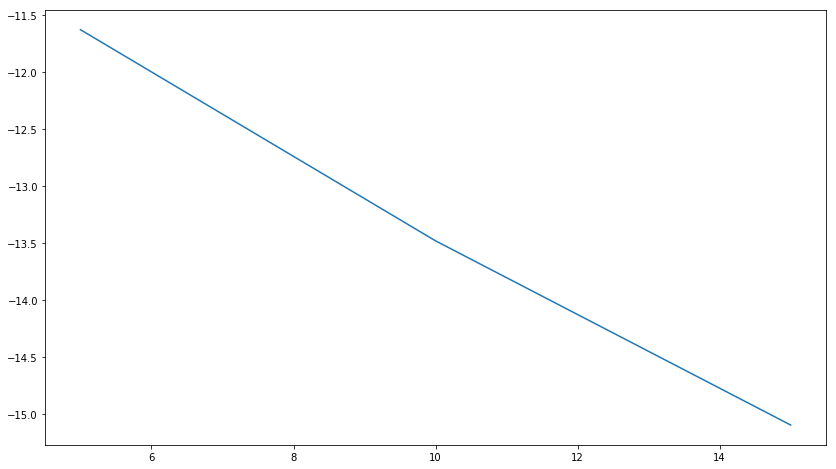

In [70]:
numpy.random.seed(1) # setting random seed to get the same results each time.
k_range = range(5,20,5)   # This process could take a very long time ...
scores = []
for k in k_range:
    print k            # to figure out where this process is ... 
    goodLdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=20)  #for better results, use a higher passes (e.g., 50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(goodcm.get_coherence())
    
plt.figure(figsize=(14, 8))
plt.plot(k_range, scores)

In [71]:
scores


[-11.627484560108872, -13.480885617923928, -15.097480025887018]

In [72]:
numpy.random.seed(1) # setting random seed to get the same results each time. For a large dataset, high passes (e.g., 50, 75) would be desirable.
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=50)

In [73]:
model.show_topics()

[(0,
  u'0.026*"place" + 0.023*"night" + 0.022*"quiet" + 0.013*"soundtrack" + 0.011*"horror" + 0.011*"family" + 0.008*"finally" + 0.008*"recommend" + 0.008*"scary" + 0.007*"sound"'),
 (1,
  u'0.017*"war" + 0.015*"also" + 0.010*"mcu" + 0.008*"sunday" + 0.008*"time" + 0.007*"came" + 0.006*"trailer" + 0.006*"american" + 0.006*"teen" + 0.006*"filmfestival"'),
 (2,
  u'0.052*"time" + 0.018*"first" + 0.013*"done" + 0.013*"kid" + 0.012*"funny" + 0.012*"feel" + 0.011*"long" + 0.010*"pretty" + 0.009*"spider" + 0.008*"collection"'),
 (3,
  u'0.014*"song" + 0.011*"star" + 0.009*"projector" + 0.009*"cry" + 0.009*"far" + 0.008*"right" + 0.008*"beautiful" + 0.008*"agree" + 0.007*"must" + 0.007*"indie"'),
 (4,
  u'0.015*"world" + 0.013*"black" + 0.011*"rampage" + 0.011*"festival" + 0.010*"award" + 0.008*"congratulation" + 0.008*"panther" + 0.008*"bean" + 0.007*"reference" + 0.007*"win"'),
 (5,
  u'0.039*"life" + 0.022*"action" + 0.016*"love" + 0.016*"scene" + 0.013*"story" + 0.012*"people" + 0.009*"r

In [74]:
# print words without probability
for i in range(0,10):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])

place, night, quiet, soundtrack, horror, family, finally, recommend, scary, sound
war, also, mcu, sunday, time, came, trailer, american, teen, filmfestival
time, first, done, kid, funny, feel, long, pretty, spider, collection
song, star, projector, cry, far, right, beautiful, agree, must, indie
world, black, rampage, festival, award, congratulation, panther, bean, reference, win
life, action, love, scene, story, people, real, fun, star, game
greatest, upcoming, teen, end, hour, eye, waiting, home, series, clip
loved, time, actually, love, book, first, super, ready, premier, scene
friend, look, bad, short, joke, love, work, thor, job, moment
original, tweet, tell, fight, dog, luck, night, star, anyone, superb


In [75]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    #print i
    results.append(i)

results

[[(0, 0.02),
  (1, 0.02),
  (2, 0.020000046),
  (3, 0.02000064),
  (4, 0.020000469),
  (5, 0.819993),
  (6, 0.020000981),
  (7, 0.020000814),
  (8, 0.020000223),
  (9, 0.020003844)],
 [(0, 0.15714271),
  (1, 0.014285714),
  (2, 0.01428807),
  (3, 0.014285714),
  (4, 0.014285714),
  (5, 0.15714028),
  (6, 0.5857104),
  (7, 0.014290004),
  (8, 0.014285714),
  (9, 0.014285714)],
 [(0, 0.7),
  (1, 0.033333335),
  (2, 0.033333335),
  (3, 0.033333335),
  (4, 0.033333335),
  (5, 0.033333335),
  (6, 0.033333335),
  (7, 0.033333335),
  (8, 0.033333335),
  (9, 0.033333335)],
 [(0, 0.033333335),
  (1, 0.033336096),
  (2, 0.033333335),
  (3, 0.033333335),
  (4, 0.69999003),
  (5, 0.033339024),
  (6, 0.03333481),
  (7, 0.033333335),
  (8, 0.033333335),
  (9, 0.033333335)],
 [(0, 0.020000001),
  (1, 0.21992223),
  (2, 0.22001877),
  (3, 0.020005051),
  (4, 0.020000001),
  (5, 0.020000001),
  (6, 0.020003103),
  (7, 0.020000001),
  (8, 0.020001855),
  (9, 0.420049)],
 [(0, 0.033333335),
  (1, 0.69997

In [76]:
documents = []

for i in english_originaltweets_clean:
    documents.append(str(i).replace(",", "").replace("u'","").replace("'", ""))

documents[:5]

['[line scene funniest improvised]',
 '[bos gash jedi parody porno imo]',
 '[cloud atlas]',
 '[site streaming]',
 '[vernetroyer known drevil little]']

In [77]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]

toptopic = pd.DataFrame(toptopic)
documents = pd.DataFrame(documents)
documents = documents.rename(columns = {0: 'documents'})
summary = documents.join(toptopic)
summary.head()

documents  0
0   [line scene funniest improvised]  5
1   [bos gash jedi parody porno imo]  6
2                      [cloud atlas]  0
3                   [site streaming]  4
4  [vernetroyer known drevil little]  9

In [78]:
summary.groupby(0).count()

documents
0           
0       1347
1       1145
2       1500
3       1273
4       1101
5       1519
6       1195
7       1307
8       1444
9       1225

In [79]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary)

C:\Users\Rida\Anaconda2\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
8      11.170226        1       1 -0.163822  0.025785
2      11.082250        1       2 -0.030531  0.273063
5      10.696086        1       3  0.096960 -0.041739
0      10.306534        1       4 -0.208817 -0.026929
7      10.212171        1       5  0.099552  0.091105
3       9.857409        1       6 -0.001243 -0.065197
1       9.723160        1       7  0.122597  0.041887
4       9.258387        1       8  0.063582 -0.082731
6       9.132937        1       9  0.113662 -0.086723
9       8.560838        1      10 -0.091940 -0.128522, topic_info=      Category        Freq           Term       Total  loglift  logprob
term                                                                   
1024   Default  563.000000           time  563.000000  30.0000  30.0000
682    Default  306.000000           life  306.000000  29.0000  29.0000
13627  Default  196.000000          place  196.000000  28.0000  28.0000
2124   Default  177.000000         action  177.000000  27.0000  27.0000
13891  Default  165.000000          quiet  165.000000  26.0000  26.0000
4894   Default  262.000000          night  262.000000  25.0000  25.0000
11650  Default  166.000000          loved  166.000000  24.0000  24.0000
9530   Default  240.000000          first  240.000000  23.0000  23.0000
4992   Default  164.000000            war  164.000000  22.0000  22.0000
2481   Default  192.000000           also  192.000000  21.0000  21.0000
1789   Default  104.000000          world  104.000000  20.0000  20.0000
10559  Default  105.000000           done  105.000000  19.0000  19.0000
14350  Default  155.000000           song  155.000000  18.0000  18.0000
2244   Default   96.000000     soundtrack   96.000000  17.0000  17.0000
8868   Default  126.000000            kid  126.000000  16.0000  16.0000
2741   Default  127.000000          funny  127.000000  15.0000  15.0000
6767   Default  199.000000           look  199.000000  14.0000  14.0000
9698   Default  121.000000          black  121.000000  13.0000  13.0000
845    Default  190.000000         people  190.000000  12.0000  12.0000
4207   Default  121.000000          award  121.000000  11.0000  11.0000
4346   Default  293.000000          scene  293.000000  10.0000  10.0000
12634  Default  103.000000        rampage  103.000000   9.0000   9.0000
8067   Default  202.000000           star  202.000000   8.0000   8.0000
5505   Default  158.000000         friend  158.000000   7.0000   7.0000
14688  Default  147.000000           feel  147.000000   6.0000   6.0000
3444   Default  129.000000       festival  129.000000   5.0000   5.0000
6202   Default   81.000000         family   81.000000   4.0000   4.0000
8669   Default  100.000000            bad  100.000000   3.0000   3.0000
9543   Default  104.000000           long  104.000000   2.0000   2.0000
6103   Default  168.000000         horror  168.000000   1.0000   1.0000
...        ...         ...            ...         ...      ...      ...
13058  Topic10   24.052954      christmas   24.791093   2.4277  -5.5745
11305  Topic10   22.583159         giving   23.321344   2.4258  -5.6376
14661  Topic10   21.986937          guess   22.725109   2.4250  -5.6643
7257   Topic10   21.203752           ride   21.941915   2.4238  -5.7006
14248  Topic10   20.892978          taste   21.631157   2.4233  -5.7154
9504   Topic10   20.492679        monster   21.230856   2.4226  -5.7347
1791   Topic10   19.547385        traffik   20.285535   2.4209  -5.7819
12761  Topic10   19.124699         amazon   19.862859   2.4201  -5.8038
12135  Topic10   18.942785        biggest   19.681000   2.4197  -5.8134
1515   Topic10   18.191692          drive   18.929897   2.4182  -5.8538
6735   Topic10   17.421121            add   18.159323   2.4165  -5.8971
13287  Topic10   16.734280          level   17.472472   2.4148  -5.9373
7406   Topic10   16.437457  entertainment   17.175635   2.4140  -5.95

**According to the tweets collected about people's movie preferences, it can be seen that the most popular movies were the ones about:**

**1. Films that highlight love stories preferably those that are exceptionally emotional. The words 'love', 'beautiful' and 'cry' were associated with these movies.**

**2. A specific movie, Black Panther was quite popular during the time the tweets were collected. Along with this, twitter users talked about funny movies with storylines highlighting powerful characters and their love interests just as much as they did about Black Panther which means there was a tie between these 2 topics. **

**3. The third most popular topic on our customized Twitter search was Marvel and its derivations like mcu which stands for Marvel Cinematic Universe. The words 'first' and 'time' are heavily involved which suggests that movies from this production house are starting to attract a larger audience than they did in the past.**

**4. This can be seen as being an extension of the third topic. It was concerned with kids movies, movies about superheroes and movies based on comics. Some of these movies had several sequels as the storyline was too broad to depict in a single film thus explaining the mention of 'collection' in this topic. There was frequent use of the word 'award' which implies that these movies were noticeably successful. **

**5. Disney movies were deemed popular by twitter users at the time of data collection. Along with that, movies based on the lives of famous personalities, biographies and autobiographies were a hit. Moreover, movies based on books were also appreciated by the audience. **

# Crawling the Facebook fan pages of these movies to develop a network and then analyzing the statistics obtained form these networks:

In [ ]:
from IPython.display import Image
Image("sw4.png")

**According to this network analysis, Star Wars the Force Awakens was the most popular label used. It also had the greatest number of degrees: 22 implying that all the other labels in this network are connected through this one. The next labels with the largest degrees were those mentioning ‘geeks’ and ‘games’ which makes sense because Star Wars is the most appealing to these audience. It was also seen that when the movie was viewed in 3D in some theatres and this was an even more thrilling experience for most of the viewers. A few communities were discussing this movie, some of these communities included ‘Living Single’ and ‘Nerdy like me’. Moreover, an entrepreneurial company ‘Comic Crusaders’ also showed great interest in the movie, this could be because they sell Star Wars merchandise in their stores.**

**Closeness Centrality is the average distance from a given starting node to all other nodes in the network. If there is a piece of information that must be spread across the network, nodes with the highest Closeness Centrality should be first to receive this information because they can communicate with the rest of the nodes quicker. In this network,  the movie itself and two entertainment websites that posted reviews and spoilers about it scored highest on the Closeness centrality scale. This means that the websites played a big part in the promotion of the movie as any news about the movie would be spread out by these platforms.**

**Betweenness centrality measures how frequently a given node appears on shortest paths between nodes in the network. The more frequently a node occurs in the shortest paths, the higher its betweenness centrality. Again, two entertainment websites had the highest scores in this category meaning that these were mentioned a lot by the users and the admins of this fan page. This suggests that any when viewers talk about this movie, they also refer to tehse websites more often than not.**

**This analysis revealed that the biggest portion of audience attracted by Star Wars was the middle-aged and young adults who are interested in video games and identify themselves as nerdy and geeky. It also showed that the movie makes a lot of business if it is promoted well on the right platforms.**

# Network Analytics:

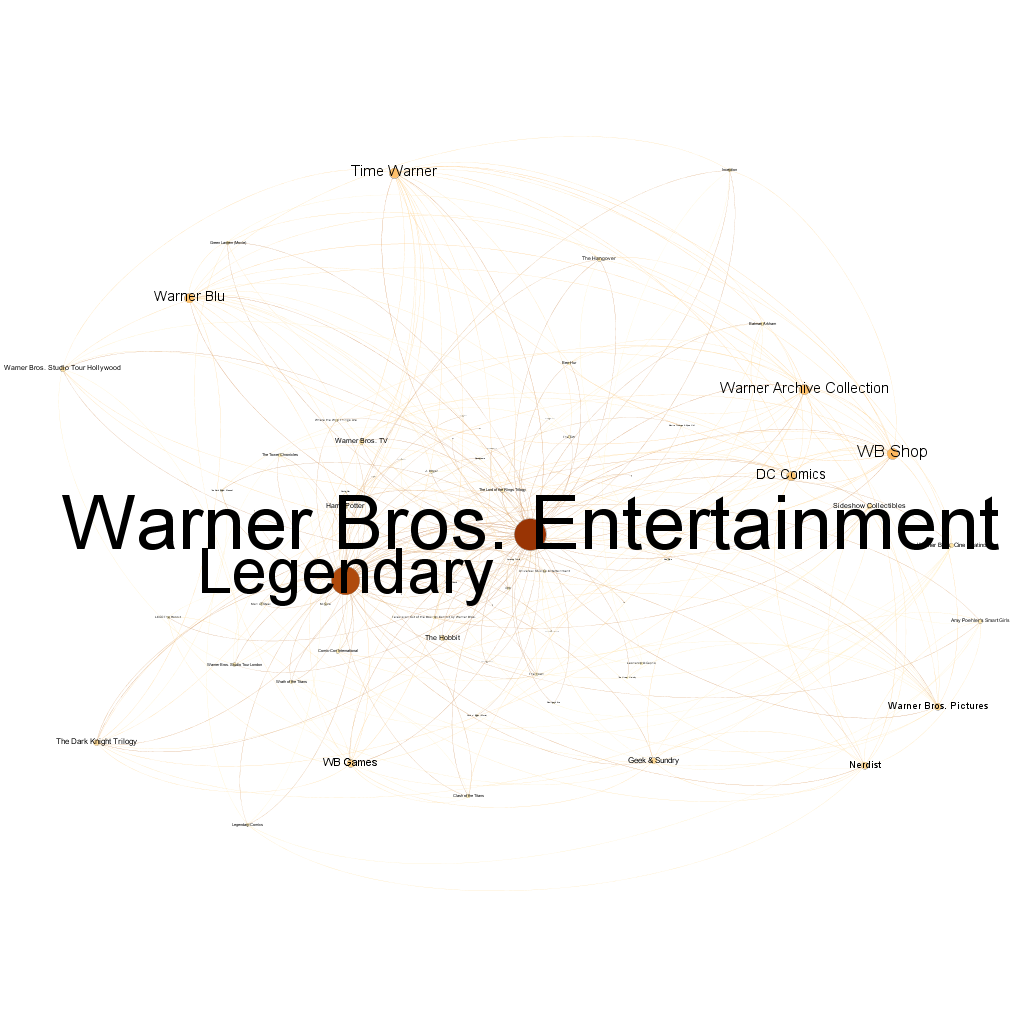

In [128]:
from IPython.display import Image
Image("incp.png")

**According to the network generated through the data collected from Facebook, Warner Brothers and DC Comics had the largest number of degrees. This suggest that the production houses were very popular among all the labels. Nerdist and Legendary Industries were also prevalent throughout the data collected scoring degrees of 14 and 56 respectively. Nerdist Industries, LLC is part of the digital division of Legendary Entertainment. Nerdist Industries was founded as a sole podcast (The Nerdist Podcast) created by Chris Hardwick but later spread to include a network of podcasts, a premium content YouTube channel, a news division (Nerdist News), and a television version of the original podcast produced by and aired on BBC America.  Moreover, one of the communities called ‘Geek & Sundry’ had a degree of 10 which implies that its members were invested in the movie and played a part in promoting it.**

**Closeness Centrality: The production house Universal Studios  again scored a 1.0 on this scale which implies that they were the most trusted source of information about the movie as seen by the users of this fan page. A few other movies including ‘Jurassic World’ , ‘Clash the Titans’, ‘The Dark Knight Trilogy’ and ‘The Wrath Of the Titans’ did well on the closeness centrality which would mean that each of these movies were somehow related to Inception.**

**Betweenness centrality: As expected, Warner Brothers Entertainment and the company Legendary are the most frequently mentioned terms on this fan page. This suggests that the making of the movie was inspiring, the actors that were casted, the specific details of the roles they were assigned surpassed the users’ expectations. **

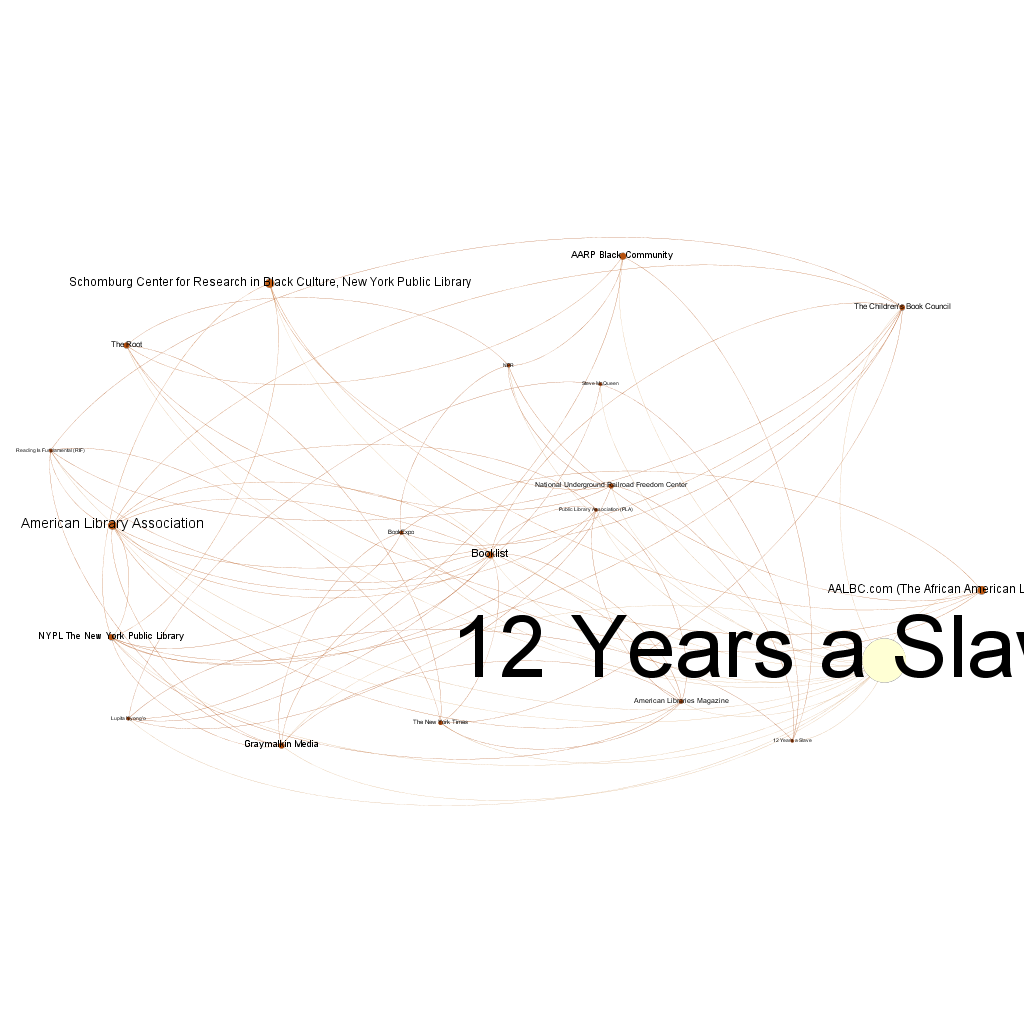

In [127]:
from IPython.display import Image
Image("12YS.png")

**According to the network analysis obtained from the data extracted from this movie’s Facebook fan page, the most important label was ’12 Years a Slave book’. It had a total degree of 20 which suggests that there were a lot of references to the original novel and discussions about how it was incorporated in the movie. This leads to the hypothesis that if a movie follows the plot of the novel accounting for all the details, it makes for a profitable screening. The New York Times was another popular label with a degree of 6 implying it received a good number of reviews in this paper. Moreover, ‘Lupita Nyong’o’ who is the lead actor in the movie was mentioned a few times attaining a degree of 6. Her performance in the movie was valued by many. Lastly, ‘Steve McQueen’, the director of the movie scored a degree of 4 giving the idea that his direction played a part in the movie’s success.**

**Closeness centrality: ’12 Years a Slave book’, ‘Lupita Nyong’o’, ‘Steve McQueen’ again were the top 3 labels which confirms that these were the most popular topics and thus the reasons behind the huge revenue the movie made.**

**Betweenness Centrality: The labels ‘BookExpo’ and ‘The Root’ were the most popular in this category. BookExpo is a book retail company while The Root is a media website. These seem to be the platforms that helped promote the movie on a larger scale which explains why they would appear several times among the rest of the labels. **

# Storytelling:

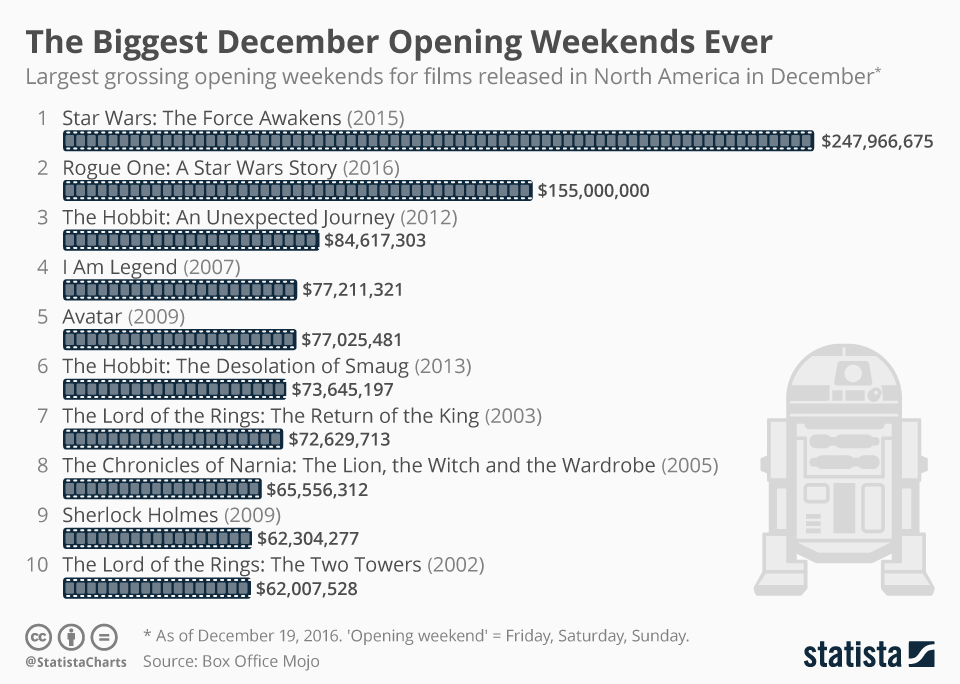

In [2]:
from IPython.display import Image
Image("starwars1.jpg")

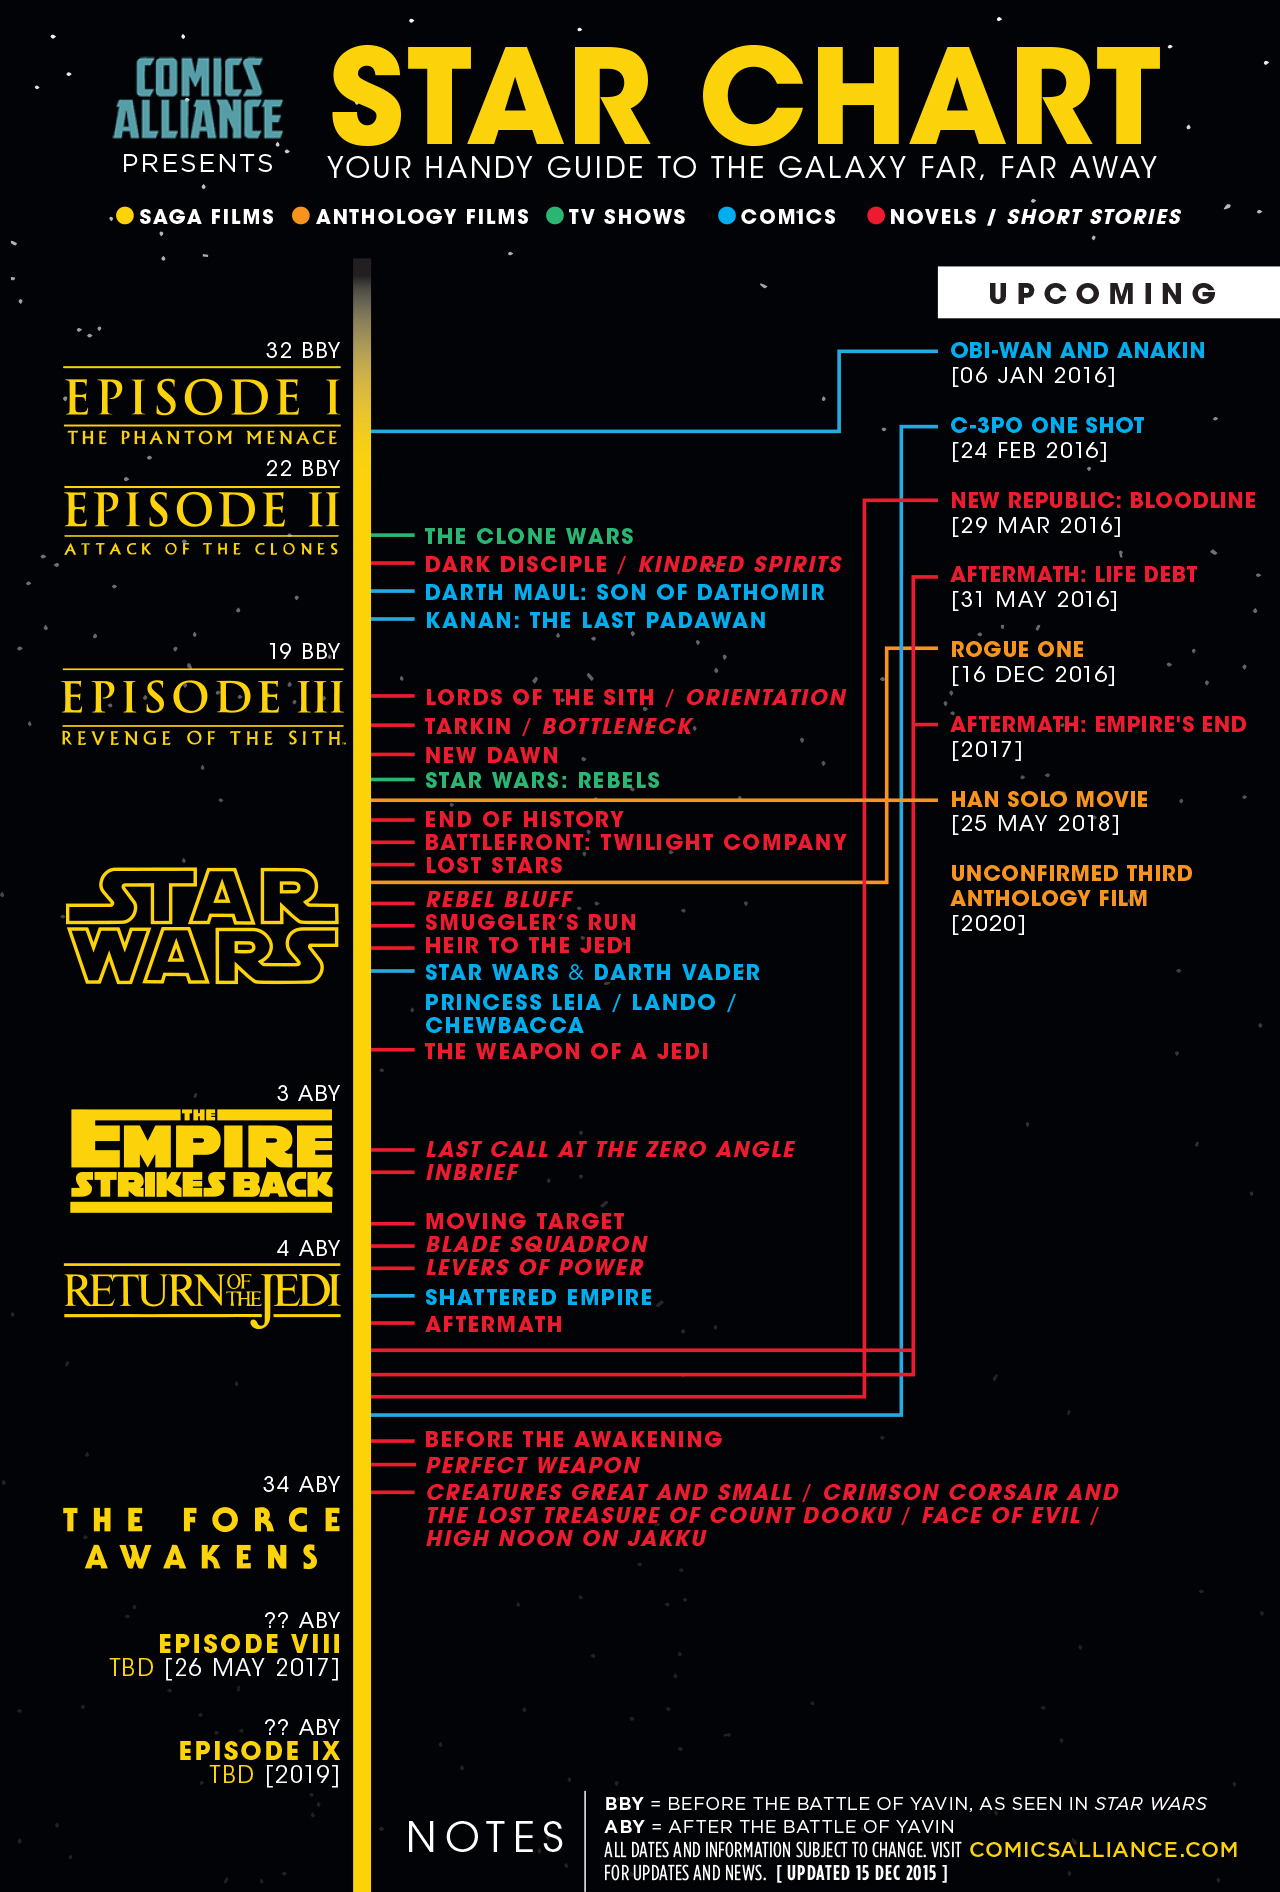

In [3]:
from IPython.display import Image
Image("starwars2.jpg")

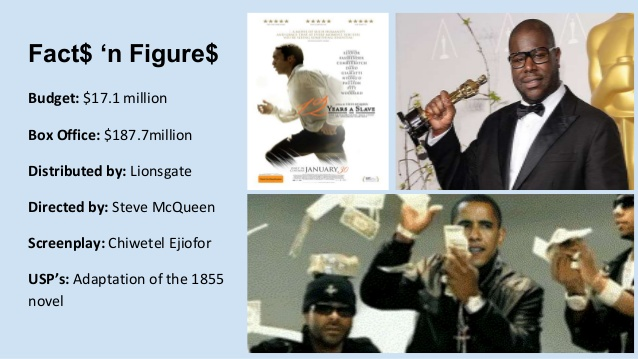

In [4]:
from IPython.display import Image
Image("12YS_1.jpg")

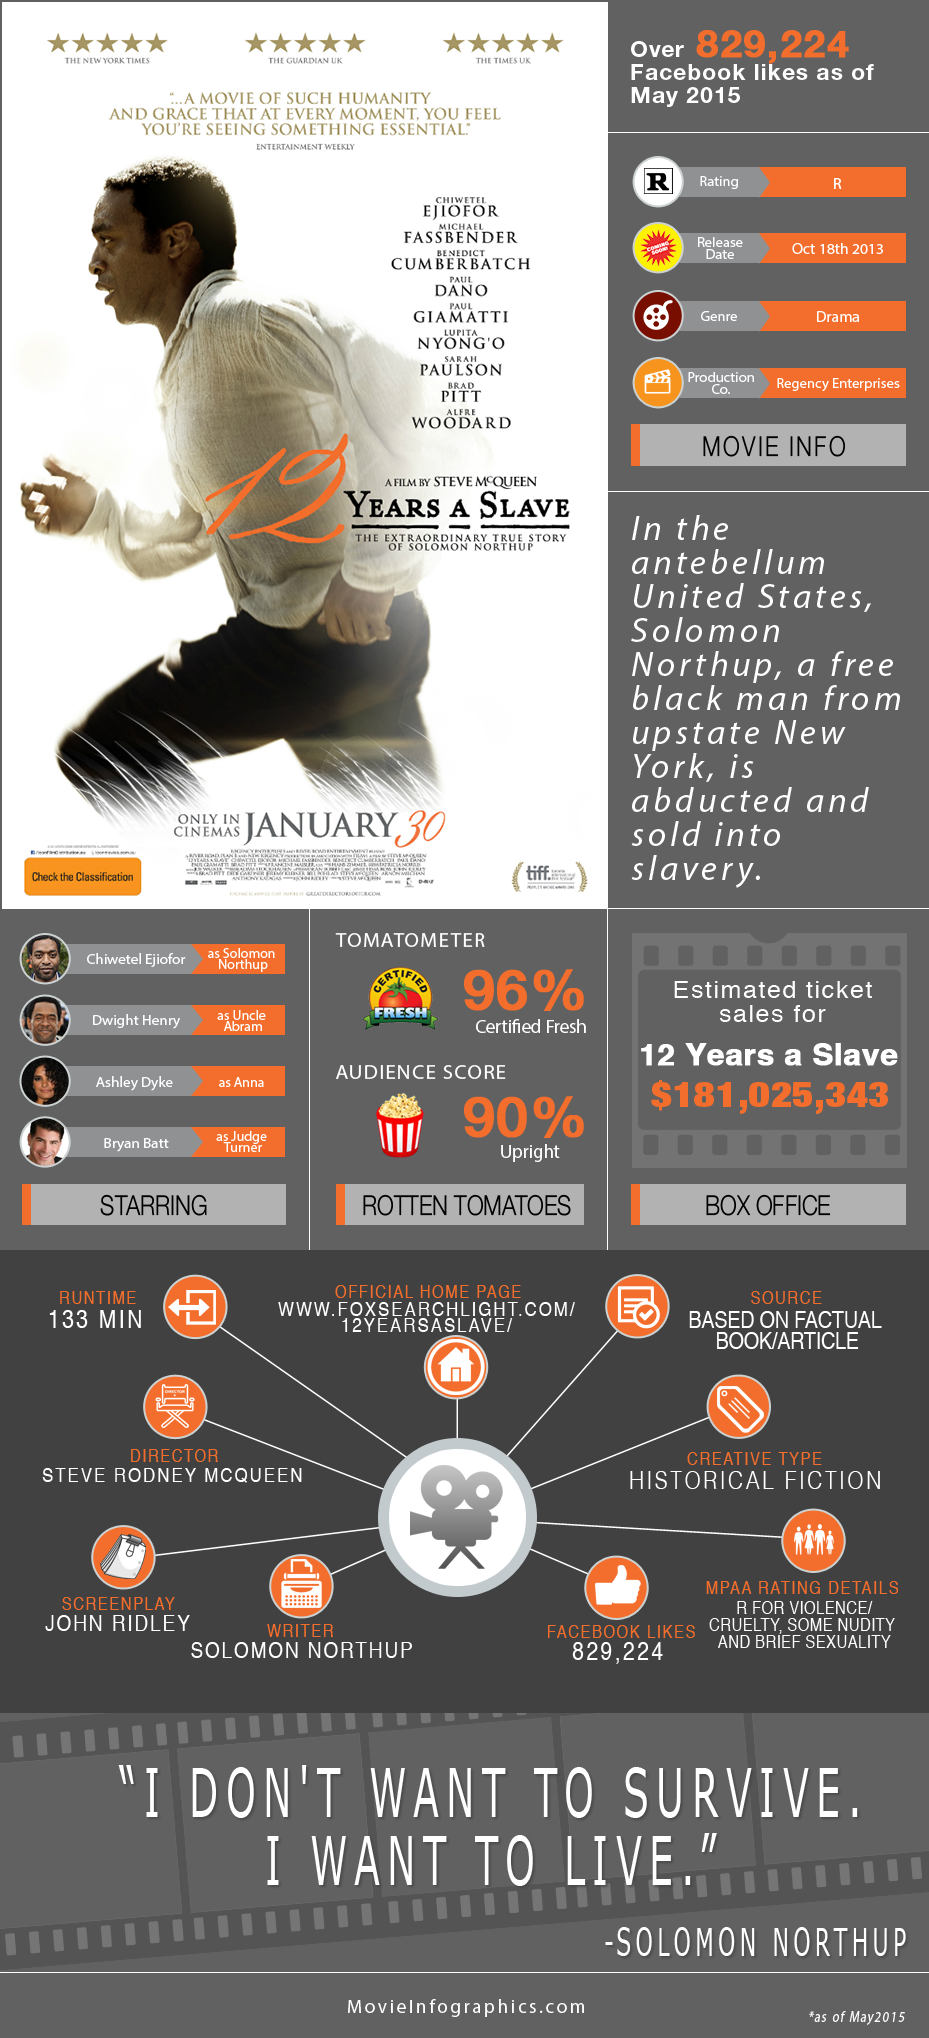

In [6]:
from IPython.display import Image
Image("12YS_2.png")

All components of the analysis above show that for a movie to make any noticeable profits and break Box Office records, it has to either appeal to the youth, i.e.: young adults by being of the sci-fi nature, or depict important parts of the history in ways they haven’t been shown before.

Start Wars was the most successful movie because it appealed to the younger generations who were deeply invested in the series as a whole. The use of CGI throughout the movie in order to bring it closer to reality was what helped its popularity. The key element in this case, however, goes back to when the first Star Wars movies were released. The young audience has been dedicated to the series ever since which means that this particular movie did not have to try as hard to generate great revenues. Consequently, we can assume that developing this sort of a relationship with the audience of a specific demographic will result in better outcomes in terms of ratings and incomes. It may take time to create such a connection while ensuring that the very first movies of the collection will have to do exceptionally well. However, once the filmmakers have won the audience over with their storyline, choice of characters and actors and screenplay, then, the movie can be split the movie into episodes each of which ends on a suspenseful note, so the audience are forced to watch the next one.

The third most popular topic on Twitter when collecting data about the best movies was the Marvel Cinematic Universe. Star Wars was originally owned by Marvel which Disney later bought. The point being that movies based on comics whether old or recent ones continue to make huge profits because they have a fixed audience who they are sure will tune in every time a new film is released. 
The network analysis conducted on the data from The Force Awaken’s fan page established the demographic of its audience. This information can be used as a premise for producing more films based on hypothetical empires where anything is possible and the desire to dethrone one another is the main thriller.

Text processing and content analysis conducted on the second movie, Inception reveals similar findings, in that, movies that revolve around sci-fi themes are intriguing to the audience. Even though it did not involve animations and is not a sequel, Inception managed to achieve high rankings in the box office. One of the factors that contributed to its success were the actors casted, namely, Leonardo DiCaprio. The audience thought that the movie presented a fresh plot and required them to concentrate in order to keep up with the story. 

According to the network analysis, the top topics focused on the makers of the movie, Warner Brothers and other entertainment companies and websites that helped promote the movie.  The findings of this analysis being that Inception was well - promoted and was directed towards the right demographic which would explain its large revenues. 
The third movie whose performance was examined, 12 Years a Slave, falls into the second category depicting important events in history. This movie was based on the lives of African-Americans while they served as slaves to their White masters, it highlighted the hardships they had to bear and, the torture they faced.  

It fits with the Twitter findings which suggested that the most frequently mentioned topic tweeted when collecting tweets using keywords like ’best movie’, ‘box office’, etc., was emotional plots, and ‘heartwarming stories’. It was seen that emotional movies are liked better than those that are strictly apathetic storylines based on materialistic needs.

The network analysis confirmed the value of the plot as it was followed from the novel. It exhibited the lead actors and director of the movie as the top factors that contribute to the movie’s triumph. This fits with the hypothesis above since it is the director’s job to adapt the story line to follow any constraints in real time, on set. 

Overall, research on movies from the past decade reveals that for movies to do well and achieve higher box office ranks, they must check at least one of the following boxes:

•	be a Sci-fi movie that uses robust special effects and animations

•	be a Marvel movie based on their comics 

•	follow a non-fictional plot, one that depicts historical events that are understudied and under-represented

•	released during the Summer, especially applies to movies that are directed towards young adults

•	include a star-studded cast which ensures that the audience will watch the movie no matter what the story is like



**Expected benefits & Potential Clients:**

**Benefits: The budget of these movies is of the order of hundreds of millions of dollars, making their box office success essential for the survival of the industry. Knowing which movies are likely to succeed and which are likely to fail before the release could benefit the production houses greatly as it will enable them to focus their advertising campaigns which itself cost millions of dollars, accordingly. And it could also help them to know when it is most appropriate to release a movie by looking at the overall market. Moreover, the above analysis identified which actors were phenomenal in their roles in the movies listed. This information can be used as a reference for future castings since they confirm who did well under what kind of circumstances. **

**Potential Clients: Movie producers would be the fundamental users of this analysis because it informs them what kind of movies are doing well currently and what storylines will yield the greatest profits. Movie directors and cinematographers could also benefit from this because it provides details about film durations and what kind of CGI effects work best in what scenarios.  Additionally, actors could look back at their performance and ensure that their next movies are just as detailed and packed with expressions.  **
